In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
from collections import Counter
from imblearn.over_sampling import SMOTE
from keras import backend as K
from sklearn.utils import shuffle

In [2]:
print("TensorFlow version is " + tf.__version__)

TensorFlow version is 2.6.0


In [3]:
feature_file_name = "DNN_features_June20.txt"
label_file_name = "DNN_Risk_Labels_June20.txt"

model_saving_path = 'MuscleNET_Models/DNN/MuscleNET_Injury_Detection'

In [4]:
features = np.loadtxt(feature_file_name)
labels = np.loadtxt(label_file_name)
labels = labels.astype(int)

features, labels = shuffle(features, labels, random_state=0)

counter = Counter(labels)
print(counter)

print("features shape ", features.shape)
print("labels shape ", labels.shape)

Counter({0: 170, 1: 43})
features shape  (213, 16)
labels shape  (213,)


In [5]:
labels_one_hot = tf.one_hot(labels, np.max(labels)+1)

print("one hot encoding labels shape ", labels_one_hot.shape)

one hot encoding labels shape  (213, 2)


In [6]:
exampleSize, featureSize = features.shape

In [7]:
numTrain = int(features.shape[0] * 0.8)
x_train = features[:numTrain,:]
y_train = labels_one_hot[:numTrain]
x_test = features[numTrain:,:]
y_test = labels_one_hot[numTrain:]

print("training set feature shape ", x_train.shape)
print("training set label shape ", y_train.shape)
print("test set feature shape ", x_test.shape)
print("test set label shape ", y_test.shape)

training set feature shape  (170, 16)
training set label shape  (170, 2)
test set feature shape  (43, 16)
test set label shape  (43, 2)


In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(featureSize,)),
    tf.keras.layers.Dense(48, activation="relu"),
    tf.keras.layers.Dense(48, activation="relu"),
    tf.keras.layers.Dense(48, activation="relu"),
    tf.keras.layers.Dense(12, activation="relu"),
    tf.keras.layers.Dense(2, activation="softmax")
])

In [9]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [10]:
model.compile(optimizer = optimizer,
             loss = "categorical_crossentropy",
             metrics=["acc",
                     tf.keras.metrics.FalseNegatives(),
                     tf.keras.metrics.FalsePositives(),
                     tf.keras.metrics.TrueNegatives(),
                     tf.keras.metrics.TruePositives()])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                816       
_________________________________________________________________
dense_1 (Dense)              (None, 48)                2352      
_________________________________________________________________
dense_2 (Dense)              (None, 48)                2352      
_________________________________________________________________
dense_3 (Dense)              (None, 12)                588       
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 26        
Total params: 6,134
Trainable params: 6,134
Non-trainable params: 0
_________________________________________________________________


In [11]:
starting = time.time()
history = model.fit(x_train, y_train,validation_data=(x_test,y_test),epochs=1000)
timePassed = time.time() - starting
print("Time passed for training: ", timePassed)

Epoch 1/1000
6/6 [==============================] - 1s 114ms/step - loss: 83.0661 - acc: 0.1824 - false_negatives: 139.0000 - false_positives: 139.0000 - true_negatives: 31.0000 - true_positives: 31.0000 - val_loss: 68.5090 - val_acc: 0.2791 - val_false_negatives: 31.0000 - val_false_positives: 31.0000 - val_true_negatives: 12.0000 - val_true_positives: 12.0000
Epoch 2/1000
6/6 [==============================] - 0s 6ms/step - loss: 67.0816 - acc: 0.1824 - false_negatives: 139.0000 - false_positives: 139.0000 - true_negatives: 31.0000 - true_positives: 31.0000 - val_loss: 52.1987 - val_acc: 0.2791 - val_false_negatives: 31.0000 - val_false_positives: 31.0000 - val_true_negatives: 12.0000 - val_true_positives: 12.0000
Epoch 3/1000
6/6 [==============================] - 0s 6ms/step - loss: 50.1197 - acc: 0.1824 - false_negatives: 139.0000 - false_positives: 139.0000 - true_negatives: 31.0000 - true_positives: 31.0000 - val_loss: 35.9201 - val_acc: 0.2791 - val_false_negatives: 31.0000 - v

Epoch 24/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.7015 - acc: 0.7118 - false_negatives: 49.0000 - false_positives: 49.0000 - true_negatives: 121.0000 - true_positives: 121.0000 - val_loss: 1.4025 - val_acc: 0.5349 - val_false_negatives: 20.0000 - val_false_positives: 20.0000 - val_true_negatives: 23.0000 - val_true_positives: 23.0000
Epoch 25/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.7227 - acc: 0.7118 - false_negatives: 49.0000 - false_positives: 49.0000 - true_negatives: 121.0000 - true_positives: 121.0000 - val_loss: 1.4950 - val_acc: 0.6279 - val_false_negatives: 16.0000 - val_false_positives: 16.0000 - val_true_negatives: 27.0000 - val_true_positives: 27.0000
Epoch 26/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.6851 - acc: 0.7765 - false_negatives: 38.0000 - false_positives: 38.0000 - true_negatives: 132.0000 - true_positives: 132.0000 - val_loss: 1.4838 - val_acc: 0.6279 - val_false_negatives: 16.0000 - val_fa

6/6 [==============================] - 0s 7ms/step - loss: 0.4554 - acc: 0.8000 - false_negatives: 34.0000 - false_positives: 34.0000 - true_negatives: 136.0000 - true_positives: 136.0000 - val_loss: 1.0549 - val_acc: 0.6279 - val_false_negatives: 16.0000 - val_false_positives: 16.0000 - val_true_negatives: 27.0000 - val_true_positives: 27.0000
Epoch 47/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.4490 - acc: 0.8118 - false_negatives: 32.0000 - false_positives: 32.0000 - true_negatives: 138.0000 - true_positives: 138.0000 - val_loss: 1.1808 - val_acc: 0.6977 - val_false_negatives: 13.0000 - val_false_positives: 13.0000 - val_true_negatives: 30.0000 - val_true_positives: 30.0000
Epoch 48/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.4500 - acc: 0.8059 - false_negatives: 33.0000 - false_positives: 33.0000 - true_negatives: 137.0000 - true_positives: 137.0000 - val_loss: 1.1185 - val_acc: 0.6744 - val_false_negatives: 14.0000 - val_false_positives:

Epoch 69/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.4323 - acc: 0.8059 - false_negatives: 33.0000 - false_positives: 33.0000 - true_negatives: 137.0000 - true_positives: 137.0000 - val_loss: 0.9210 - val_acc: 0.6512 - val_false_negatives: 15.0000 - val_false_positives: 15.0000 - val_true_negatives: 28.0000 - val_true_positives: 28.0000
Epoch 70/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.4082 - acc: 0.8294 - false_negatives: 29.0000 - false_positives: 29.0000 - true_negatives: 141.0000 - true_positives: 141.0000 - val_loss: 1.0253 - val_acc: 0.6512 - val_false_negatives: 15.0000 - val_false_positives: 15.0000 - val_true_negatives: 28.0000 - val_true_positives: 28.0000
Epoch 71/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3904 - acc: 0.8353 - false_negatives: 28.0000 - false_positives: 28.0000 - true_negatives: 142.0000 - true_positives: 142.0000 - val_loss: 1.1142 - val_acc: 0.6744 - val_false_negatives: 14.0000 - val_fa

Epoch 92/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3840 - acc: 0.8529 - false_negatives: 25.0000 - false_positives: 25.0000 - true_negatives: 145.0000 - true_positives: 145.0000 - val_loss: 0.8284 - val_acc: 0.6744 - val_false_negatives: 14.0000 - val_false_positives: 14.0000 - val_true_negatives: 29.0000 - val_true_positives: 29.0000
Epoch 93/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3908 - acc: 0.8294 - false_negatives: 29.0000 - false_positives: 29.0000 - true_negatives: 141.0000 - true_positives: 141.0000 - val_loss: 0.9117 - val_acc: 0.6977 - val_false_negatives: 13.0000 - val_false_positives: 13.0000 - val_true_negatives: 30.0000 - val_true_positives: 30.0000
Epoch 94/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3694 - acc: 0.8529 - false_negatives: 25.0000 - false_positives: 25.0000 - true_negatives: 145.0000 - true_positives: 145.0000 - val_loss: 0.8266 - val_acc: 0.6512 - val_false_negatives: 15.0000 - val_fa

Epoch 115/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3347 - acc: 0.8706 - false_negatives: 22.0000 - false_positives: 22.0000 - true_negatives: 148.0000 - true_positives: 148.0000 - val_loss: 0.7601 - val_acc: 0.6512 - val_false_negatives: 15.0000 - val_false_positives: 15.0000 - val_true_negatives: 28.0000 - val_true_positives: 28.0000
Epoch 116/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3546 - acc: 0.8647 - false_negatives: 23.0000 - false_positives: 23.0000 - true_negatives: 147.0000 - true_positives: 147.0000 - val_loss: 0.9548 - val_acc: 0.6977 - val_false_negatives: 13.0000 - val_false_positives: 13.0000 - val_true_negatives: 30.0000 - val_true_positives: 30.0000
Epoch 117/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.3639 - acc: 0.8706 - false_negatives: 22.0000 - false_positives: 22.0000 - true_negatives: 148.0000 - true_positives: 148.0000 - val_loss: 0.7273 - val_acc: 0.6744 - val_false_negatives: 14.0000 - val

Epoch 138/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3291 - acc: 0.8706 - false_negatives: 22.0000 - false_positives: 22.0000 - true_negatives: 148.0000 - true_positives: 148.0000 - val_loss: 0.7499 - val_acc: 0.6512 - val_false_negatives: 15.0000 - val_false_positives: 15.0000 - val_true_negatives: 28.0000 - val_true_positives: 28.0000
Epoch 139/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3614 - acc: 0.8765 - false_negatives: 21.0000 - false_positives: 21.0000 - true_negatives: 149.0000 - true_positives: 149.0000 - val_loss: 0.8310 - val_acc: 0.6744 - val_false_negatives: 14.0000 - val_false_positives: 14.0000 - val_true_negatives: 29.0000 - val_true_positives: 29.0000
Epoch 140/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3264 - acc: 0.8706 - false_negatives: 22.0000 - false_positives: 22.0000 - true_negatives: 148.0000 - true_positives: 148.0000 - val_loss: 0.7091 - val_acc: 0.6512 - val_false_negatives: 15.0000 - val

Epoch 161/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3160 - acc: 0.9000 - false_negatives: 17.0000 - false_positives: 17.0000 - true_negatives: 153.0000 - true_positives: 153.0000 - val_loss: 0.7855 - val_acc: 0.6744 - val_false_negatives: 14.0000 - val_false_positives: 14.0000 - val_true_negatives: 29.0000 - val_true_positives: 29.0000
Epoch 162/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.3323 - acc: 0.8824 - false_negatives: 20.0000 - false_positives: 20.0000 - true_negatives: 150.0000 - true_positives: 150.0000 - val_loss: 0.7694 - val_acc: 0.6744 - val_false_negatives: 14.0000 - val_false_positives: 14.0000 - val_true_negatives: 29.0000 - val_true_positives: 29.0000
Epoch 163/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3319 - acc: 0.8765 - false_negatives: 21.0000 - false_positives: 21.0000 - true_negatives: 149.0000 - true_positives: 149.0000 - val_loss: 0.7326 - val_acc: 0.6512 - val_false_negatives: 15.0000 - val

Epoch 184/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3662 - acc: 0.8706 - false_negatives: 22.0000 - false_positives: 22.0000 - true_negatives: 148.0000 - true_positives: 148.0000 - val_loss: 0.7080 - val_acc: 0.6744 - val_false_negatives: 14.0000 - val_false_positives: 14.0000 - val_true_negatives: 29.0000 - val_true_positives: 29.0000
Epoch 185/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.4546 - acc: 0.8000 - false_negatives: 34.0000 - false_positives: 34.0000 - true_negatives: 136.0000 - true_positives: 136.0000 - val_loss: 1.0343 - val_acc: 0.6977 - val_false_negatives: 13.0000 - val_false_positives: 13.0000 - val_true_negatives: 30.0000 - val_true_positives: 30.0000
Epoch 186/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.3938 - acc: 0.8353 - false_negatives: 28.0000 - false_positives: 28.0000 - true_negatives: 142.0000 - true_positives: 142.0000 - val_loss: 0.6694 - val_acc: 0.6744 - val_false_negatives: 14.0000 - val

6/6 [==============================] - 0s 6ms/step - loss: 0.3449 - acc: 0.8647 - false_negatives: 23.0000 - false_positives: 23.0000 - true_negatives: 147.0000 - true_positives: 147.0000 - val_loss: 0.7901 - val_acc: 0.6512 - val_false_negatives: 15.0000 - val_false_positives: 15.0000 - val_true_negatives: 28.0000 - val_true_positives: 28.0000
Epoch 207/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3224 - acc: 0.8824 - false_negatives: 20.0000 - false_positives: 20.0000 - true_negatives: 150.0000 - true_positives: 150.0000 - val_loss: 0.7259 - val_acc: 0.6744 - val_false_negatives: 14.0000 - val_false_positives: 14.0000 - val_true_negatives: 29.0000 - val_true_positives: 29.0000
Epoch 208/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3136 - acc: 0.8882 - false_negatives: 19.0000 - false_positives: 19.0000 - true_negatives: 151.0000 - true_positives: 151.0000 - val_loss: 0.6940 - val_acc: 0.6744 - val_false_negatives: 14.0000 - val_false_positive

Epoch 229/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.3190 - acc: 0.8588 - false_negatives: 24.0000 - false_positives: 24.0000 - true_negatives: 146.0000 - true_positives: 146.0000 - val_loss: 0.6442 - val_acc: 0.6744 - val_false_negatives: 14.0000 - val_false_positives: 14.0000 - val_true_negatives: 29.0000 - val_true_positives: 29.0000
Epoch 230/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3239 - acc: 0.8824 - false_negatives: 20.0000 - false_positives: 20.0000 - true_negatives: 150.0000 - true_positives: 150.0000 - val_loss: 0.6732 - val_acc: 0.6744 - val_false_negatives: 14.0000 - val_false_positives: 14.0000 - val_true_negatives: 29.0000 - val_true_positives: 29.0000
Epoch 231/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3847 - acc: 0.8294 - false_negatives: 29.0000 - false_positives: 29.0000 - true_negatives: 141.0000 - true_positives: 141.0000 - val_loss: 0.9536 - val_acc: 0.6977 - val_false_negatives: 13.0000 - val

6/6 [==============================] - 0s 6ms/step - loss: 0.3280 - acc: 0.8647 - false_negatives: 23.0000 - false_positives: 23.0000 - true_negatives: 147.0000 - true_positives: 147.0000 - val_loss: 0.7251 - val_acc: 0.6512 - val_false_negatives: 15.0000 - val_false_positives: 15.0000 - val_true_negatives: 28.0000 - val_true_positives: 28.0000
Epoch 252/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3110 - acc: 0.8882 - false_negatives: 19.0000 - false_positives: 19.0000 - true_negatives: 151.0000 - true_positives: 151.0000 - val_loss: 0.7072 - val_acc: 0.6744 - val_false_negatives: 14.0000 - val_false_positives: 14.0000 - val_true_negatives: 29.0000 - val_true_positives: 29.0000
Epoch 253/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3176 - acc: 0.8529 - false_negatives: 25.0000 - false_positives: 25.0000 - true_negatives: 145.0000 - true_positives: 145.0000 - val_loss: 0.6713 - val_acc: 0.6279 - val_false_negatives: 16.0000 - val_false_positive

Epoch 274/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.3060 - acc: 0.8882 - false_negatives: 19.0000 - false_positives: 19.0000 - true_negatives: 151.0000 - true_positives: 151.0000 - val_loss: 0.8975 - val_acc: 0.6977 - val_false_negatives: 13.0000 - val_false_positives: 13.0000 - val_true_negatives: 30.0000 - val_true_positives: 30.0000
Epoch 275/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.3417 - acc: 0.8529 - false_negatives: 25.0000 - false_positives: 25.0000 - true_negatives: 145.0000 - true_positives: 145.0000 - val_loss: 0.7167 - val_acc: 0.6512 - val_false_negatives: 15.0000 - val_false_positives: 15.0000 - val_true_negatives: 28.0000 - val_true_positives: 28.0000
Epoch 276/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3080 - acc: 0.8882 - false_negatives: 19.0000 - false_positives: 19.0000 - true_negatives: 151.0000 - true_positives: 151.0000 - val_loss: 0.7162 - val_acc: 0.6744 - val_false_negatives: 14.0000 - val

Epoch 297/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.4480 - acc: 0.8294 - false_negatives: 29.0000 - false_positives: 29.0000 - true_negatives: 141.0000 - true_positives: 141.0000 - val_loss: 0.7048 - val_acc: 0.6047 - val_false_negatives: 17.0000 - val_false_positives: 17.0000 - val_true_negatives: 26.0000 - val_true_positives: 26.0000
Epoch 298/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.3535 - acc: 0.8353 - false_negatives: 28.0000 - false_positives: 28.0000 - true_negatives: 142.0000 - true_positives: 142.0000 - val_loss: 0.9925 - val_acc: 0.6977 - val_false_negatives: 13.0000 - val_false_positives: 13.0000 - val_true_negatives: 30.0000 - val_true_positives: 30.0000
Epoch 299/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3504 - acc: 0.8706 - false_negatives: 22.0000 - false_positives: 22.0000 - true_negatives: 148.0000 - true_positives: 148.0000 - val_loss: 0.7481 - val_acc: 0.6512 - val_false_negatives: 15.0000 - val

Epoch 320/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3663 - acc: 0.8529 - false_negatives: 25.0000 - false_positives: 25.0000 - true_negatives: 145.0000 - true_positives: 145.0000 - val_loss: 1.0971 - val_acc: 0.7209 - val_false_negatives: 12.0000 - val_false_positives: 12.0000 - val_true_negatives: 31.0000 - val_true_positives: 31.0000
Epoch 321/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3648 - acc: 0.8294 - false_negatives: 29.0000 - false_positives: 29.0000 - true_negatives: 141.0000 - true_positives: 141.0000 - val_loss: 0.8029 - val_acc: 0.6512 - val_false_negatives: 15.0000 - val_false_positives: 15.0000 - val_true_negatives: 28.0000 - val_true_positives: 28.0000
Epoch 322/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3489 - acc: 0.8588 - false_negatives: 24.0000 - false_positives: 24.0000 - true_negatives: 146.0000 - true_positives: 146.0000 - val_loss: 0.7353 - val_acc: 0.6512 - val_false_negatives: 15.0000 - val

Epoch 343/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2990 - acc: 0.8941 - false_negatives: 18.0000 - false_positives: 18.0000 - true_negatives: 152.0000 - true_positives: 152.0000 - val_loss: 0.6219 - val_acc: 0.6744 - val_false_negatives: 14.0000 - val_false_positives: 14.0000 - val_true_negatives: 29.0000 - val_true_positives: 29.0000
Epoch 344/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3313 - acc: 0.8588 - false_negatives: 24.0000 - false_positives: 24.0000 - true_negatives: 146.0000 - true_positives: 146.0000 - val_loss: 0.9579 - val_acc: 0.6977 - val_false_negatives: 13.0000 - val_false_positives: 13.0000 - val_true_negatives: 30.0000 - val_true_positives: 30.0000
Epoch 345/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3293 - acc: 0.8647 - false_negatives: 23.0000 - false_positives: 23.0000 - true_negatives: 147.0000 - true_positives: 147.0000 - val_loss: 0.6526 - val_acc: 0.6512 - val_false_negatives: 15.0000 - val

Epoch 366/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.3110 - acc: 0.8824 - false_negatives: 20.0000 - false_positives: 20.0000 - true_negatives: 150.0000 - true_positives: 150.0000 - val_loss: 0.7827 - val_acc: 0.6977 - val_false_negatives: 13.0000 - val_false_positives: 13.0000 - val_true_negatives: 30.0000 - val_true_positives: 30.0000
Epoch 367/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3165 - acc: 0.8529 - false_negatives: 25.0000 - false_positives: 25.0000 - true_negatives: 145.0000 - true_positives: 145.0000 - val_loss: 0.7014 - val_acc: 0.6744 - val_false_negatives: 14.0000 - val_false_positives: 14.0000 - val_true_negatives: 29.0000 - val_true_positives: 29.0000
Epoch 368/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.3234 - acc: 0.8529 - false_negatives: 25.0000 - false_positives: 25.0000 - true_negatives: 145.0000 - true_positives: 145.0000 - val_loss: 0.7436 - val_acc: 0.6744 - val_false_negatives: 14.0000 - val

Epoch 389/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3070 - acc: 0.8882 - false_negatives: 19.0000 - false_positives: 19.0000 - true_negatives: 151.0000 - true_positives: 151.0000 - val_loss: 0.6797 - val_acc: 0.6512 - val_false_negatives: 15.0000 - val_false_positives: 15.0000 - val_true_negatives: 28.0000 - val_true_positives: 28.0000
Epoch 390/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3119 - acc: 0.8588 - false_negatives: 24.0000 - false_positives: 24.0000 - true_negatives: 146.0000 - true_positives: 146.0000 - val_loss: 0.7363 - val_acc: 0.6744 - val_false_negatives: 14.0000 - val_false_positives: 14.0000 - val_true_negatives: 29.0000 - val_true_positives: 29.0000
Epoch 391/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2933 - acc: 0.8941 - false_negatives: 18.0000 - false_positives: 18.0000 - true_negatives: 152.0000 - true_positives: 152.0000 - val_loss: 0.7370 - val_acc: 0.6744 - val_false_negatives: 14.0000 - val

6/6 [==============================] - 0s 6ms/step - loss: 0.3046 - acc: 0.8647 - false_negatives: 23.0000 - false_positives: 23.0000 - true_negatives: 147.0000 - true_positives: 147.0000 - val_loss: 0.6229 - val_acc: 0.6744 - val_false_negatives: 14.0000 - val_false_positives: 14.0000 - val_true_negatives: 29.0000 - val_true_positives: 29.0000
Epoch 412/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.3001 - acc: 0.9059 - false_negatives: 16.0000 - false_positives: 16.0000 - true_negatives: 154.0000 - true_positives: 154.0000 - val_loss: 0.7017 - val_acc: 0.6744 - val_false_negatives: 14.0000 - val_false_positives: 14.0000 - val_true_negatives: 29.0000 - val_true_positives: 29.0000
Epoch 413/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2910 - acc: 0.8882 - false_negatives: 19.0000 - false_positives: 19.0000 - true_negatives: 151.0000 - true_positives: 151.0000 - val_loss: 0.7939 - val_acc: 0.6744 - val_false_negatives: 14.0000 - val_false_positive

Epoch 434/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3193 - acc: 0.8647 - false_negatives: 23.0000 - false_positives: 23.0000 - true_negatives: 147.0000 - true_positives: 147.0000 - val_loss: 0.6962 - val_acc: 0.6744 - val_false_negatives: 14.0000 - val_false_positives: 14.0000 - val_true_negatives: 29.0000 - val_true_positives: 29.0000
Epoch 435/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.2801 - acc: 0.8824 - false_negatives: 20.0000 - false_positives: 20.0000 - true_negatives: 150.0000 - true_positives: 150.0000 - val_loss: 0.7946 - val_acc: 0.6977 - val_false_negatives: 13.0000 - val_false_positives: 13.0000 - val_true_negatives: 30.0000 - val_true_positives: 30.0000
Epoch 436/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.2924 - acc: 0.9000 - false_negatives: 17.0000 - false_positives: 17.0000 - true_negatives: 153.0000 - true_positives: 153.0000 - val_loss: 0.6433 - val_acc: 0.6744 - val_false_negatives: 14.0000 - val

Epoch 457/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3455 - acc: 0.8588 - false_negatives: 24.0000 - false_positives: 24.0000 - true_negatives: 146.0000 - true_positives: 146.0000 - val_loss: 0.5844 - val_acc: 0.6744 - val_false_negatives: 14.0000 - val_false_positives: 14.0000 - val_true_negatives: 29.0000 - val_true_positives: 29.0000
Epoch 458/1000
6/6 [==============================] - ETA: 0s - loss: 0.2462 - acc: 0.9062 - false_negatives: 3.0000 - false_positives: 3.0000 - true_negatives: 29.0000 - true_positives: 29.000 - 0s 6ms/step - loss: 0.2950 - acc: 0.8824 - false_negatives: 20.0000 - false_positives: 20.0000 - true_negatives: 150.0000 - true_positives: 150.0000 - val_loss: 0.6683 - val_acc: 0.6744 - val_false_negatives: 14.0000 - val_false_positives: 14.0000 - val_true_negatives: 29.0000 - val_true_positives: 29.0000
Epoch 459/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3091 - acc: 0.8412 - false_negatives: 27.0000 - false_posi

6/6 [==============================] - 0s 6ms/step - loss: 0.3205 - acc: 0.8588 - false_negatives: 24.0000 - false_positives: 24.0000 - true_negatives: 146.0000 - true_positives: 146.0000 - val_loss: 0.5726 - val_acc: 0.6512 - val_false_negatives: 15.0000 - val_false_positives: 15.0000 - val_true_negatives: 28.0000 - val_true_positives: 28.0000
Epoch 480/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3171 - acc: 0.8706 - false_negatives: 22.0000 - false_positives: 22.0000 - true_negatives: 148.0000 - true_positives: 148.0000 - val_loss: 0.6160 - val_acc: 0.6512 - val_false_negatives: 15.0000 - val_false_positives: 15.0000 - val_true_negatives: 28.0000 - val_true_positives: 28.0000
Epoch 481/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.3186 - acc: 0.8412 - false_negatives: 27.0000 - false_positives: 27.0000 - true_negatives: 143.0000 - true_positives: 143.0000 - val_loss: 0.8311 - val_acc: 0.6744 - val_false_negatives: 14.0000 - val_false_positive

Epoch 502/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2755 - acc: 0.8941 - false_negatives: 18.0000 - false_positives: 18.0000 - true_negatives: 152.0000 - true_positives: 152.0000 - val_loss: 0.6135 - val_acc: 0.6744 - val_false_negatives: 14.0000 - val_false_positives: 14.0000 - val_true_negatives: 29.0000 - val_true_positives: 29.0000
Epoch 503/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.2882 - acc: 0.8824 - false_negatives: 20.0000 - false_positives: 20.0000 - true_negatives: 150.0000 - true_positives: 150.0000 - val_loss: 0.6044 - val_acc: 0.6744 - val_false_negatives: 14.0000 - val_false_positives: 14.0000 - val_true_negatives: 29.0000 - val_true_positives: 29.0000
Epoch 504/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.2860 - acc: 0.8941 - false_negatives: 18.0000 - false_positives: 18.0000 - true_negatives: 152.0000 - true_positives: 152.0000 - val_loss: 0.7705 - val_acc: 0.7209 - val_false_negatives: 12.0000 - val

Epoch 525/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3311 - acc: 0.8706 - false_negatives: 22.0000 - false_positives: 22.0000 - true_negatives: 148.0000 - true_positives: 148.0000 - val_loss: 0.7905 - val_acc: 0.6744 - val_false_negatives: 14.0000 - val_false_positives: 14.0000 - val_true_negatives: 29.0000 - val_true_positives: 29.0000
Epoch 526/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3036 - acc: 0.8647 - false_negatives: 23.0000 - false_positives: 23.0000 - true_negatives: 147.0000 - true_positives: 147.0000 - val_loss: 0.6667 - val_acc: 0.6744 - val_false_negatives: 14.0000 - val_false_positives: 14.0000 - val_true_negatives: 29.0000 - val_true_positives: 29.0000
Epoch 527/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2810 - acc: 0.8941 - false_negatives: 18.0000 - false_positives: 18.0000 - true_negatives: 152.0000 - true_positives: 152.0000 - val_loss: 0.7421 - val_acc: 0.7209 - val_false_negatives: 12.0000 - val

Epoch 548/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2819 - acc: 0.9000 - false_negatives: 17.0000 - false_positives: 17.0000 - true_negatives: 153.0000 - true_positives: 153.0000 - val_loss: 0.6349 - val_acc: 0.6512 - val_false_negatives: 15.0000 - val_false_positives: 15.0000 - val_true_negatives: 28.0000 - val_true_positives: 28.0000
Epoch 549/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3248 - acc: 0.8529 - false_negatives: 25.0000 - false_positives: 25.0000 - true_negatives: 145.0000 - true_positives: 145.0000 - val_loss: 0.9174 - val_acc: 0.7209 - val_false_negatives: 12.0000 - val_false_positives: 12.0000 - val_true_negatives: 31.0000 - val_true_positives: 31.0000
Epoch 550/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3590 - acc: 0.8588 - false_negatives: 24.0000 - false_positives: 24.0000 - true_negatives: 146.0000 - true_positives: 146.0000 - val_loss: 0.6047 - val_acc: 0.7209 - val_false_negatives: 12.0000 - val

6/6 [==============================] - 0s 6ms/step - loss: 0.3303 - acc: 0.8529 - false_negatives: 25.0000 - false_positives: 25.0000 - true_negatives: 145.0000 - true_positives: 145.0000 - val_loss: 0.6282 - val_acc: 0.6977 - val_false_negatives: 13.0000 - val_false_positives: 13.0000 - val_true_negatives: 30.0000 - val_true_positives: 30.0000
Epoch 571/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3341 - acc: 0.8529 - false_negatives: 25.0000 - false_positives: 25.0000 - true_negatives: 145.0000 - true_positives: 145.0000 - val_loss: 0.8512 - val_acc: 0.7209 - val_false_negatives: 12.0000 - val_false_positives: 12.0000 - val_true_negatives: 31.0000 - val_true_positives: 31.0000
Epoch 572/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3247 - acc: 0.8529 - false_negatives: 25.0000 - false_positives: 25.0000 - true_negatives: 145.0000 - true_positives: 145.0000 - val_loss: 0.6507 - val_acc: 0.6512 - val_false_negatives: 15.0000 - val_false_positive

Epoch 593/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2762 - acc: 0.8882 - false_negatives: 19.0000 - false_positives: 19.0000 - true_negatives: 151.0000 - true_positives: 151.0000 - val_loss: 0.7288 - val_acc: 0.6744 - val_false_negatives: 14.0000 - val_false_positives: 14.0000 - val_true_negatives: 29.0000 - val_true_positives: 29.0000
Epoch 594/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2782 - acc: 0.8706 - false_negatives: 22.0000 - false_positives: 22.0000 - true_negatives: 148.0000 - true_positives: 148.0000 - val_loss: 0.6155 - val_acc: 0.6977 - val_false_negatives: 13.0000 - val_false_positives: 13.0000 - val_true_negatives: 30.0000 - val_true_positives: 30.0000
Epoch 595/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2768 - acc: 0.9000 - false_negatives: 17.0000 - false_positives: 17.0000 - true_negatives: 153.0000 - true_positives: 153.0000 - val_loss: 0.6501 - val_acc: 0.6977 - val_false_negatives: 13.0000 - val

Epoch 616/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2836 - acc: 0.8882 - false_negatives: 19.0000 - false_positives: 19.0000 - true_negatives: 151.0000 - true_positives: 151.0000 - val_loss: 0.7147 - val_acc: 0.6744 - val_false_negatives: 14.0000 - val_false_positives: 14.0000 - val_true_negatives: 29.0000 - val_true_positives: 29.0000
Epoch 617/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.3196 - acc: 0.8647 - false_negatives: 23.0000 - false_positives: 23.0000 - true_negatives: 147.0000 - true_positives: 147.0000 - val_loss: 0.5992 - val_acc: 0.6977 - val_false_negatives: 13.0000 - val_false_positives: 13.0000 - val_true_negatives: 30.0000 - val_true_positives: 30.0000
Epoch 618/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.3152 - acc: 0.8706 - false_negatives: 22.0000 - false_positives: 22.0000 - true_negatives: 148.0000 - true_positives: 148.0000 - val_loss: 0.6663 - val_acc: 0.6977 - val_false_negatives: 13.0000 - val

Epoch 639/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3516 - acc: 0.8412 - false_negatives: 27.0000 - false_positives: 27.0000 - true_negatives: 143.0000 - true_positives: 143.0000 - val_loss: 0.6606 - val_acc: 0.6977 - val_false_negatives: 13.0000 - val_false_positives: 13.0000 - val_true_negatives: 30.0000 - val_true_positives: 30.0000
Epoch 640/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2642 - acc: 0.9000 - false_negatives: 17.0000 - false_positives: 17.0000 - true_negatives: 153.0000 - true_positives: 153.0000 - val_loss: 0.6996 - val_acc: 0.6744 - val_false_negatives: 14.0000 - val_false_positives: 14.0000 - val_true_negatives: 29.0000 - val_true_positives: 29.0000
Epoch 641/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2790 - acc: 0.8882 - false_negatives: 19.0000 - false_positives: 19.0000 - true_negatives: 151.0000 - true_positives: 151.0000 - val_loss: 0.6075 - val_acc: 0.6977 - val_false_negatives: 13.0000 - val

Epoch 662/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3008 - acc: 0.8647 - false_negatives: 23.0000 - false_positives: 23.0000 - true_negatives: 147.0000 - true_positives: 147.0000 - val_loss: 0.6188 - val_acc: 0.6512 - val_false_negatives: 15.0000 - val_false_positives: 15.0000 - val_true_negatives: 28.0000 - val_true_positives: 28.0000
Epoch 663/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2839 - acc: 0.8824 - false_negatives: 20.0000 - false_positives: 20.0000 - true_negatives: 150.0000 - true_positives: 150.0000 - val_loss: 0.6224 - val_acc: 0.6744 - val_false_negatives: 14.0000 - val_false_positives: 14.0000 - val_true_negatives: 29.0000 - val_true_positives: 29.0000
Epoch 664/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3011 - acc: 0.8647 - false_negatives: 23.0000 - false_positives: 23.0000 - true_negatives: 147.0000 - true_positives: 147.0000 - val_loss: 0.7764 - val_acc: 0.7209 - val_false_negatives: 12.0000 - val

Epoch 685/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3294 - acc: 0.8529 - false_negatives: 25.0000 - false_positives: 25.0000 - true_negatives: 145.0000 - true_positives: 145.0000 - val_loss: 0.5926 - val_acc: 0.6744 - val_false_negatives: 14.0000 - val_false_positives: 14.0000 - val_true_negatives: 29.0000 - val_true_positives: 29.0000
Epoch 686/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2754 - acc: 0.8706 - false_negatives: 22.0000 - false_positives: 22.0000 - true_negatives: 148.0000 - true_positives: 148.0000 - val_loss: 0.6083 - val_acc: 0.6744 - val_false_negatives: 14.0000 - val_false_positives: 14.0000 - val_true_negatives: 29.0000 - val_true_positives: 29.0000
Epoch 687/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2764 - acc: 0.8882 - false_negatives: 19.0000 - false_positives: 19.0000 - true_negatives: 151.0000 - true_positives: 151.0000 - val_loss: 0.6804 - val_acc: 0.7209 - val_false_negatives: 12.0000 - val

Epoch 708/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2831 - acc: 0.8824 - false_negatives: 20.0000 - false_positives: 20.0000 - true_negatives: 150.0000 - true_positives: 150.0000 - val_loss: 0.9104 - val_acc: 0.7209 - val_false_negatives: 12.0000 - val_false_positives: 12.0000 - val_true_negatives: 31.0000 - val_true_positives: 31.0000
Epoch 709/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3335 - acc: 0.8471 - false_negatives: 26.0000 - false_positives: 26.0000 - true_negatives: 144.0000 - true_positives: 144.0000 - val_loss: 0.6061 - val_acc: 0.7209 - val_false_negatives: 12.0000 - val_false_positives: 12.0000 - val_true_negatives: 31.0000 - val_true_positives: 31.0000
Epoch 710/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3250 - acc: 0.8706 - false_negatives: 22.0000 - false_positives: 22.0000 - true_negatives: 148.0000 - true_positives: 148.0000 - val_loss: 0.8940 - val_acc: 0.7209 - val_false_negatives: 12.0000 - val

Epoch 731/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3584 - acc: 0.8471 - false_negatives: 26.0000 - false_positives: 26.0000 - true_negatives: 144.0000 - true_positives: 144.0000 - val_loss: 0.8540 - val_acc: 0.7209 - val_false_negatives: 12.0000 - val_false_positives: 12.0000 - val_true_negatives: 31.0000 - val_true_positives: 31.0000
Epoch 732/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3043 - acc: 0.8529 - false_negatives: 25.0000 - false_positives: 25.0000 - true_negatives: 145.0000 - true_positives: 145.0000 - val_loss: 0.5888 - val_acc: 0.6977 - val_false_negatives: 13.0000 - val_false_positives: 13.0000 - val_true_negatives: 30.0000 - val_true_positives: 30.0000
Epoch 733/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3656 - acc: 0.8353 - false_negatives: 28.0000 - false_positives: 28.0000 - true_negatives: 142.0000 - true_positives: 142.0000 - val_loss: 0.5655 - val_acc: 0.6977 - val_false_negatives: 13.0000 - val

Epoch 754/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3359 - acc: 0.8412 - false_negatives: 27.0000 - false_positives: 27.0000 - true_negatives: 143.0000 - true_positives: 143.0000 - val_loss: 0.7708 - val_acc: 0.7209 - val_false_negatives: 12.0000 - val_false_positives: 12.0000 - val_true_negatives: 31.0000 - val_true_positives: 31.0000
Epoch 755/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2978 - acc: 0.8765 - false_negatives: 21.0000 - false_positives: 21.0000 - true_negatives: 149.0000 - true_positives: 149.0000 - val_loss: 0.6974 - val_acc: 0.7209 - val_false_negatives: 12.0000 - val_false_positives: 12.0000 - val_true_negatives: 31.0000 - val_true_positives: 31.0000
Epoch 756/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3237 - acc: 0.8706 - false_negatives: 22.0000 - false_positives: 22.0000 - true_negatives: 148.0000 - true_positives: 148.0000 - val_loss: 0.6517 - val_acc: 0.6279 - val_false_negatives: 16.0000 - val

Epoch 777/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2960 - acc: 0.8647 - false_negatives: 23.0000 - false_positives: 23.0000 - true_negatives: 147.0000 - true_positives: 147.0000 - val_loss: 0.5335 - val_acc: 0.6977 - val_false_negatives: 13.0000 - val_false_positives: 13.0000 - val_true_negatives: 30.0000 - val_true_positives: 30.0000
Epoch 778/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2884 - acc: 0.9000 - false_negatives: 17.0000 - false_positives: 17.0000 - true_negatives: 153.0000 - true_positives: 153.0000 - val_loss: 0.9448 - val_acc: 0.7209 - val_false_negatives: 12.0000 - val_false_positives: 12.0000 - val_true_negatives: 31.0000 - val_true_positives: 31.0000
Epoch 779/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3407 - acc: 0.8647 - false_negatives: 23.0000 - false_positives: 23.0000 - true_negatives: 147.0000 - true_positives: 147.0000 - val_loss: 0.5899 - val_acc: 0.6744 - val_false_negatives: 14.0000 - val

Epoch 800/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3638 - acc: 0.8412 - false_negatives: 27.0000 - false_positives: 27.0000 - true_negatives: 143.0000 - true_positives: 143.0000 - val_loss: 0.9344 - val_acc: 0.6744 - val_false_negatives: 14.0000 - val_false_positives: 14.0000 - val_true_negatives: 29.0000 - val_true_positives: 29.0000
Epoch 801/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3434 - acc: 0.8588 - false_negatives: 24.0000 - false_positives: 24.0000 - true_negatives: 146.0000 - true_positives: 146.0000 - val_loss: 0.6839 - val_acc: 0.6279 - val_false_negatives: 16.0000 - val_false_positives: 16.0000 - val_true_negatives: 27.0000 - val_true_positives: 27.0000
Epoch 802/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2951 - acc: 0.8824 - false_negatives: 20.0000 - false_positives: 20.0000 - true_negatives: 150.0000 - true_positives: 150.0000 - val_loss: 0.5842 - val_acc: 0.6512 - val_false_negatives: 15.0000 - val

Epoch 823/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.4064 - acc: 0.7941 - false_negatives: 35.0000 - false_positives: 35.0000 - true_negatives: 135.0000 - true_positives: 135.0000 - val_loss: 0.8918 - val_acc: 0.7209 - val_false_negatives: 12.0000 - val_false_positives: 12.0000 - val_true_negatives: 31.0000 - val_true_positives: 31.0000
Epoch 824/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2892 - acc: 0.8941 - false_negatives: 18.0000 - false_positives: 18.0000 - true_negatives: 152.0000 - true_positives: 152.0000 - val_loss: 0.6040 - val_acc: 0.6744 - val_false_negatives: 14.0000 - val_false_positives: 14.0000 - val_true_negatives: 29.0000 - val_true_positives: 29.0000
Epoch 825/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2649 - acc: 0.8765 - false_negatives: 21.0000 - false_positives: 21.0000 - true_negatives: 149.0000 - true_positives: 149.0000 - val_loss: 0.6643 - val_acc: 0.6977 - val_false_negatives: 13.0000 - val

Epoch 846/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.4938 - acc: 0.7941 - false_negatives: 35.0000 - false_positives: 35.0000 - true_negatives: 135.0000 - true_positives: 135.0000 - val_loss: 1.4766 - val_acc: 0.7209 - val_false_negatives: 12.0000 - val_false_positives: 12.0000 - val_true_negatives: 31.0000 - val_true_positives: 31.0000
Epoch 847/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.4911 - acc: 0.8412 - false_negatives: 27.0000 - false_positives: 27.0000 - true_negatives: 143.0000 - true_positives: 143.0000 - val_loss: 0.7221 - val_acc: 0.7442 - val_false_negatives: 11.0000 - val_false_positives: 11.0000 - val_true_negatives: 32.0000 - val_true_positives: 32.0000
Epoch 848/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3889 - acc: 0.8647 - false_negatives: 23.0000 - false_positives: 23.0000 - true_negatives: 147.0000 - true_positives: 147.0000 - val_loss: 1.0677 - val_acc: 0.7209 - val_false_negatives: 12.0000 - val

6/6 [==============================] - 0s 6ms/step - loss: 0.2654 - acc: 0.9059 - false_negatives: 16.0000 - false_positives: 16.0000 - true_negatives: 154.0000 - true_positives: 154.0000 - val_loss: 0.5599 - val_acc: 0.7442 - val_false_negatives: 11.0000 - val_false_positives: 11.0000 - val_true_negatives: 32.0000 - val_true_positives: 32.0000
Epoch 869/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3019 - acc: 0.8824 - false_negatives: 20.0000 - false_positives: 20.0000 - true_negatives: 150.0000 - true_positives: 150.0000 - val_loss: 0.6651 - val_acc: 0.6977 - val_false_negatives: 13.0000 - val_false_positives: 13.0000 - val_true_negatives: 30.0000 - val_true_positives: 30.0000
Epoch 870/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2603 - acc: 0.9000 - false_negatives: 17.0000 - false_positives: 17.0000 - true_negatives: 153.0000 - true_positives: 153.0000 - val_loss: 0.6612 - val_acc: 0.6279 - val_false_negatives: 16.0000 - val_false_positive

Epoch 891/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3363 - acc: 0.8471 - false_negatives: 26.0000 - false_positives: 26.0000 - true_negatives: 144.0000 - true_positives: 144.0000 - val_loss: 0.6576 - val_acc: 0.7209 - val_false_negatives: 12.0000 - val_false_positives: 12.0000 - val_true_negatives: 31.0000 - val_true_positives: 31.0000
Epoch 892/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2792 - acc: 0.8765 - false_negatives: 21.0000 - false_positives: 21.0000 - true_negatives: 149.0000 - true_positives: 149.0000 - val_loss: 0.6627 - val_acc: 0.7442 - val_false_negatives: 11.0000 - val_false_positives: 11.0000 - val_true_negatives: 32.0000 - val_true_positives: 32.0000
Epoch 893/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2755 - acc: 0.8824 - false_negatives: 20.0000 - false_positives: 20.0000 - true_negatives: 150.0000 - true_positives: 150.0000 - val_loss: 0.5954 - val_acc: 0.6744 - val_false_negatives: 14.0000 - val

Epoch 914/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2766 - acc: 0.8647 - false_negatives: 23.0000 - false_positives: 23.0000 - true_negatives: 147.0000 - true_positives: 147.0000 - val_loss: 0.5947 - val_acc: 0.6977 - val_false_negatives: 13.0000 - val_false_positives: 13.0000 - val_true_negatives: 30.0000 - val_true_positives: 30.0000
Epoch 915/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2678 - acc: 0.8941 - false_negatives: 18.0000 - false_positives: 18.0000 - true_negatives: 152.0000 - true_positives: 152.0000 - val_loss: 0.6900 - val_acc: 0.7442 - val_false_negatives: 11.0000 - val_false_positives: 11.0000 - val_true_negatives: 32.0000 - val_true_positives: 32.0000
Epoch 916/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2785 - acc: 0.8882 - false_negatives: 19.0000 - false_positives: 19.0000 - true_negatives: 151.0000 - true_positives: 151.0000 - val_loss: 0.6538 - val_acc: 0.7442 - val_false_negatives: 11.0000 - val

Epoch 937/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2738 - acc: 0.8882 - false_negatives: 19.0000 - false_positives: 19.0000 - true_negatives: 151.0000 - true_positives: 151.0000 - val_loss: 0.7289 - val_acc: 0.7209 - val_false_negatives: 12.0000 - val_false_positives: 12.0000 - val_true_negatives: 31.0000 - val_true_positives: 31.0000
Epoch 938/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2724 - acc: 0.9000 - false_negatives: 17.0000 - false_positives: 17.0000 - true_negatives: 153.0000 - true_positives: 153.0000 - val_loss: 0.5850 - val_acc: 0.6744 - val_false_negatives: 14.0000 - val_false_positives: 14.0000 - val_true_negatives: 29.0000 - val_true_positives: 29.0000
Epoch 939/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2961 - acc: 0.8882 - false_negatives: 19.0000 - false_positives: 19.0000 - true_negatives: 151.0000 - true_positives: 151.0000 - val_loss: 0.7160 - val_acc: 0.6744 - val_false_negatives: 14.0000 - val

Epoch 960/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2684 - acc: 0.8941 - false_negatives: 18.0000 - false_positives: 18.0000 - true_negatives: 152.0000 - true_positives: 152.0000 - val_loss: 0.8381 - val_acc: 0.7209 - val_false_negatives: 12.0000 - val_false_positives: 12.0000 - val_true_negatives: 31.0000 - val_true_positives: 31.0000
Epoch 961/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2903 - acc: 0.8588 - false_negatives: 24.0000 - false_positives: 24.0000 - true_negatives: 146.0000 - true_positives: 146.0000 - val_loss: 0.5941 - val_acc: 0.7209 - val_false_negatives: 12.0000 - val_false_positives: 12.0000 - val_true_negatives: 31.0000 - val_true_positives: 31.0000
Epoch 962/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.2907 - acc: 0.8412 - false_negatives: 27.0000 - false_positives: 27.0000 - true_negatives: 143.0000 - true_positives: 143.0000 - val_loss: 0.7336 - val_acc: 0.7209 - val_false_negatives: 12.0000 - val

Epoch 983/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2548 - acc: 0.9000 - false_negatives: 17.0000 - false_positives: 17.0000 - true_negatives: 153.0000 - true_positives: 153.0000 - val_loss: 0.7135 - val_acc: 0.7209 - val_false_negatives: 12.0000 - val_false_positives: 12.0000 - val_true_negatives: 31.0000 - val_true_positives: 31.0000
Epoch 984/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2641 - acc: 0.9000 - false_negatives: 17.0000 - false_positives: 17.0000 - true_negatives: 153.0000 - true_positives: 153.0000 - val_loss: 0.5716 - val_acc: 0.6512 - val_false_negatives: 15.0000 - val_false_positives: 15.0000 - val_true_negatives: 28.0000 - val_true_positives: 28.0000
Epoch 985/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2530 - acc: 0.8941 - false_negatives: 18.0000 - false_positives: 18.0000 - true_negatives: 152.0000 - true_positives: 152.0000 - val_loss: 0.6147 - val_acc: 0.6512 - val_false_negatives: 15.0000 - val

In [12]:
loss = history.history["loss"]
t_loss = history.history["val_loss"]
acc = history.history["acc"]
t_acc = history.history["val_acc"]
false_negatives = history.history["false_negatives"]
t_false_negatives = history.history["val_false_negatives"]
false_positives = history.history["false_positives"]
t_false_positives = history.history["val_false_positives"]
true_negatives = history.history["true_negatives"]
t_true_negatives = history.history["val_true_negatives"]
true_positives = history.history["true_positives"]
t_true_positives = history.history["val_true_positives"]
print("-----------------------")
print("Loss: ", loss[-1])
print("Test Loss: ", t_loss[-1])
print("-----------------------")
print("Accuracy: ", acc[-1])
print("Test Accuracy: ", t_acc[-1])
print("-----------------------")
print("False Negatives: ", false_negatives[-1])
print("Test False Negatives: ", t_false_negatives[-1])
print("-----------------------")
print("False Positives: ", false_positives[-1])
print("Test False Positives: ", t_false_positives[-1])
print("-----------------------")
print("True Negatives: ", true_negatives[-1])
print("Test True Negatives: ", t_true_negatives[-1])
print("-----------------------")
print("True Positives: ", true_positives[-1])
print("Test True Positives: ", t_true_positives[-1])
print("-----------------------")
print("Precisions:")
tp = true_positives[-1]
fp = false_positives[-1]
fn = false_negatives[-1]
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
print("For Training Set => Precision: ", precision, " , Recall: ", recall, " , and F1-Score: ", f1_score)
tp = t_true_positives[-1]
fp = t_false_positives[-1]
fn = t_false_negatives[-1]
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
print("For Test Set => Precision: ", precision, " , Recall: ", recall, " , and F1-Score: ", f1_score)

-----------------------
Loss:  0.2503521740436554
Test Loss:  0.5903347134590149
-----------------------
Accuracy:  0.9058823585510254
Test Accuracy:  0.7441860437393188
-----------------------
False Negatives:  16.0
Test False Negatives:  11.0
-----------------------
False Positives:  16.0
Test False Positives:  11.0
-----------------------
True Negatives:  154.0
Test True Negatives:  32.0
-----------------------
True Positives:  154.0
Test True Positives:  32.0
-----------------------
Precisions:
For Training Set => Precision:  0.9058823529411765  , Recall:  0.9058823529411765  , and F1-Score:  0.9058823529411765
For Test Set => Precision:  0.7441860465116279  , Recall:  0.7441860465116279  , and F1-Score:  0.7441860465116278


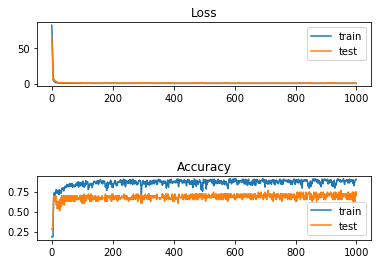

In [13]:
plt.subplot(311)
plt.title("Loss")
plt.plot(loss,label="train")
plt.plot(t_loss,label="test")
plt.legend()

plt.subplot(313)
plt.title("Accuracy")
plt.plot(acc,label="train")
plt.plot(t_acc,label="test")
plt.legend()
plt.show()

In [14]:
# saving model in SavedModel format
model.save(model_saving_path)
# converting SavedModel into tflite model
converter = tf.lite.TFLiteConverter.from_saved_model(model_saving_path)
tflite_model = converter.convert()
with open('MuscleNET_Injury_Risk_Detection.tflite', 'wb') as f:
      f.write(tflite_model)

INFO:tensorflow:Assets written to: MuscleNET_Models/DNN/MuscleNET_Injury_Detection\assets


Counter({0: 170, 1: 43})
Counter({1: 170, 0: 170})
one hot encoding labels shape  (340, 2)
training set feature shape  (237, 16)
training set label shape  (237, 2)
test set feature shape  (103, 16)
test set label shape  (103, 2)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 48)                816       
_________________________________________________________________
dense_6 (Dense)              (None, 48)                2352      
_________________________________________________________________
dense_7 (Dense)              (None, 48)                2352      
_________________________________________________________________
dense_8 (Dense)              (None, 12)                588       
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 26        
Total params: 6,134
Tra

8/8 [==============================] - 0s 5ms/step - loss: 1.1690 - acc: 0.7553 - false_negatives_1: 58.0000 - false_positives_1: 58.0000 - true_negatives_1: 179.0000 - true_positives_1: 179.0000 - val_loss: 1.4638 - val_acc: 0.7379 - val_false_negatives_1: 27.0000 - val_false_positives_1: 27.0000 - val_true_negatives_1: 76.0000 - val_true_positives_1: 76.0000
Epoch 20/4000
8/8 [==============================] - 0s 5ms/step - loss: 1.1698 - acc: 0.7215 - false_negatives_1: 66.0000 - false_positives_1: 66.0000 - true_negatives_1: 171.0000 - true_positives_1: 171.0000 - val_loss: 1.4407 - val_acc: 0.7573 - val_false_negatives_1: 25.0000 - val_false_positives_1: 25.0000 - val_true_negatives_1: 78.0000 - val_true_positives_1: 78.0000
Epoch 21/4000
8/8 [==============================] - 0s 5ms/step - loss: 1.1115 - acc: 0.7553 - false_negatives_1: 58.0000 - false_positives_1: 58.0000 - true_negatives_1: 179.0000 - true_positives_1: 179.0000 - val_loss: 1.4216 - val_acc: 0.7379 - val_false_n

Epoch 41/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.9037 - acc: 0.7426 - false_negatives_1: 61.0000 - false_positives_1: 61.0000 - true_negatives_1: 176.0000 - true_positives_1: 176.0000 - val_loss: 1.2060 - val_acc: 0.7087 - val_false_negatives_1: 30.0000 - val_false_positives_1: 30.0000 - val_true_negatives_1: 73.0000 - val_true_positives_1: 73.0000
Epoch 42/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.8698 - acc: 0.7426 - false_negatives_1: 61.0000 - false_positives_1: 61.0000 - true_negatives_1: 176.0000 - true_positives_1: 176.0000 - val_loss: 1.2228 - val_acc: 0.7184 - val_false_negatives_1: 29.0000 - val_false_positives_1: 29.0000 - val_true_negatives_1: 74.0000 - val_true_positives_1: 74.0000
Epoch 43/4000
8/8 [==============================] - 0s 6ms/step - loss: 0.9259 - acc: 0.7300 - false_negatives_1: 64.0000 - false_positives_1: 64.0000 - true_negatives_1: 173.0000 - true_positives_1: 173.0000 - val_loss: 1.2263 - val_acc: 0.7476

Epoch 63/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.7049 - acc: 0.7342 - false_negatives_1: 63.0000 - false_positives_1: 63.0000 - true_negatives_1: 174.0000 - true_positives_1: 174.0000 - val_loss: 0.9751 - val_acc: 0.7476 - val_false_negatives_1: 26.0000 - val_false_positives_1: 26.0000 - val_true_negatives_1: 77.0000 - val_true_positives_1: 77.0000
Epoch 64/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.7155 - acc: 0.7679 - false_negatives_1: 55.0000 - false_positives_1: 55.0000 - true_negatives_1: 182.0000 - true_positives_1: 182.0000 - val_loss: 0.9407 - val_acc: 0.6699 - val_false_negatives_1: 34.0000 - val_false_positives_1: 34.0000 - val_true_negatives_1: 69.0000 - val_true_positives_1: 69.0000
Epoch 65/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.7276 - acc: 0.7511 - false_negatives_1: 59.0000 - false_positives_1: 59.0000 - true_negatives_1: 178.0000 - true_positives_1: 178.0000 - val_loss: 0.9104 - val_acc: 0.6893

Epoch 85/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.5827 - acc: 0.7637 - false_negatives_1: 56.0000 - false_positives_1: 56.0000 - true_negatives_1: 181.0000 - true_positives_1: 181.0000 - val_loss: 0.7674 - val_acc: 0.6990 - val_false_negatives_1: 31.0000 - val_false_positives_1: 31.0000 - val_true_negatives_1: 72.0000 - val_true_positives_1: 72.0000
Epoch 86/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.5793 - acc: 0.7890 - false_negatives_1: 50.0000 - false_positives_1: 50.0000 - true_negatives_1: 187.0000 - true_positives_1: 187.0000 - val_loss: 0.7685 - val_acc: 0.7476 - val_false_negatives_1: 26.0000 - val_false_positives_1: 26.0000 - val_true_negatives_1: 77.0000 - val_true_positives_1: 77.0000
Epoch 87/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.5707 - acc: 0.7722 - false_negatives_1: 54.0000 - false_positives_1: 54.0000 - true_negatives_1: 183.0000 - true_positives_1: 183.0000 - val_loss: 0.7976 - val_acc: 0.7767

Epoch 107/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.5598 - acc: 0.7890 - false_negatives_1: 50.0000 - false_positives_1: 50.0000 - true_negatives_1: 187.0000 - true_positives_1: 187.0000 - val_loss: 0.7279 - val_acc: 0.6602 - val_false_negatives_1: 35.0000 - val_false_positives_1: 35.0000 - val_true_negatives_1: 68.0000 - val_true_positives_1: 68.0000
Epoch 108/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.5742 - acc: 0.7722 - false_negatives_1: 54.0000 - false_positives_1: 54.0000 - true_negatives_1: 183.0000 - true_positives_1: 183.0000 - val_loss: 0.6898 - val_acc: 0.6990 - val_false_negatives_1: 31.0000 - val_false_positives_1: 31.0000 - val_true_negatives_1: 72.0000 - val_true_positives_1: 72.0000
Epoch 109/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.5164 - acc: 0.7848 - false_negatives_1: 51.0000 - false_positives_1: 51.0000 - true_negatives_1: 186.0000 - true_positives_1: 186.0000 - val_loss: 0.6799 - val_acc: 0.7

Epoch 129/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.6007 - acc: 0.7300 - false_negatives_1: 64.0000 - false_positives_1: 64.0000 - true_negatives_1: 173.0000 - true_positives_1: 173.0000 - val_loss: 0.6983 - val_acc: 0.7767 - val_false_negatives_1: 23.0000 - val_false_positives_1: 23.0000 - val_true_negatives_1: 80.0000 - val_true_positives_1: 80.0000
Epoch 130/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.5529 - acc: 0.7426 - false_negatives_1: 61.0000 - false_positives_1: 61.0000 - true_negatives_1: 176.0000 - true_positives_1: 176.0000 - val_loss: 0.8141 - val_acc: 0.7573 - val_false_negatives_1: 25.0000 - val_false_positives_1: 25.0000 - val_true_negatives_1: 78.0000 - val_true_positives_1: 78.0000
Epoch 131/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.4890 - acc: 0.8059 - false_negatives_1: 46.0000 - false_positives_1: 46.0000 - true_negatives_1: 191.0000 - true_positives_1: 191.0000 - val_loss: 0.6308 - val_acc: 0.7

Epoch 151/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.4436 - acc: 0.7975 - false_negatives_1: 48.0000 - false_positives_1: 48.0000 - true_negatives_1: 189.0000 - true_positives_1: 189.0000 - val_loss: 0.6249 - val_acc: 0.6505 - val_false_negatives_1: 36.0000 - val_false_positives_1: 36.0000 - val_true_negatives_1: 67.0000 - val_true_positives_1: 67.0000
Epoch 152/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.5475 - acc: 0.7257 - false_negatives_1: 65.0000 - false_positives_1: 65.0000 - true_negatives_1: 172.0000 - true_positives_1: 172.0000 - val_loss: 0.6056 - val_acc: 0.6990 - val_false_negatives_1: 31.0000 - val_false_positives_1: 31.0000 - val_true_negatives_1: 72.0000 - val_true_positives_1: 72.0000
Epoch 153/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.4426 - acc: 0.8270 - false_negatives_1: 41.0000 - false_positives_1: 41.0000 - true_negatives_1: 196.0000 - true_positives_1: 196.0000 - val_loss: 0.6472 - val_acc: 0.7

Epoch 173/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.4230 - acc: 0.8101 - false_negatives_1: 45.0000 - false_positives_1: 45.0000 - true_negatives_1: 192.0000 - true_positives_1: 192.0000 - val_loss: 0.5707 - val_acc: 0.7767 - val_false_negatives_1: 23.0000 - val_false_positives_1: 23.0000 - val_true_negatives_1: 80.0000 - val_true_positives_1: 80.0000
Epoch 174/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.4294 - acc: 0.8059 - false_negatives_1: 46.0000 - false_positives_1: 46.0000 - true_negatives_1: 191.0000 - true_positives_1: 191.0000 - val_loss: 0.6170 - val_acc: 0.7573 - val_false_negatives_1: 25.0000 - val_false_positives_1: 25.0000 - val_true_negatives_1: 78.0000 - val_true_positives_1: 78.0000
Epoch 175/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.4330 - acc: 0.8101 - false_negatives_1: 45.0000 - false_positives_1: 45.0000 - true_negatives_1: 192.0000 - true_positives_1: 192.0000 - val_loss: 0.7000 - val_acc: 0.7

Epoch 195/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.4113 - acc: 0.8017 - false_negatives_1: 47.0000 - false_positives_1: 47.0000 - true_negatives_1: 190.0000 - true_positives_1: 190.0000 - val_loss: 0.6308 - val_acc: 0.6408 - val_false_negatives_1: 37.0000 - val_false_positives_1: 37.0000 - val_true_negatives_1: 66.0000 - val_true_positives_1: 66.0000
Epoch 196/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.4841 - acc: 0.7932 - false_negatives_1: 49.0000 - false_positives_1: 49.0000 - true_negatives_1: 188.0000 - true_positives_1: 188.0000 - val_loss: 0.5649 - val_acc: 0.7087 - val_false_negatives_1: 30.0000 - val_false_positives_1: 30.0000 - val_true_negatives_1: 73.0000 - val_true_positives_1: 73.0000
Epoch 197/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.4817 - acc: 0.7806 - false_negatives_1: 52.0000 - false_positives_1: 52.0000 - true_negatives_1: 185.0000 - true_positives_1: 185.0000 - val_loss: 0.7278 - val_acc: 0.5

Epoch 217/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.4576 - acc: 0.7764 - false_negatives_1: 53.0000 - false_positives_1: 53.0000 - true_negatives_1: 184.0000 - true_positives_1: 184.0000 - val_loss: 0.5630 - val_acc: 0.6893 - val_false_negatives_1: 32.0000 - val_false_positives_1: 32.0000 - val_true_negatives_1: 71.0000 - val_true_positives_1: 71.0000
Epoch 218/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.4534 - acc: 0.8059 - false_negatives_1: 46.0000 - false_positives_1: 46.0000 - true_negatives_1: 191.0000 - true_positives_1: 191.0000 - val_loss: 0.5800 - val_acc: 0.6699 - val_false_negatives_1: 34.0000 - val_false_positives_1: 34.0000 - val_true_negatives_1: 69.0000 - val_true_positives_1: 69.0000
Epoch 219/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.4235 - acc: 0.7722 - false_negatives_1: 54.0000 - false_positives_1: 54.0000 - true_negatives_1: 183.0000 - true_positives_1: 183.0000 - val_loss: 0.6101 - val_acc: 0.7

Epoch 239/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.4316 - acc: 0.7932 - false_negatives_1: 49.0000 - false_positives_1: 49.0000 - true_negatives_1: 188.0000 - true_positives_1: 188.0000 - val_loss: 0.5660 - val_acc: 0.7670 - val_false_negatives_1: 24.0000 - val_false_positives_1: 24.0000 - val_true_negatives_1: 79.0000 - val_true_positives_1: 79.0000
Epoch 240/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.4016 - acc: 0.7975 - false_negatives_1: 48.0000 - false_positives_1: 48.0000 - true_negatives_1: 189.0000 - true_positives_1: 189.0000 - val_loss: 0.5625 - val_acc: 0.6505 - val_false_negatives_1: 36.0000 - val_false_positives_1: 36.0000 - val_true_negatives_1: 67.0000 - val_true_positives_1: 67.0000
Epoch 241/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.4208 - acc: 0.8143 - false_negatives_1: 44.0000 - false_positives_1: 44.0000 - true_negatives_1: 193.0000 - true_positives_1: 193.0000 - val_loss: 0.5585 - val_acc: 0.7

Epoch 261/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.4100 - acc: 0.8059 - false_negatives_1: 46.0000 - false_positives_1: 46.0000 - true_negatives_1: 191.0000 - true_positives_1: 191.0000 - val_loss: 0.5470 - val_acc: 0.7184 - val_false_negatives_1: 29.0000 - val_false_positives_1: 29.0000 - val_true_negatives_1: 74.0000 - val_true_positives_1: 74.0000
Epoch 262/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.4428 - acc: 0.7975 - false_negatives_1: 48.0000 - false_positives_1: 48.0000 - true_negatives_1: 189.0000 - true_positives_1: 189.0000 - val_loss: 0.6125 - val_acc: 0.6505 - val_false_negatives_1: 36.0000 - val_false_positives_1: 36.0000 - val_true_negatives_1: 67.0000 - val_true_positives_1: 67.0000
Epoch 263/4000
8/8 [==============================] - 0s 6ms/step - loss: 0.4963 - acc: 0.7426 - false_negatives_1: 61.0000 - false_positives_1: 61.0000 - true_negatives_1: 176.0000 - true_positives_1: 176.0000 - val_loss: 0.5360 - val_acc: 0.7

Epoch 283/4000
8/8 [==============================] - 0s 6ms/step - loss: 0.4386 - acc: 0.7764 - false_negatives_1: 53.0000 - false_positives_1: 53.0000 - true_negatives_1: 184.0000 - true_positives_1: 184.0000 - val_loss: 0.6815 - val_acc: 0.7476 - val_false_negatives_1: 26.0000 - val_false_positives_1: 26.0000 - val_true_negatives_1: 77.0000 - val_true_positives_1: 77.0000
Epoch 284/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3673 - acc: 0.8354 - false_negatives_1: 39.0000 - false_positives_1: 39.0000 - true_negatives_1: 198.0000 - true_positives_1: 198.0000 - val_loss: 0.6283 - val_acc: 0.6117 - val_false_negatives_1: 40.0000 - val_false_positives_1: 40.0000 - val_true_negatives_1: 63.0000 - val_true_positives_1: 63.0000
Epoch 285/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3988 - acc: 0.7848 - false_negatives_1: 51.0000 - false_positives_1: 51.0000 - true_negatives_1: 186.0000 - true_positives_1: 186.0000 - val_loss: 0.7143 - val_acc: 0.7

Epoch 305/4000
8/8 [==============================] - ETA: 0s - loss: 0.4359 - acc: 0.7812 - false_negatives_1: 7.0000 - false_positives_1: 7.0000 - true_negatives_1: 25.0000 - true_positives_1: 25.000 - 0s 5ms/step - loss: 0.4125 - acc: 0.7975 - false_negatives_1: 48.0000 - false_positives_1: 48.0000 - true_negatives_1: 189.0000 - true_positives_1: 189.0000 - val_loss: 0.5287 - val_acc: 0.7767 - val_false_negatives_1: 23.0000 - val_false_positives_1: 23.0000 - val_true_negatives_1: 80.0000 - val_true_positives_1: 80.0000
Epoch 306/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.4970 - acc: 0.7553 - false_negatives_1: 58.0000 - false_positives_1: 58.0000 - true_negatives_1: 179.0000 - true_positives_1: 179.0000 - val_loss: 0.5287 - val_acc: 0.7767 - val_false_negatives_1: 23.0000 - val_false_positives_1: 23.0000 - val_true_negatives_1: 80.0000 - val_true_positives_1: 80.0000
Epoch 307/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.5257 - acc: 0.7342

Epoch 326/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3978 - acc: 0.8228 - false_negatives_1: 42.0000 - false_positives_1: 42.0000 - true_negatives_1: 195.0000 - true_positives_1: 195.0000 - val_loss: 0.5246 - val_acc: 0.7864 - val_false_negatives_1: 22.0000 - val_false_positives_1: 22.0000 - val_true_negatives_1: 81.0000 - val_true_positives_1: 81.0000
Epoch 327/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3795 - acc: 0.8017 - false_negatives_1: 47.0000 - false_positives_1: 47.0000 - true_negatives_1: 190.0000 - true_positives_1: 190.0000 - val_loss: 0.6534 - val_acc: 0.7670 - val_false_negatives_1: 24.0000 - val_false_positives_1: 24.0000 - val_true_negatives_1: 79.0000 - val_true_positives_1: 79.0000
Epoch 328/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.4120 - acc: 0.8101 - false_negatives_1: 45.0000 - false_positives_1: 45.0000 - true_negatives_1: 192.0000 - true_positives_1: 192.0000 - val_loss: 0.5408 - val_acc: 0.7

Epoch 348/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3752 - acc: 0.8565 - false_negatives_1: 34.0000 - false_positives_1: 34.0000 - true_negatives_1: 203.0000 - true_positives_1: 203.0000 - val_loss: 0.7321 - val_acc: 0.7476 - val_false_negatives_1: 26.0000 - val_false_positives_1: 26.0000 - val_true_negatives_1: 77.0000 - val_true_positives_1: 77.0000
Epoch 349/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.4888 - acc: 0.7722 - false_negatives_1: 54.0000 - false_positives_1: 54.0000 - true_negatives_1: 183.0000 - true_positives_1: 183.0000 - val_loss: 0.7765 - val_acc: 0.7282 - val_false_negatives_1: 28.0000 - val_false_positives_1: 28.0000 - val_true_negatives_1: 75.0000 - val_true_positives_1: 75.0000
Epoch 350/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.5230 - acc: 0.7932 - false_negatives_1: 49.0000 - false_positives_1: 49.0000 - true_negatives_1: 188.0000 - true_positives_1: 188.0000 - val_loss: 0.5184 - val_acc: 0.7

Epoch 370/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.4799 - acc: 0.7595 - false_negatives_1: 57.0000 - false_positives_1: 57.0000 - true_negatives_1: 180.0000 - true_positives_1: 180.0000 - val_loss: 0.6668 - val_acc: 0.7670 - val_false_negatives_1: 24.0000 - val_false_positives_1: 24.0000 - val_true_negatives_1: 79.0000 - val_true_positives_1: 79.0000
Epoch 371/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3916 - acc: 0.8186 - false_negatives_1: 43.0000 - false_positives_1: 43.0000 - true_negatives_1: 194.0000 - true_positives_1: 194.0000 - val_loss: 0.6888 - val_acc: 0.7670 - val_false_negatives_1: 24.0000 - val_false_positives_1: 24.0000 - val_true_negatives_1: 79.0000 - val_true_positives_1: 79.0000
Epoch 372/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.4494 - acc: 0.7722 - false_negatives_1: 54.0000 - false_positives_1: 54.0000 - true_negatives_1: 183.0000 - true_positives_1: 183.0000 - val_loss: 0.5248 - val_acc: 0.7

Epoch 392/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3731 - acc: 0.8270 - false_negatives_1: 41.0000 - false_positives_1: 41.0000 - true_negatives_1: 196.0000 - true_positives_1: 196.0000 - val_loss: 0.4981 - val_acc: 0.7961 - val_false_negatives_1: 21.0000 - val_false_positives_1: 21.0000 - val_true_negatives_1: 82.0000 - val_true_positives_1: 82.0000
Epoch 393/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3634 - acc: 0.8228 - false_negatives_1: 42.0000 - false_positives_1: 42.0000 - true_negatives_1: 195.0000 - true_positives_1: 195.0000 - val_loss: 0.5076 - val_acc: 0.7961 - val_false_negatives_1: 21.0000 - val_false_positives_1: 21.0000 - val_true_negatives_1: 82.0000 - val_true_positives_1: 82.0000
Epoch 394/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3559 - acc: 0.8354 - false_negatives_1: 39.0000 - false_positives_1: 39.0000 - true_negatives_1: 198.0000 - true_positives_1: 198.0000 - val_loss: 0.5119 - val_acc: 0.7

Epoch 414/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.3715 - acc: 0.8439 - false_negatives_1: 37.0000 - false_positives_1: 37.0000 - true_negatives_1: 200.0000 - true_positives_1: 200.0000 - val_loss: 0.5370 - val_acc: 0.6990 - val_false_negatives_1: 31.0000 - val_false_positives_1: 31.0000 - val_true_negatives_1: 72.0000 - val_true_positives_1: 72.0000
Epoch 415/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.4726 - acc: 0.7342 - false_negatives_1: 63.0000 - false_positives_1: 63.0000 - true_negatives_1: 174.0000 - true_positives_1: 174.0000 - val_loss: 0.5136 - val_acc: 0.8058 - val_false_negatives_1: 20.0000 - val_false_positives_1: 20.0000 - val_true_negatives_1: 83.0000 - val_true_positives_1: 83.0000
Epoch 416/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3825 - acc: 0.8186 - false_negatives_1: 43.0000 - false_positives_1: 43.0000 - true_negatives_1: 194.0000 - true_positives_1: 194.0000 - val_loss: 0.8187 - val_acc: 0.7

Epoch 436/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3492 - acc: 0.8565 - false_negatives_1: 34.0000 - false_positives_1: 34.0000 - true_negatives_1: 203.0000 - true_positives_1: 203.0000 - val_loss: 0.5658 - val_acc: 0.7864 - val_false_negatives_1: 22.0000 - val_false_positives_1: 22.0000 - val_true_negatives_1: 81.0000 - val_true_positives_1: 81.0000
Epoch 437/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.4174 - acc: 0.7722 - false_negatives_1: 54.0000 - false_positives_1: 54.0000 - true_negatives_1: 183.0000 - true_positives_1: 183.0000 - val_loss: 0.5548 - val_acc: 0.8058 - val_false_negatives_1: 20.0000 - val_false_positives_1: 20.0000 - val_true_negatives_1: 83.0000 - val_true_positives_1: 83.0000
Epoch 438/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.4015 - acc: 0.8101 - false_negatives_1: 45.0000 - false_positives_1: 45.0000 - true_negatives_1: 192.0000 - true_positives_1: 192.0000 - val_loss: 0.4959 - val_acc: 0.7

Epoch 458/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3962 - acc: 0.8059 - false_negatives_1: 46.0000 - false_positives_1: 46.0000 - true_negatives_1: 191.0000 - true_positives_1: 191.0000 - val_loss: 0.5193 - val_acc: 0.7864 - val_false_negatives_1: 22.0000 - val_false_positives_1: 22.0000 - val_true_negatives_1: 81.0000 - val_true_positives_1: 81.0000
Epoch 459/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3479 - acc: 0.8312 - false_negatives_1: 40.0000 - false_positives_1: 40.0000 - true_negatives_1: 197.0000 - true_positives_1: 197.0000 - val_loss: 0.5170 - val_acc: 0.8058 - val_false_negatives_1: 20.0000 - val_false_positives_1: 20.0000 - val_true_negatives_1: 83.0000 - val_true_positives_1: 83.0000
Epoch 460/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3497 - acc: 0.8565 - false_negatives_1: 34.0000 - false_positives_1: 34.0000 - true_negatives_1: 203.0000 - true_positives_1: 203.0000 - val_loss: 0.4948 - val_acc: 0.8

Epoch 480/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3445 - acc: 0.8692 - false_negatives_1: 31.0000 - false_positives_1: 31.0000 - true_negatives_1: 206.0000 - true_positives_1: 206.0000 - val_loss: 0.5622 - val_acc: 0.7961 - val_false_negatives_1: 21.0000 - val_false_positives_1: 21.0000 - val_true_negatives_1: 82.0000 - val_true_positives_1: 82.0000
Epoch 481/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3770 - acc: 0.8186 - false_negatives_1: 43.0000 - false_positives_1: 43.0000 - true_negatives_1: 194.0000 - true_positives_1: 194.0000 - val_loss: 0.5245 - val_acc: 0.7961 - val_false_negatives_1: 21.0000 - val_false_positives_1: 21.0000 - val_true_negatives_1: 82.0000 - val_true_positives_1: 82.0000
Epoch 482/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.3490 - acc: 0.8523 - false_negatives_1: 35.0000 - false_positives_1: 35.0000 - true_negatives_1: 202.0000 - true_positives_1: 202.0000 - val_loss: 0.5329 - val_acc: 0.8

Epoch 502/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3435 - acc: 0.8439 - false_negatives_1: 37.0000 - false_positives_1: 37.0000 - true_negatives_1: 200.0000 - true_positives_1: 200.0000 - val_loss: 0.4972 - val_acc: 0.8058 - val_false_negatives_1: 20.0000 - val_false_positives_1: 20.0000 - val_true_negatives_1: 83.0000 - val_true_positives_1: 83.0000
Epoch 503/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3309 - acc: 0.8481 - false_negatives_1: 36.0000 - false_positives_1: 36.0000 - true_negatives_1: 201.0000 - true_positives_1: 201.0000 - val_loss: 0.5467 - val_acc: 0.7961 - val_false_negatives_1: 21.0000 - val_false_positives_1: 21.0000 - val_true_negatives_1: 82.0000 - val_true_positives_1: 82.0000
Epoch 504/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3363 - acc: 0.8397 - false_negatives_1: 38.0000 - false_positives_1: 38.0000 - true_negatives_1: 199.0000 - true_positives_1: 199.0000 - val_loss: 0.4887 - val_acc: 0.7

Epoch 524/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3722 - acc: 0.8101 - false_negatives_1: 45.0000 - false_positives_1: 45.0000 - true_negatives_1: 192.0000 - true_positives_1: 192.0000 - val_loss: 0.6547 - val_acc: 0.7767 - val_false_negatives_1: 23.0000 - val_false_positives_1: 23.0000 - val_true_negatives_1: 80.0000 - val_true_positives_1: 80.0000
Epoch 525/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.3628 - acc: 0.8397 - false_negatives_1: 38.0000 - false_positives_1: 38.0000 - true_negatives_1: 199.0000 - true_positives_1: 199.0000 - val_loss: 0.6134 - val_acc: 0.7864 - val_false_negatives_1: 22.0000 - val_false_positives_1: 22.0000 - val_true_negatives_1: 81.0000 - val_true_positives_1: 81.0000
Epoch 526/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.4021 - acc: 0.7932 - false_negatives_1: 49.0000 - false_positives_1: 49.0000 - true_negatives_1: 188.0000 - true_positives_1: 188.0000 - val_loss: 0.4995 - val_acc: 0.7

Epoch 546/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3948 - acc: 0.8397 - false_negatives_1: 38.0000 - false_positives_1: 38.0000 - true_negatives_1: 199.0000 - true_positives_1: 199.0000 - val_loss: 0.5777 - val_acc: 0.7961 - val_false_negatives_1: 21.0000 - val_false_positives_1: 21.0000 - val_true_negatives_1: 82.0000 - val_true_positives_1: 82.0000
Epoch 547/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3807 - acc: 0.7890 - false_negatives_1: 50.0000 - false_positives_1: 50.0000 - true_negatives_1: 187.0000 - true_positives_1: 187.0000 - val_loss: 0.7297 - val_acc: 0.7379 - val_false_negatives_1: 27.0000 - val_false_positives_1: 27.0000 - val_true_negatives_1: 76.0000 - val_true_positives_1: 76.0000
Epoch 548/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.4714 - acc: 0.7384 - false_negatives_1: 62.0000 - false_positives_1: 62.0000 - true_negatives_1: 175.0000 - true_positives_1: 175.0000 - val_loss: 0.9667 - val_acc: 0.6

Epoch 568/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3436 - acc: 0.8312 - false_negatives_1: 40.0000 - false_positives_1: 40.0000 - true_negatives_1: 197.0000 - true_positives_1: 197.0000 - val_loss: 0.4945 - val_acc: 0.7961 - val_false_negatives_1: 21.0000 - val_false_positives_1: 21.0000 - val_true_negatives_1: 82.0000 - val_true_positives_1: 82.0000
Epoch 569/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3356 - acc: 0.8439 - false_negatives_1: 37.0000 - false_positives_1: 37.0000 - true_negatives_1: 200.0000 - true_positives_1: 200.0000 - val_loss: 0.4846 - val_acc: 0.7961 - val_false_negatives_1: 21.0000 - val_false_positives_1: 21.0000 - val_true_negatives_1: 82.0000 - val_true_positives_1: 82.0000
Epoch 570/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3578 - acc: 0.8270 - false_negatives_1: 41.0000 - false_positives_1: 41.0000 - true_negatives_1: 196.0000 - true_positives_1: 196.0000 - val_loss: 0.6083 - val_acc: 0.7

Epoch 590/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.4139 - acc: 0.7890 - false_negatives_1: 50.0000 - false_positives_1: 50.0000 - true_negatives_1: 187.0000 - true_positives_1: 187.0000 - val_loss: 0.5719 - val_acc: 0.7767 - val_false_negatives_1: 23.0000 - val_false_positives_1: 23.0000 - val_true_negatives_1: 80.0000 - val_true_positives_1: 80.0000
Epoch 591/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3271 - acc: 0.8692 - false_negatives_1: 31.0000 - false_positives_1: 31.0000 - true_negatives_1: 206.0000 - true_positives_1: 206.0000 - val_loss: 0.5318 - val_acc: 0.7961 - val_false_negatives_1: 21.0000 - val_false_positives_1: 21.0000 - val_true_negatives_1: 82.0000 - val_true_positives_1: 82.0000
Epoch 592/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3284 - acc: 0.8439 - false_negatives_1: 37.0000 - false_positives_1: 37.0000 - true_negatives_1: 200.0000 - true_positives_1: 200.0000 - val_loss: 0.4900 - val_acc: 0.7

Epoch 612/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3613 - acc: 0.8397 - false_negatives_1: 38.0000 - false_positives_1: 38.0000 - true_negatives_1: 199.0000 - true_positives_1: 199.0000 - val_loss: 0.6333 - val_acc: 0.6505 - val_false_negatives_1: 36.0000 - val_false_positives_1: 36.0000 - val_true_negatives_1: 67.0000 - val_true_positives_1: 67.0000
Epoch 613/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.5492 - acc: 0.7004 - false_negatives_1: 71.0000 - false_positives_1: 71.0000 - true_negatives_1: 166.0000 - true_positives_1: 166.0000 - val_loss: 0.5516 - val_acc: 0.7864 - val_false_negatives_1: 22.0000 - val_false_positives_1: 22.0000 - val_true_negatives_1: 81.0000 - val_true_positives_1: 81.0000
Epoch 614/4000
8/8 [==============================] - ETA: 0s - loss: 0.4167 - acc: 0.7812 - false_negatives_1: 7.0000 - false_positives_1: 7.0000 - true_negatives_1: 25.0000 - true_positives_1: 25.000 - 0s 5ms/step - loss: 0.3832 - acc: 0.8059

8/8 [==============================] - 0s 7ms/step - loss: 0.3209 - acc: 0.8650 - false_negatives_1: 32.0000 - false_positives_1: 32.0000 - true_negatives_1: 205.0000 - true_positives_1: 205.0000 - val_loss: 0.5615 - val_acc: 0.8058 - val_false_negatives_1: 20.0000 - val_false_positives_1: 20.0000 - val_true_negatives_1: 83.0000 - val_true_positives_1: 83.0000
Epoch 634/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3500 - acc: 0.8439 - false_negatives_1: 37.0000 - false_positives_1: 37.0000 - true_negatives_1: 200.0000 - true_positives_1: 200.0000 - val_loss: 0.5175 - val_acc: 0.7961 - val_false_negatives_1: 21.0000 - val_false_positives_1: 21.0000 - val_true_negatives_1: 82.0000 - val_true_positives_1: 82.0000
Epoch 635/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3577 - acc: 0.8312 - false_negatives_1: 40.0000 - false_positives_1: 40.0000 - true_negatives_1: 197.0000 - true_positives_1: 197.0000 - val_loss: 0.5084 - val_acc: 0.8058 - val_false

Epoch 655/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3864 - acc: 0.8186 - false_negatives_1: 43.0000 - false_positives_1: 43.0000 - true_negatives_1: 194.0000 - true_positives_1: 194.0000 - val_loss: 0.7672 - val_acc: 0.7379 - val_false_negatives_1: 27.0000 - val_false_positives_1: 27.0000 - val_true_negatives_1: 76.0000 - val_true_positives_1: 76.0000
Epoch 656/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3826 - acc: 0.8143 - false_negatives_1: 44.0000 - false_positives_1: 44.0000 - true_negatives_1: 193.0000 - true_positives_1: 193.0000 - val_loss: 0.5996 - val_acc: 0.8155 - val_false_negatives_1: 19.0000 - val_false_positives_1: 19.0000 - val_true_negatives_1: 84.0000 - val_true_positives_1: 84.0000
Epoch 657/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.3354 - acc: 0.8397 - false_negatives_1: 38.0000 - false_positives_1: 38.0000 - true_negatives_1: 199.0000 - true_positives_1: 199.0000 - val_loss: 0.5021 - val_acc: 0.7

Epoch 677/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3524 - acc: 0.8354 - false_negatives_1: 39.0000 - false_positives_1: 39.0000 - true_negatives_1: 198.0000 - true_positives_1: 198.0000 - val_loss: 0.5059 - val_acc: 0.7670 - val_false_negatives_1: 24.0000 - val_false_positives_1: 24.0000 - val_true_negatives_1: 79.0000 - val_true_positives_1: 79.0000
Epoch 678/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3232 - acc: 0.8692 - false_negatives_1: 31.0000 - false_positives_1: 31.0000 - true_negatives_1: 206.0000 - true_positives_1: 206.0000 - val_loss: 0.5615 - val_acc: 0.8155 - val_false_negatives_1: 19.0000 - val_false_positives_1: 19.0000 - val_true_negatives_1: 84.0000 - val_true_positives_1: 84.0000
Epoch 679/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3314 - acc: 0.8481 - false_negatives_1: 36.0000 - false_positives_1: 36.0000 - true_negatives_1: 201.0000 - true_positives_1: 201.0000 - val_loss: 0.5645 - val_acc: 0.7

Epoch 699/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3525 - acc: 0.8523 - false_negatives_1: 35.0000 - false_positives_1: 35.0000 - true_negatives_1: 202.0000 - true_positives_1: 202.0000 - val_loss: 0.5045 - val_acc: 0.7767 - val_false_negatives_1: 23.0000 - val_false_positives_1: 23.0000 - val_true_negatives_1: 80.0000 - val_true_positives_1: 80.0000
Epoch 700/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3479 - acc: 0.8439 - false_negatives_1: 37.0000 - false_positives_1: 37.0000 - true_negatives_1: 200.0000 - true_positives_1: 200.0000 - val_loss: 0.6064 - val_acc: 0.8155 - val_false_negatives_1: 19.0000 - val_false_positives_1: 19.0000 - val_true_negatives_1: 84.0000 - val_true_positives_1: 84.0000
Epoch 701/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3694 - acc: 0.8228 - false_negatives_1: 42.0000 - false_positives_1: 42.0000 - true_negatives_1: 195.0000 - true_positives_1: 195.0000 - val_loss: 0.8219 - val_acc: 0.7

Epoch 721/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3106 - acc: 0.8861 - false_negatives_1: 27.0000 - false_positives_1: 27.0000 - true_negatives_1: 210.0000 - true_positives_1: 210.0000 - val_loss: 0.6324 - val_acc: 0.8058 - val_false_negatives_1: 20.0000 - val_false_positives_1: 20.0000 - val_true_negatives_1: 83.0000 - val_true_positives_1: 83.0000
Epoch 722/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3664 - acc: 0.8143 - false_negatives_1: 44.0000 - false_positives_1: 44.0000 - true_negatives_1: 193.0000 - true_positives_1: 193.0000 - val_loss: 0.6845 - val_acc: 0.7961 - val_false_negatives_1: 21.0000 - val_false_positives_1: 21.0000 - val_true_negatives_1: 82.0000 - val_true_positives_1: 82.0000
Epoch 723/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3244 - acc: 0.8565 - false_negatives_1: 34.0000 - false_positives_1: 34.0000 - true_negatives_1: 203.0000 - true_positives_1: 203.0000 - val_loss: 0.5556 - val_acc: 0.7

Epoch 743/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3476 - acc: 0.8312 - false_negatives_1: 40.0000 - false_positives_1: 40.0000 - true_negatives_1: 197.0000 - true_positives_1: 197.0000 - val_loss: 0.5456 - val_acc: 0.8058 - val_false_negatives_1: 20.0000 - val_false_positives_1: 20.0000 - val_true_negatives_1: 83.0000 - val_true_positives_1: 83.0000
Epoch 744/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3185 - acc: 0.8397 - false_negatives_1: 38.0000 - false_positives_1: 38.0000 - true_negatives_1: 199.0000 - true_positives_1: 199.0000 - val_loss: 0.4907 - val_acc: 0.7670 - val_false_negatives_1: 24.0000 - val_false_positives_1: 24.0000 - val_true_negatives_1: 79.0000 - val_true_positives_1: 79.0000
Epoch 745/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3000 - acc: 0.8903 - false_negatives_1: 26.0000 - false_positives_1: 26.0000 - true_negatives_1: 211.0000 - true_positives_1: 211.0000 - val_loss: 0.6280 - val_acc: 0.7

8/8 [==============================] - 0s 5ms/step - loss: 0.3262 - acc: 0.8439 - false_negatives_1: 37.0000 - false_positives_1: 37.0000 - true_negatives_1: 200.0000 - true_positives_1: 200.0000 - val_loss: 0.5530 - val_acc: 0.7767 - val_false_negatives_1: 23.0000 - val_false_positives_1: 23.0000 - val_true_negatives_1: 80.0000 - val_true_positives_1: 80.0000
Epoch 765/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.3092 - acc: 0.8650 - false_negatives_1: 32.0000 - false_positives_1: 32.0000 - true_negatives_1: 205.0000 - true_positives_1: 205.0000 - val_loss: 0.5090 - val_acc: 0.7961 - val_false_negatives_1: 21.0000 - val_false_positives_1: 21.0000 - val_true_negatives_1: 82.0000 - val_true_positives_1: 82.0000
Epoch 766/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3077 - acc: 0.8734 - false_negatives_1: 30.0000 - false_positives_1: 30.0000 - true_negatives_1: 207.0000 - true_positives_1: 207.0000 - val_loss: 0.4946 - val_acc: 0.7670 - val_false

Epoch 786/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3123 - acc: 0.8608 - false_negatives_1: 33.0000 - false_positives_1: 33.0000 - true_negatives_1: 204.0000 - true_positives_1: 204.0000 - val_loss: 0.5408 - val_acc: 0.8058 - val_false_negatives_1: 20.0000 - val_false_positives_1: 20.0000 - val_true_negatives_1: 83.0000 - val_true_positives_1: 83.0000
Epoch 787/4000
8/8 [==============================] - 0s 6ms/step - loss: 0.3846 - acc: 0.8059 - false_negatives_1: 46.0000 - false_positives_1: 46.0000 - true_negatives_1: 191.0000 - true_positives_1: 191.0000 - val_loss: 0.4998 - val_acc: 0.7961 - val_false_negatives_1: 21.0000 - val_false_positives_1: 21.0000 - val_true_negatives_1: 82.0000 - val_true_positives_1: 82.0000
Epoch 788/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3752 - acc: 0.8228 - false_negatives_1: 42.0000 - false_positives_1: 42.0000 - true_negatives_1: 195.0000 - true_positives_1: 195.0000 - val_loss: 0.6474 - val_acc: 0.6

Epoch 808/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2916 - acc: 0.8734 - false_negatives_1: 30.0000 - false_positives_1: 30.0000 - true_negatives_1: 207.0000 - true_positives_1: 207.0000 - val_loss: 0.5385 - val_acc: 0.7961 - val_false_negatives_1: 21.0000 - val_false_positives_1: 21.0000 - val_true_negatives_1: 82.0000 - val_true_positives_1: 82.0000
Epoch 809/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2946 - acc: 0.8776 - false_negatives_1: 29.0000 - false_positives_1: 29.0000 - true_negatives_1: 208.0000 - true_positives_1: 208.0000 - val_loss: 0.5495 - val_acc: 0.8155 - val_false_negatives_1: 19.0000 - val_false_positives_1: 19.0000 - val_true_negatives_1: 84.0000 - val_true_positives_1: 84.0000
Epoch 810/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3298 - acc: 0.8650 - false_negatives_1: 32.0000 - false_positives_1: 32.0000 - true_negatives_1: 205.0000 - true_positives_1: 205.0000 - val_loss: 0.5068 - val_acc: 0.6

Epoch 830/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3927 - acc: 0.8017 - false_negatives_1: 47.0000 - false_positives_1: 47.0000 - true_negatives_1: 190.0000 - true_positives_1: 190.0000 - val_loss: 1.0502 - val_acc: 0.6893 - val_false_negatives_1: 32.0000 - val_false_positives_1: 32.0000 - val_true_negatives_1: 71.0000 - val_true_positives_1: 71.0000
Epoch 831/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.4407 - acc: 0.7848 - false_negatives_1: 51.0000 - false_positives_1: 51.0000 - true_negatives_1: 186.0000 - true_positives_1: 186.0000 - val_loss: 0.5540 - val_acc: 0.8058 - val_false_negatives_1: 20.0000 - val_false_positives_1: 20.0000 - val_true_negatives_1: 83.0000 - val_true_positives_1: 83.0000
Epoch 832/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3182 - acc: 0.8481 - false_negatives_1: 36.0000 - false_positives_1: 36.0000 - true_negatives_1: 201.0000 - true_positives_1: 201.0000 - val_loss: 0.5177 - val_acc: 0.8

Epoch 852/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2942 - acc: 0.8692 - false_negatives_1: 31.0000 - false_positives_1: 31.0000 - true_negatives_1: 206.0000 - true_positives_1: 206.0000 - val_loss: 0.4999 - val_acc: 0.7961 - val_false_negatives_1: 21.0000 - val_false_positives_1: 21.0000 - val_true_negatives_1: 82.0000 - val_true_positives_1: 82.0000
Epoch 853/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3016 - acc: 0.8692 - false_negatives_1: 31.0000 - false_positives_1: 31.0000 - true_negatives_1: 206.0000 - true_positives_1: 206.0000 - val_loss: 0.5119 - val_acc: 0.7379 - val_false_negatives_1: 27.0000 - val_false_positives_1: 27.0000 - val_true_negatives_1: 76.0000 - val_true_positives_1: 76.0000
Epoch 854/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3119 - acc: 0.8523 - false_negatives_1: 35.0000 - false_positives_1: 35.0000 - true_negatives_1: 202.0000 - true_positives_1: 202.0000 - val_loss: 0.5073 - val_acc: 0.7

Epoch 874/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3179 - acc: 0.8312 - false_negatives_1: 40.0000 - false_positives_1: 40.0000 - true_negatives_1: 197.0000 - true_positives_1: 197.0000 - val_loss: 0.5024 - val_acc: 0.7864 - val_false_negatives_1: 22.0000 - val_false_positives_1: 22.0000 - val_true_negatives_1: 81.0000 - val_true_positives_1: 81.0000
Epoch 875/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2897 - acc: 0.8481 - false_negatives_1: 36.0000 - false_positives_1: 36.0000 - true_negatives_1: 201.0000 - true_positives_1: 201.0000 - val_loss: 0.4986 - val_acc: 0.7961 - val_false_negatives_1: 21.0000 - val_false_positives_1: 21.0000 - val_true_negatives_1: 82.0000 - val_true_positives_1: 82.0000
Epoch 876/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3198 - acc: 0.8354 - false_negatives_1: 39.0000 - false_positives_1: 39.0000 - true_negatives_1: 198.0000 - true_positives_1: 198.0000 - val_loss: 0.5012 - val_acc: 0.7

Epoch 896/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3773 - acc: 0.8059 - false_negatives_1: 46.0000 - false_positives_1: 46.0000 - true_negatives_1: 191.0000 - true_positives_1: 191.0000 - val_loss: 1.0887 - val_acc: 0.6699 - val_false_negatives_1: 34.0000 - val_false_positives_1: 34.0000 - val_true_negatives_1: 69.0000 - val_true_positives_1: 69.0000
Epoch 897/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.5032 - acc: 0.7764 - false_negatives_1: 53.0000 - false_positives_1: 53.0000 - true_negatives_1: 184.0000 - true_positives_1: 184.0000 - val_loss: 0.5183 - val_acc: 0.7476 - val_false_negatives_1: 26.0000 - val_false_positives_1: 26.0000 - val_true_negatives_1: 77.0000 - val_true_positives_1: 77.0000
Epoch 898/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3297 - acc: 0.8397 - false_negatives_1: 38.0000 - false_positives_1: 38.0000 - true_negatives_1: 199.0000 - true_positives_1: 199.0000 - val_loss: 0.5140 - val_acc: 0.7

Epoch 918/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2827 - acc: 0.8481 - false_negatives_1: 36.0000 - false_positives_1: 36.0000 - true_negatives_1: 201.0000 - true_positives_1: 201.0000 - val_loss: 0.5203 - val_acc: 0.7282 - val_false_negatives_1: 28.0000 - val_false_positives_1: 28.0000 - val_true_negatives_1: 75.0000 - val_true_positives_1: 75.0000
Epoch 919/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2819 - acc: 0.8692 - false_negatives_1: 31.0000 - false_positives_1: 31.0000 - true_negatives_1: 206.0000 - true_positives_1: 206.0000 - val_loss: 0.6313 - val_acc: 0.7961 - val_false_negatives_1: 21.0000 - val_false_positives_1: 21.0000 - val_true_negatives_1: 82.0000 - val_true_positives_1: 82.0000
Epoch 920/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3135 - acc: 0.8692 - false_negatives_1: 31.0000 - false_positives_1: 31.0000 - true_negatives_1: 206.0000 - true_positives_1: 206.0000 - val_loss: 0.6098 - val_acc: 0.8

8/8 [==============================] - 0s 5ms/step - loss: 0.3093 - acc: 0.8565 - false_negatives_1: 34.0000 - false_positives_1: 34.0000 - true_negatives_1: 203.0000 - true_positives_1: 203.0000 - val_loss: 0.5248 - val_acc: 0.8058 - val_false_negatives_1: 20.0000 - val_false_positives_1: 20.0000 - val_true_negatives_1: 83.0000 - val_true_positives_1: 83.0000
Epoch 940/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3667 - acc: 0.8101 - false_negatives_1: 45.0000 - false_positives_1: 45.0000 - true_negatives_1: 192.0000 - true_positives_1: 192.0000 - val_loss: 0.6017 - val_acc: 0.8155 - val_false_negatives_1: 19.0000 - val_false_positives_1: 19.0000 - val_true_negatives_1: 84.0000 - val_true_positives_1: 84.0000
Epoch 941/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3570 - acc: 0.8143 - false_negatives_1: 44.0000 - false_positives_1: 44.0000 - true_negatives_1: 193.0000 - true_positives_1: 193.0000 - val_loss: 0.7313 - val_acc: 0.7767 - val_false

Epoch 961/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3137 - acc: 0.8523 - false_negatives_1: 35.0000 - false_positives_1: 35.0000 - true_negatives_1: 202.0000 - true_positives_1: 202.0000 - val_loss: 0.5664 - val_acc: 0.8155 - val_false_negatives_1: 19.0000 - val_false_positives_1: 19.0000 - val_true_negatives_1: 84.0000 - val_true_positives_1: 84.0000
Epoch 962/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2902 - acc: 0.8819 - false_negatives_1: 28.0000 - false_positives_1: 28.0000 - true_negatives_1: 209.0000 - true_positives_1: 209.0000 - val_loss: 0.6253 - val_acc: 0.8058 - val_false_negatives_1: 20.0000 - val_false_positives_1: 20.0000 - val_true_negatives_1: 83.0000 - val_true_positives_1: 83.0000
Epoch 963/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2983 - acc: 0.8819 - false_negatives_1: 28.0000 - false_positives_1: 28.0000 - true_negatives_1: 209.0000 - true_positives_1: 209.0000 - val_loss: 0.7255 - val_acc: 0.7

Epoch 983/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2667 - acc: 0.8861 - false_negatives_1: 27.0000 - false_positives_1: 27.0000 - true_negatives_1: 210.0000 - true_positives_1: 210.0000 - val_loss: 0.6731 - val_acc: 0.7961 - val_false_negatives_1: 21.0000 - val_false_positives_1: 21.0000 - val_true_negatives_1: 82.0000 - val_true_positives_1: 82.0000
Epoch 984/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2922 - acc: 0.8692 - false_negatives_1: 31.0000 - false_positives_1: 31.0000 - true_negatives_1: 206.0000 - true_positives_1: 206.0000 - val_loss: 0.5075 - val_acc: 0.8058 - val_false_negatives_1: 20.0000 - val_false_positives_1: 20.0000 - val_true_negatives_1: 83.0000 - val_true_positives_1: 83.0000
Epoch 985/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2782 - acc: 0.8861 - false_negatives_1: 27.0000 - false_positives_1: 27.0000 - true_negatives_1: 210.0000 - true_positives_1: 210.0000 - val_loss: 0.7992 - val_acc: 0.7

Epoch 1005/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2666 - acc: 0.8903 - false_negatives_1: 26.0000 - false_positives_1: 26.0000 - true_negatives_1: 211.0000 - true_positives_1: 211.0000 - val_loss: 0.5436 - val_acc: 0.7961 - val_false_negatives_1: 21.0000 - val_false_positives_1: 21.0000 - val_true_negatives_1: 82.0000 - val_true_positives_1: 82.0000
Epoch 1006/4000
8/8 [==============================] - 0s 6ms/step - loss: 0.2721 - acc: 0.8776 - false_negatives_1: 29.0000 - false_positives_1: 29.0000 - true_negatives_1: 208.0000 - true_positives_1: 208.0000 - val_loss: 0.5136 - val_acc: 0.8058 - val_false_negatives_1: 20.0000 - val_false_positives_1: 20.0000 - val_true_negatives_1: 83.0000 - val_true_positives_1: 83.0000
Epoch 1007/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2698 - acc: 0.9030 - false_negatives_1: 23.0000 - false_positives_1: 23.0000 - true_negatives_1: 214.0000 - true_positives_1: 214.0000 - val_loss: 0.6981 - val_acc: 

8/8 [==============================] - 0s 5ms/step - loss: 0.2755 - acc: 0.8819 - false_negatives_1: 28.0000 - false_positives_1: 28.0000 - true_negatives_1: 209.0000 - true_positives_1: 209.0000 - val_loss: 0.5024 - val_acc: 0.8350 - val_false_negatives_1: 17.0000 - val_false_positives_1: 17.0000 - val_true_negatives_1: 86.0000 - val_true_positives_1: 86.0000
Epoch 1027/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3041 - acc: 0.8523 - false_negatives_1: 35.0000 - false_positives_1: 35.0000 - true_negatives_1: 202.0000 - true_positives_1: 202.0000 - val_loss: 0.5387 - val_acc: 0.6990 - val_false_negatives_1: 31.0000 - val_false_positives_1: 31.0000 - val_true_negatives_1: 72.0000 - val_true_positives_1: 72.0000
Epoch 1028/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3005 - acc: 0.8608 - false_negatives_1: 33.0000 - false_positives_1: 33.0000 - true_negatives_1: 204.0000 - true_positives_1: 204.0000 - val_loss: 0.5473 - val_acc: 0.7961 - val_fal

Epoch 1048/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2645 - acc: 0.9030 - false_negatives_1: 23.0000 - false_positives_1: 23.0000 - true_negatives_1: 214.0000 - true_positives_1: 214.0000 - val_loss: 0.4948 - val_acc: 0.7476 - val_false_negatives_1: 26.0000 - val_false_positives_1: 26.0000 - val_true_negatives_1: 77.0000 - val_true_positives_1: 77.0000
Epoch 1049/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2877 - acc: 0.8776 - false_negatives_1: 29.0000 - false_positives_1: 29.0000 - true_negatives_1: 208.0000 - true_positives_1: 208.0000 - val_loss: 0.5438 - val_acc: 0.7961 - val_false_negatives_1: 21.0000 - val_false_positives_1: 21.0000 - val_true_negatives_1: 82.0000 - val_true_positives_1: 82.0000
Epoch 1050/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2796 - acc: 0.8650 - false_negatives_1: 32.0000 - false_positives_1: 32.0000 - true_negatives_1: 205.0000 - true_positives_1: 205.0000 - val_loss: 0.5145 - val_acc: 

Epoch 1070/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.4044 - acc: 0.7975 - false_negatives_1: 48.0000 - false_positives_1: 48.0000 - true_negatives_1: 189.0000 - true_positives_1: 189.0000 - val_loss: 0.6468 - val_acc: 0.8058 - val_false_negatives_1: 20.0000 - val_false_positives_1: 20.0000 - val_true_negatives_1: 83.0000 - val_true_positives_1: 83.0000
Epoch 1071/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3578 - acc: 0.8354 - false_negatives_1: 39.0000 - false_positives_1: 39.0000 - true_negatives_1: 198.0000 - true_positives_1: 198.0000 - val_loss: 0.5046 - val_acc: 0.7864 - val_false_negatives_1: 22.0000 - val_false_positives_1: 22.0000 - val_true_negatives_1: 81.0000 - val_true_positives_1: 81.0000
Epoch 1072/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3682 - acc: 0.8312 - false_negatives_1: 40.0000 - false_positives_1: 40.0000 - true_negatives_1: 197.0000 - true_positives_1: 197.0000 - val_loss: 0.8010 - val_acc: 

Epoch 1092/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3017 - acc: 0.8608 - false_negatives_1: 33.0000 - false_positives_1: 33.0000 - true_negatives_1: 204.0000 - true_positives_1: 204.0000 - val_loss: 0.6712 - val_acc: 0.8058 - val_false_negatives_1: 20.0000 - val_false_positives_1: 20.0000 - val_true_negatives_1: 83.0000 - val_true_positives_1: 83.0000
Epoch 1093/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2991 - acc: 0.8776 - false_negatives_1: 29.0000 - false_positives_1: 29.0000 - true_negatives_1: 208.0000 - true_positives_1: 208.0000 - val_loss: 0.6438 - val_acc: 0.7961 - val_false_negatives_1: 21.0000 - val_false_positives_1: 21.0000 - val_true_negatives_1: 82.0000 - val_true_positives_1: 82.0000
Epoch 1094/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3558 - acc: 0.8101 - false_negatives_1: 45.0000 - false_positives_1: 45.0000 - true_negatives_1: 192.0000 - true_positives_1: 192.0000 - val_loss: 0.6353 - val_acc: 

Epoch 1114/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2628 - acc: 0.8987 - false_negatives_1: 24.0000 - false_positives_1: 24.0000 - true_negatives_1: 213.0000 - true_positives_1: 213.0000 - val_loss: 0.5363 - val_acc: 0.8252 - val_false_negatives_1: 18.0000 - val_false_positives_1: 18.0000 - val_true_negatives_1: 85.0000 - val_true_positives_1: 85.0000
Epoch 1115/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2642 - acc: 0.8987 - false_negatives_1: 24.0000 - false_positives_1: 24.0000 - true_negatives_1: 213.0000 - true_positives_1: 213.0000 - val_loss: 0.6326 - val_acc: 0.8058 - val_false_negatives_1: 20.0000 - val_false_positives_1: 20.0000 - val_true_negatives_1: 83.0000 - val_true_positives_1: 83.0000
Epoch 1116/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2726 - acc: 0.8776 - false_negatives_1: 29.0000 - false_positives_1: 29.0000 - true_negatives_1: 208.0000 - true_positives_1: 208.0000 - val_loss: 0.5282 - val_acc: 

Epoch 1136/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2696 - acc: 0.8776 - false_negatives_1: 29.0000 - false_positives_1: 29.0000 - true_negatives_1: 208.0000 - true_positives_1: 208.0000 - val_loss: 0.5044 - val_acc: 0.7379 - val_false_negatives_1: 27.0000 - val_false_positives_1: 27.0000 - val_true_negatives_1: 76.0000 - val_true_positives_1: 76.0000
Epoch 1137/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2712 - acc: 0.8903 - false_negatives_1: 26.0000 - false_positives_1: 26.0000 - true_negatives_1: 211.0000 - true_positives_1: 211.0000 - val_loss: 0.5565 - val_acc: 0.8155 - val_false_negatives_1: 19.0000 - val_false_positives_1: 19.0000 - val_true_negatives_1: 84.0000 - val_true_positives_1: 84.0000
Epoch 1138/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2913 - acc: 0.8523 - false_negatives_1: 35.0000 - false_positives_1: 35.0000 - true_negatives_1: 202.0000 - true_positives_1: 202.0000 - val_loss: 0.5642 - val_acc: 

Epoch 1158/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2621 - acc: 0.8945 - false_negatives_1: 25.0000 - false_positives_1: 25.0000 - true_negatives_1: 212.0000 - true_positives_1: 212.0000 - val_loss: 0.5284 - val_acc: 0.8350 - val_false_negatives_1: 17.0000 - val_false_positives_1: 17.0000 - val_true_negatives_1: 86.0000 - val_true_positives_1: 86.0000
Epoch 1159/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2745 - acc: 0.8819 - false_negatives_1: 28.0000 - false_positives_1: 28.0000 - true_negatives_1: 209.0000 - true_positives_1: 209.0000 - val_loss: 0.5817 - val_acc: 0.8155 - val_false_negatives_1: 19.0000 - val_false_positives_1: 19.0000 - val_true_negatives_1: 84.0000 - val_true_positives_1: 84.0000
Epoch 1160/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2596 - acc: 0.8734 - false_negatives_1: 30.0000 - false_positives_1: 30.0000 - true_negatives_1: 207.0000 - true_positives_1: 207.0000 - val_loss: 0.5387 - val_acc: 

Epoch 1180/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3896 - acc: 0.8228 - false_negatives_1: 42.0000 - false_positives_1: 42.0000 - true_negatives_1: 195.0000 - true_positives_1: 195.0000 - val_loss: 0.5260 - val_acc: 0.7184 - val_false_negatives_1: 29.0000 - val_false_positives_1: 29.0000 - val_true_negatives_1: 74.0000 - val_true_positives_1: 74.0000
Epoch 1181/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3410 - acc: 0.8270 - false_negatives_1: 41.0000 - false_positives_1: 41.0000 - true_negatives_1: 196.0000 - true_positives_1: 196.0000 - val_loss: 0.5778 - val_acc: 0.8155 - val_false_negatives_1: 19.0000 - val_false_positives_1: 19.0000 - val_true_negatives_1: 84.0000 - val_true_positives_1: 84.0000
Epoch 1182/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2961 - acc: 0.8734 - false_negatives_1: 30.0000 - false_positives_1: 30.0000 - true_negatives_1: 207.0000 - true_positives_1: 207.0000 - val_loss: 0.6133 - val_acc: 

Epoch 1202/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2455 - acc: 0.8692 - false_negatives_1: 31.0000 - false_positives_1: 31.0000 - true_negatives_1: 206.0000 - true_positives_1: 206.0000 - val_loss: 0.5141 - val_acc: 0.7379 - val_false_negatives_1: 27.0000 - val_false_positives_1: 27.0000 - val_true_negatives_1: 76.0000 - val_true_positives_1: 76.0000
Epoch 1203/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3329 - acc: 0.8481 - false_negatives_1: 36.0000 - false_positives_1: 36.0000 - true_negatives_1: 201.0000 - true_positives_1: 201.0000 - val_loss: 0.6332 - val_acc: 0.8058 - val_false_negatives_1: 20.0000 - val_false_positives_1: 20.0000 - val_true_negatives_1: 83.0000 - val_true_positives_1: 83.0000
Epoch 1204/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.2854 - acc: 0.8734 - false_negatives_1: 30.0000 - false_positives_1: 30.0000 - true_negatives_1: 207.0000 - true_positives_1: 207.0000 - val_loss: 0.7928 - val_acc: 

Epoch 1224/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3708 - acc: 0.8397 - false_negatives_1: 38.0000 - false_positives_1: 38.0000 - true_negatives_1: 199.0000 - true_positives_1: 199.0000 - val_loss: 0.5645 - val_acc: 0.6990 - val_false_negatives_1: 31.0000 - val_false_positives_1: 31.0000 - val_true_negatives_1: 72.0000 - val_true_positives_1: 72.0000
Epoch 1225/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3101 - acc: 0.8608 - false_negatives_1: 33.0000 - false_positives_1: 33.0000 - true_negatives_1: 204.0000 - true_positives_1: 204.0000 - val_loss: 0.5199 - val_acc: 0.8155 - val_false_negatives_1: 19.0000 - val_false_positives_1: 19.0000 - val_true_negatives_1: 84.0000 - val_true_positives_1: 84.0000
Epoch 1226/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2561 - acc: 0.9072 - false_negatives_1: 22.0000 - false_positives_1: 22.0000 - true_negatives_1: 215.0000 - true_positives_1: 215.0000 - val_loss: 0.5378 - val_acc: 

Epoch 1246/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3023 - acc: 0.8565 - false_negatives_1: 34.0000 - false_positives_1: 34.0000 - true_negatives_1: 203.0000 - true_positives_1: 203.0000 - val_loss: 0.7136 - val_acc: 0.7961 - val_false_negatives_1: 21.0000 - val_false_positives_1: 21.0000 - val_true_negatives_1: 82.0000 - val_true_positives_1: 82.0000
Epoch 1247/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2948 - acc: 0.8734 - false_negatives_1: 30.0000 - false_positives_1: 30.0000 - true_negatives_1: 207.0000 - true_positives_1: 207.0000 - val_loss: 0.5698 - val_acc: 0.7961 - val_false_negatives_1: 21.0000 - val_false_positives_1: 21.0000 - val_true_negatives_1: 82.0000 - val_true_positives_1: 82.0000
Epoch 1248/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2633 - acc: 0.8861 - false_negatives_1: 27.0000 - false_positives_1: 27.0000 - true_negatives_1: 210.0000 - true_positives_1: 210.0000 - val_loss: 0.5057 - val_acc: 

Epoch 1268/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2934 - acc: 0.8608 - false_negatives_1: 33.0000 - false_positives_1: 33.0000 - true_negatives_1: 204.0000 - true_positives_1: 204.0000 - val_loss: 0.5086 - val_acc: 0.7573 - val_false_negatives_1: 25.0000 - val_false_positives_1: 25.0000 - val_true_negatives_1: 78.0000 - val_true_positives_1: 78.0000
Epoch 1269/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2715 - acc: 0.8608 - false_negatives_1: 33.0000 - false_positives_1: 33.0000 - true_negatives_1: 204.0000 - true_positives_1: 204.0000 - val_loss: 0.5087 - val_acc: 0.8155 - val_false_negatives_1: 19.0000 - val_false_positives_1: 19.0000 - val_true_negatives_1: 84.0000 - val_true_positives_1: 84.0000
Epoch 1270/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2555 - acc: 0.8903 - false_negatives_1: 26.0000 - false_positives_1: 26.0000 - true_negatives_1: 211.0000 - true_positives_1: 211.0000 - val_loss: 0.6991 - val_acc: 

Epoch 1290/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.4350 - acc: 0.7975 - false_negatives_1: 48.0000 - false_positives_1: 48.0000 - true_negatives_1: 189.0000 - true_positives_1: 189.0000 - val_loss: 0.5360 - val_acc: 0.8252 - val_false_negatives_1: 18.0000 - val_false_positives_1: 18.0000 - val_true_negatives_1: 85.0000 - val_true_positives_1: 85.0000
Epoch 1291/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2822 - acc: 0.8776 - false_negatives_1: 29.0000 - false_positives_1: 29.0000 - true_negatives_1: 208.0000 - true_positives_1: 208.0000 - val_loss: 0.9855 - val_acc: 0.7573 - val_false_negatives_1: 25.0000 - val_false_positives_1: 25.0000 - val_true_negatives_1: 78.0000 - val_true_positives_1: 78.0000
Epoch 1292/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3627 - acc: 0.8397 - false_negatives_1: 38.0000 - false_positives_1: 38.0000 - true_negatives_1: 199.0000 - true_positives_1: 199.0000 - val_loss: 0.5829 - val_acc: 

Epoch 1312/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.4272 - acc: 0.7975 - false_negatives_1: 48.0000 - false_positives_1: 48.0000 - true_negatives_1: 189.0000 - true_positives_1: 189.0000 - val_loss: 0.5938 - val_acc: 0.6990 - val_false_negatives_1: 31.0000 - val_false_positives_1: 31.0000 - val_true_negatives_1: 72.0000 - val_true_positives_1: 72.0000
Epoch 1313/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3837 - acc: 0.8354 - false_negatives_1: 39.0000 - false_positives_1: 39.0000 - true_negatives_1: 198.0000 - true_positives_1: 198.0000 - val_loss: 0.5435 - val_acc: 0.8350 - val_false_negatives_1: 17.0000 - val_false_positives_1: 17.0000 - val_true_negatives_1: 86.0000 - val_true_positives_1: 86.0000
Epoch 1314/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3401 - acc: 0.8228 - false_negatives_1: 42.0000 - false_positives_1: 42.0000 - true_negatives_1: 195.0000 - true_positives_1: 195.0000 - val_loss: 0.7207 - val_acc: 

Epoch 1334/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2450 - acc: 0.8945 - false_negatives_1: 25.0000 - false_positives_1: 25.0000 - true_negatives_1: 212.0000 - true_positives_1: 212.0000 - val_loss: 0.6051 - val_acc: 0.8058 - val_false_negatives_1: 20.0000 - val_false_positives_1: 20.0000 - val_true_negatives_1: 83.0000 - val_true_positives_1: 83.0000
Epoch 1335/4000
8/8 [==============================] - 0s 6ms/step - loss: 0.2559 - acc: 0.8819 - false_negatives_1: 28.0000 - false_positives_1: 28.0000 - true_negatives_1: 209.0000 - true_positives_1: 209.0000 - val_loss: 0.5857 - val_acc: 0.8058 - val_false_negatives_1: 20.0000 - val_false_positives_1: 20.0000 - val_true_negatives_1: 83.0000 - val_true_positives_1: 83.0000
Epoch 1336/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2563 - acc: 0.8650 - false_negatives_1: 32.0000 - false_positives_1: 32.0000 - true_negatives_1: 205.0000 - true_positives_1: 205.0000 - val_loss: 0.5380 - val_acc: 

Epoch 1356/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2405 - acc: 0.9030 - false_negatives_1: 23.0000 - false_positives_1: 23.0000 - true_negatives_1: 214.0000 - true_positives_1: 214.0000 - val_loss: 0.5685 - val_acc: 0.8252 - val_false_negatives_1: 18.0000 - val_false_positives_1: 18.0000 - val_true_negatives_1: 85.0000 - val_true_positives_1: 85.0000
Epoch 1357/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2712 - acc: 0.8776 - false_negatives_1: 29.0000 - false_positives_1: 29.0000 - true_negatives_1: 208.0000 - true_positives_1: 208.0000 - val_loss: 0.5653 - val_acc: 0.7961 - val_false_negatives_1: 21.0000 - val_false_positives_1: 21.0000 - val_true_negatives_1: 82.0000 - val_true_positives_1: 82.0000
Epoch 1358/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2412 - acc: 0.8776 - false_negatives_1: 29.0000 - false_positives_1: 29.0000 - true_negatives_1: 208.0000 - true_positives_1: 208.0000 - val_loss: 0.5677 - val_acc: 

Epoch 1378/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2521 - acc: 0.9072 - false_negatives_1: 22.0000 - false_positives_1: 22.0000 - true_negatives_1: 215.0000 - true_positives_1: 215.0000 - val_loss: 0.5086 - val_acc: 0.8350 - val_false_negatives_1: 17.0000 - val_false_positives_1: 17.0000 - val_true_negatives_1: 86.0000 - val_true_positives_1: 86.0000
Epoch 1379/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2311 - acc: 0.9114 - false_negatives_1: 21.0000 - false_positives_1: 21.0000 - true_negatives_1: 216.0000 - true_positives_1: 216.0000 - val_loss: 0.6079 - val_acc: 0.7961 - val_false_negatives_1: 21.0000 - val_false_positives_1: 21.0000 - val_true_negatives_1: 82.0000 - val_true_positives_1: 82.0000
Epoch 1380/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2563 - acc: 0.8776 - false_negatives_1: 29.0000 - false_positives_1: 29.0000 - true_negatives_1: 208.0000 - true_positives_1: 208.0000 - val_loss: 0.5841 - val_acc: 

Epoch 1400/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3178 - acc: 0.8228 - false_negatives_1: 42.0000 - false_positives_1: 42.0000 - true_negatives_1: 195.0000 - true_positives_1: 195.0000 - val_loss: 0.5179 - val_acc: 0.7767 - val_false_negatives_1: 23.0000 - val_false_positives_1: 23.0000 - val_true_negatives_1: 80.0000 - val_true_positives_1: 80.0000
Epoch 1401/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2697 - acc: 0.8692 - false_negatives_1: 31.0000 - false_positives_1: 31.0000 - true_negatives_1: 206.0000 - true_positives_1: 206.0000 - val_loss: 0.5297 - val_acc: 0.8252 - val_false_negatives_1: 18.0000 - val_false_positives_1: 18.0000 - val_true_negatives_1: 85.0000 - val_true_positives_1: 85.0000
Epoch 1402/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2854 - acc: 0.8650 - false_negatives_1: 32.0000 - false_positives_1: 32.0000 - true_negatives_1: 205.0000 - true_positives_1: 205.0000 - val_loss: 0.8426 - val_acc: 

Epoch 1422/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2692 - acc: 0.8692 - false_negatives_1: 31.0000 - false_positives_1: 31.0000 - true_negatives_1: 206.0000 - true_positives_1: 206.0000 - val_loss: 0.5165 - val_acc: 0.8252 - val_false_negatives_1: 18.0000 - val_false_positives_1: 18.0000 - val_true_negatives_1: 85.0000 - val_true_positives_1: 85.0000
Epoch 1423/4000
8/8 [==============================] - 0s 6ms/step - loss: 0.2348 - acc: 0.9030 - false_negatives_1: 23.0000 - false_positives_1: 23.0000 - true_negatives_1: 214.0000 - true_positives_1: 214.0000 - val_loss: 0.5189 - val_acc: 0.8155 - val_false_negatives_1: 19.0000 - val_false_positives_1: 19.0000 - val_true_negatives_1: 84.0000 - val_true_positives_1: 84.0000
Epoch 1424/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2743 - acc: 0.8776 - false_negatives_1: 29.0000 - false_positives_1: 29.0000 - true_negatives_1: 208.0000 - true_positives_1: 208.0000 - val_loss: 0.9509 - val_acc: 

Epoch 1444/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2763 - acc: 0.8650 - false_negatives_1: 32.0000 - false_positives_1: 32.0000 - true_negatives_1: 205.0000 - true_positives_1: 205.0000 - val_loss: 0.6307 - val_acc: 0.8058 - val_false_negatives_1: 20.0000 - val_false_positives_1: 20.0000 - val_true_negatives_1: 83.0000 - val_true_positives_1: 83.0000
Epoch 1445/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2394 - acc: 0.9114 - false_negatives_1: 21.0000 - false_positives_1: 21.0000 - true_negatives_1: 216.0000 - true_positives_1: 216.0000 - val_loss: 0.5502 - val_acc: 0.8252 - val_false_negatives_1: 18.0000 - val_false_positives_1: 18.0000 - val_true_negatives_1: 85.0000 - val_true_positives_1: 85.0000
Epoch 1446/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2351 - acc: 0.8987 - false_negatives_1: 24.0000 - false_positives_1: 24.0000 - true_negatives_1: 213.0000 - true_positives_1: 213.0000 - val_loss: 0.5375 - val_acc: 

Epoch 1466/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2387 - acc: 0.8945 - false_negatives_1: 25.0000 - false_positives_1: 25.0000 - true_negatives_1: 212.0000 - true_positives_1: 212.0000 - val_loss: 0.5226 - val_acc: 0.8252 - val_false_negatives_1: 18.0000 - val_false_positives_1: 18.0000 - val_true_negatives_1: 85.0000 - val_true_positives_1: 85.0000
Epoch 1467/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2433 - acc: 0.9030 - false_negatives_1: 23.0000 - false_positives_1: 23.0000 - true_negatives_1: 214.0000 - true_positives_1: 214.0000 - val_loss: 0.6194 - val_acc: 0.8058 - val_false_negatives_1: 20.0000 - val_false_positives_1: 20.0000 - val_true_negatives_1: 83.0000 - val_true_positives_1: 83.0000
Epoch 1468/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2302 - acc: 0.9114 - false_negatives_1: 21.0000 - false_positives_1: 21.0000 - true_negatives_1: 216.0000 - true_positives_1: 216.0000 - val_loss: 0.6763 - val_acc: 

Epoch 1488/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2631 - acc: 0.8861 - false_negatives_1: 27.0000 - false_positives_1: 27.0000 - true_negatives_1: 210.0000 - true_positives_1: 210.0000 - val_loss: 0.5836 - val_acc: 0.8155 - val_false_negatives_1: 19.0000 - val_false_positives_1: 19.0000 - val_true_negatives_1: 84.0000 - val_true_positives_1: 84.0000
Epoch 1489/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2374 - acc: 0.8903 - false_negatives_1: 26.0000 - false_positives_1: 26.0000 - true_negatives_1: 211.0000 - true_positives_1: 211.0000 - val_loss: 0.6440 - val_acc: 0.8058 - val_false_negatives_1: 20.0000 - val_false_positives_1: 20.0000 - val_true_negatives_1: 83.0000 - val_true_positives_1: 83.0000
Epoch 1490/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2245 - acc: 0.8903 - false_negatives_1: 26.0000 - false_positives_1: 26.0000 - true_negatives_1: 211.0000 - true_positives_1: 211.0000 - val_loss: 0.6034 - val_acc: 

Epoch 1510/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2382 - acc: 0.8987 - false_negatives_1: 24.0000 - false_positives_1: 24.0000 - true_negatives_1: 213.0000 - true_positives_1: 213.0000 - val_loss: 0.6459 - val_acc: 0.8058 - val_false_negatives_1: 20.0000 - val_false_positives_1: 20.0000 - val_true_negatives_1: 83.0000 - val_true_positives_1: 83.0000
Epoch 1511/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2548 - acc: 0.8734 - false_negatives_1: 30.0000 - false_positives_1: 30.0000 - true_negatives_1: 207.0000 - true_positives_1: 207.0000 - val_loss: 0.5155 - val_acc: 0.8447 - val_false_negatives_1: 16.0000 - val_false_positives_1: 16.0000 - val_true_negatives_1: 87.0000 - val_true_positives_1: 87.0000
Epoch 1512/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2316 - acc: 0.9198 - false_negatives_1: 19.0000 - false_positives_1: 19.0000 - true_negatives_1: 218.0000 - true_positives_1: 218.0000 - val_loss: 0.5394 - val_acc: 

Epoch 1532/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2702 - acc: 0.8819 - false_negatives_1: 28.0000 - false_positives_1: 28.0000 - true_negatives_1: 209.0000 - true_positives_1: 209.0000 - val_loss: 0.6611 - val_acc: 0.8058 - val_false_negatives_1: 20.0000 - val_false_positives_1: 20.0000 - val_true_negatives_1: 83.0000 - val_true_positives_1: 83.0000
Epoch 1533/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2422 - acc: 0.9030 - false_negatives_1: 23.0000 - false_positives_1: 23.0000 - true_negatives_1: 214.0000 - true_positives_1: 214.0000 - val_loss: 0.5249 - val_acc: 0.8447 - val_false_negatives_1: 16.0000 - val_false_positives_1: 16.0000 - val_true_negatives_1: 87.0000 - val_true_positives_1: 87.0000
Epoch 1534/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2474 - acc: 0.8650 - false_negatives_1: 32.0000 - false_positives_1: 32.0000 - true_negatives_1: 205.0000 - true_positives_1: 205.0000 - val_loss: 0.5327 - val_acc: 

Epoch 1554/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2456 - acc: 0.8776 - false_negatives_1: 29.0000 - false_positives_1: 29.0000 - true_negatives_1: 208.0000 - true_positives_1: 208.0000 - val_loss: 0.6802 - val_acc: 0.8058 - val_false_negatives_1: 20.0000 - val_false_positives_1: 20.0000 - val_true_negatives_1: 83.0000 - val_true_positives_1: 83.0000
Epoch 1555/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3528 - acc: 0.8270 - false_negatives_1: 41.0000 - false_positives_1: 41.0000 - true_negatives_1: 196.0000 - true_positives_1: 196.0000 - val_loss: 0.5243 - val_acc: 0.7573 - val_false_negatives_1: 25.0000 - val_false_positives_1: 25.0000 - val_true_negatives_1: 78.0000 - val_true_positives_1: 78.0000
Epoch 1556/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2479 - acc: 0.8776 - false_negatives_1: 29.0000 - false_positives_1: 29.0000 - true_negatives_1: 208.0000 - true_positives_1: 208.0000 - val_loss: 0.5517 - val_acc: 

Epoch 1576/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2437 - acc: 0.8987 - false_negatives_1: 24.0000 - false_positives_1: 24.0000 - true_negatives_1: 213.0000 - true_positives_1: 213.0000 - val_loss: 0.6017 - val_acc: 0.8252 - val_false_negatives_1: 18.0000 - val_false_positives_1: 18.0000 - val_true_negatives_1: 85.0000 - val_true_positives_1: 85.0000
Epoch 1577/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2358 - acc: 0.8945 - false_negatives_1: 25.0000 - false_positives_1: 25.0000 - true_negatives_1: 212.0000 - true_positives_1: 212.0000 - val_loss: 0.5954 - val_acc: 0.8350 - val_false_negatives_1: 17.0000 - val_false_positives_1: 17.0000 - val_true_negatives_1: 86.0000 - val_true_positives_1: 86.0000
Epoch 1578/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2406 - acc: 0.9030 - false_negatives_1: 23.0000 - false_positives_1: 23.0000 - true_negatives_1: 214.0000 - true_positives_1: 214.0000 - val_loss: 0.5632 - val_acc: 

Epoch 1598/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2853 - acc: 0.8481 - false_negatives_1: 36.0000 - false_positives_1: 36.0000 - true_negatives_1: 201.0000 - true_positives_1: 201.0000 - val_loss: 0.5464 - val_acc: 0.8447 - val_false_negatives_1: 16.0000 - val_false_positives_1: 16.0000 - val_true_negatives_1: 87.0000 - val_true_positives_1: 87.0000
Epoch 1599/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2758 - acc: 0.8734 - false_negatives_1: 30.0000 - false_positives_1: 30.0000 - true_negatives_1: 207.0000 - true_positives_1: 207.0000 - val_loss: 0.6074 - val_acc: 0.6990 - val_false_negatives_1: 31.0000 - val_false_positives_1: 31.0000 - val_true_negatives_1: 72.0000 - val_true_positives_1: 72.0000
Epoch 1600/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2973 - acc: 0.8523 - false_negatives_1: 35.0000 - false_positives_1: 35.0000 - true_negatives_1: 202.0000 - true_positives_1: 202.0000 - val_loss: 0.5546 - val_acc: 

Epoch 1620/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2247 - acc: 0.9156 - false_negatives_1: 20.0000 - false_positives_1: 20.0000 - true_negatives_1: 217.0000 - true_positives_1: 217.0000 - val_loss: 0.6413 - val_acc: 0.7961 - val_false_negatives_1: 21.0000 - val_false_positives_1: 21.0000 - val_true_negatives_1: 82.0000 - val_true_positives_1: 82.0000
Epoch 1621/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2236 - acc: 0.8987 - false_negatives_1: 24.0000 - false_positives_1: 24.0000 - true_negatives_1: 213.0000 - true_positives_1: 213.0000 - val_loss: 0.5223 - val_acc: 0.8155 - val_false_negatives_1: 19.0000 - val_false_positives_1: 19.0000 - val_true_negatives_1: 84.0000 - val_true_positives_1: 84.0000
Epoch 1622/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2195 - acc: 0.9072 - false_negatives_1: 22.0000 - false_positives_1: 22.0000 - true_negatives_1: 215.0000 - true_positives_1: 215.0000 - val_loss: 0.6165 - val_acc: 

Epoch 1642/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2317 - acc: 0.8861 - false_negatives_1: 27.0000 - false_positives_1: 27.0000 - true_negatives_1: 210.0000 - true_positives_1: 210.0000 - val_loss: 0.5256 - val_acc: 0.7961 - val_false_negatives_1: 21.0000 - val_false_positives_1: 21.0000 - val_true_negatives_1: 82.0000 - val_true_positives_1: 82.0000
Epoch 1643/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2662 - acc: 0.8861 - false_negatives_1: 27.0000 - false_positives_1: 27.0000 - true_negatives_1: 210.0000 - true_positives_1: 210.0000 - val_loss: 0.5586 - val_acc: 0.8058 - val_false_negatives_1: 20.0000 - val_false_positives_1: 20.0000 - val_true_negatives_1: 83.0000 - val_true_positives_1: 83.0000
Epoch 1644/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2575 - acc: 0.8819 - false_negatives_1: 28.0000 - false_positives_1: 28.0000 - true_negatives_1: 209.0000 - true_positives_1: 209.0000 - val_loss: 0.5829 - val_acc: 

Epoch 1664/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2515 - acc: 0.8734 - false_negatives_1: 30.0000 - false_positives_1: 30.0000 - true_negatives_1: 207.0000 - true_positives_1: 207.0000 - val_loss: 0.5779 - val_acc: 0.8058 - val_false_negatives_1: 20.0000 - val_false_positives_1: 20.0000 - val_true_negatives_1: 83.0000 - val_true_positives_1: 83.0000
Epoch 1665/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2344 - acc: 0.8945 - false_negatives_1: 25.0000 - false_positives_1: 25.0000 - true_negatives_1: 212.0000 - true_positives_1: 212.0000 - val_loss: 0.5502 - val_acc: 0.8350 - val_false_negatives_1: 17.0000 - val_false_positives_1: 17.0000 - val_true_negatives_1: 86.0000 - val_true_positives_1: 86.0000
Epoch 1666/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2541 - acc: 0.8903 - false_negatives_1: 26.0000 - false_positives_1: 26.0000 - true_negatives_1: 211.0000 - true_positives_1: 211.0000 - val_loss: 0.5515 - val_acc: 

Epoch 1686/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2776 - acc: 0.8608 - false_negatives_1: 33.0000 - false_positives_1: 33.0000 - true_negatives_1: 204.0000 - true_positives_1: 204.0000 - val_loss: 0.7379 - val_acc: 0.8058 - val_false_negatives_1: 20.0000 - val_false_positives_1: 20.0000 - val_true_negatives_1: 83.0000 - val_true_positives_1: 83.0000
Epoch 1687/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2778 - acc: 0.8734 - false_negatives_1: 30.0000 - false_positives_1: 30.0000 - true_negatives_1: 207.0000 - true_positives_1: 207.0000 - val_loss: 0.7553 - val_acc: 0.7961 - val_false_negatives_1: 21.0000 - val_false_positives_1: 21.0000 - val_true_negatives_1: 82.0000 - val_true_positives_1: 82.0000
Epoch 1688/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2320 - acc: 0.8861 - false_negatives_1: 27.0000 - false_positives_1: 27.0000 - true_negatives_1: 210.0000 - true_positives_1: 210.0000 - val_loss: 0.5561 - val_acc: 

Epoch 1708/4000
8/8 [==============================] - 0s 6ms/step - loss: 0.2241 - acc: 0.8987 - false_negatives_1: 24.0000 - false_positives_1: 24.0000 - true_negatives_1: 213.0000 - true_positives_1: 213.0000 - val_loss: 0.5704 - val_acc: 0.8058 - val_false_negatives_1: 20.0000 - val_false_positives_1: 20.0000 - val_true_negatives_1: 83.0000 - val_true_positives_1: 83.0000
Epoch 1709/4000
8/8 [==============================] - 0s 6ms/step - loss: 0.2146 - acc: 0.9156 - false_negatives_1: 20.0000 - false_positives_1: 20.0000 - true_negatives_1: 217.0000 - true_positives_1: 217.0000 - val_loss: 0.6171 - val_acc: 0.8252 - val_false_negatives_1: 18.0000 - val_false_positives_1: 18.0000 - val_true_negatives_1: 85.0000 - val_true_positives_1: 85.0000
Epoch 1710/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2152 - acc: 0.9156 - false_negatives_1: 20.0000 - false_positives_1: 20.0000 - true_negatives_1: 217.0000 - true_positives_1: 217.0000 - val_loss: 0.6892 - val_acc: 

Epoch 1730/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2775 - acc: 0.8650 - false_negatives_1: 32.0000 - false_positives_1: 32.0000 - true_negatives_1: 205.0000 - true_positives_1: 205.0000 - val_loss: 0.5844 - val_acc: 0.8447 - val_false_negatives_1: 16.0000 - val_false_positives_1: 16.0000 - val_true_negatives_1: 87.0000 - val_true_positives_1: 87.0000
Epoch 1731/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2421 - acc: 0.8945 - false_negatives_1: 25.0000 - false_positives_1: 25.0000 - true_negatives_1: 212.0000 - true_positives_1: 212.0000 - val_loss: 0.9041 - val_acc: 0.7864 - val_false_negatives_1: 22.0000 - val_false_positives_1: 22.0000 - val_true_negatives_1: 81.0000 - val_true_positives_1: 81.0000
Epoch 1732/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3323 - acc: 0.8565 - false_negatives_1: 34.0000 - false_positives_1: 34.0000 - true_negatives_1: 203.0000 - true_positives_1: 203.0000 - val_loss: 0.5755 - val_acc: 

Epoch 1752/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2722 - acc: 0.8903 - false_negatives_1: 26.0000 - false_positives_1: 26.0000 - true_negatives_1: 211.0000 - true_positives_1: 211.0000 - val_loss: 0.7193 - val_acc: 0.7864 - val_false_negatives_1: 22.0000 - val_false_positives_1: 22.0000 - val_true_negatives_1: 81.0000 - val_true_positives_1: 81.0000
Epoch 1753/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2438 - acc: 0.8987 - false_negatives_1: 24.0000 - false_positives_1: 24.0000 - true_negatives_1: 213.0000 - true_positives_1: 213.0000 - val_loss: 0.6682 - val_acc: 0.8058 - val_false_negatives_1: 20.0000 - val_false_positives_1: 20.0000 - val_true_negatives_1: 83.0000 - val_true_positives_1: 83.0000
Epoch 1754/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2770 - acc: 0.8903 - false_negatives_1: 26.0000 - false_positives_1: 26.0000 - true_negatives_1: 211.0000 - true_positives_1: 211.0000 - val_loss: 0.5959 - val_acc: 

Epoch 1774/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2618 - acc: 0.8987 - false_negatives_1: 24.0000 - false_positives_1: 24.0000 - true_negatives_1: 213.0000 - true_positives_1: 213.0000 - val_loss: 0.5433 - val_acc: 0.7379 - val_false_negatives_1: 27.0000 - val_false_positives_1: 27.0000 - val_true_negatives_1: 76.0000 - val_true_positives_1: 76.0000
Epoch 1775/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1964 - acc: 0.9198 - false_negatives_1: 19.0000 - false_positives_1: 19.0000 - true_negatives_1: 218.0000 - true_positives_1: 218.0000 - val_loss: 0.7842 - val_acc: 0.8058 - val_false_negatives_1: 20.0000 - val_false_positives_1: 20.0000 - val_true_negatives_1: 83.0000 - val_true_positives_1: 83.0000
Epoch 1776/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2707 - acc: 0.8523 - false_negatives_1: 35.0000 - false_positives_1: 35.0000 - true_negatives_1: 202.0000 - true_positives_1: 202.0000 - val_loss: 0.7011 - val_acc: 

Epoch 1796/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2296 - acc: 0.9072 - false_negatives_1: 22.0000 - false_positives_1: 22.0000 - true_negatives_1: 215.0000 - true_positives_1: 215.0000 - val_loss: 0.6845 - val_acc: 0.8058 - val_false_negatives_1: 20.0000 - val_false_positives_1: 20.0000 - val_true_negatives_1: 83.0000 - val_true_positives_1: 83.0000
Epoch 1797/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2248 - acc: 0.9114 - false_negatives_1: 21.0000 - false_positives_1: 21.0000 - true_negatives_1: 216.0000 - true_positives_1: 216.0000 - val_loss: 0.6406 - val_acc: 0.8252 - val_false_negatives_1: 18.0000 - val_false_positives_1: 18.0000 - val_true_negatives_1: 85.0000 - val_true_positives_1: 85.0000
Epoch 1798/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2091 - acc: 0.9114 - false_negatives_1: 21.0000 - false_positives_1: 21.0000 - true_negatives_1: 216.0000 - true_positives_1: 216.0000 - val_loss: 0.5778 - val_acc: 

Epoch 1818/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2171 - acc: 0.9030 - false_negatives_1: 23.0000 - false_positives_1: 23.0000 - true_negatives_1: 214.0000 - true_positives_1: 214.0000 - val_loss: 0.5709 - val_acc: 0.8252 - val_false_negatives_1: 18.0000 - val_false_positives_1: 18.0000 - val_true_negatives_1: 85.0000 - val_true_positives_1: 85.0000
Epoch 1819/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.2063 - acc: 0.9241 - false_negatives_1: 18.0000 - false_positives_1: 18.0000 - true_negatives_1: 219.0000 - true_positives_1: 219.0000 - val_loss: 0.5441 - val_acc: 0.8252 - val_false_negatives_1: 18.0000 - val_false_positives_1: 18.0000 - val_true_negatives_1: 85.0000 - val_true_positives_1: 85.0000
Epoch 1820/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2111 - acc: 0.9283 - false_negatives_1: 17.0000 - false_positives_1: 17.0000 - true_negatives_1: 220.0000 - true_positives_1: 220.0000 - val_loss: 0.5495 - val_acc: 

Epoch 1840/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.2710 - acc: 0.8734 - false_negatives_1: 30.0000 - false_positives_1: 30.0000 - true_negatives_1: 207.0000 - true_positives_1: 207.0000 - val_loss: 0.7239 - val_acc: 0.7961 - val_false_negatives_1: 21.0000 - val_false_positives_1: 21.0000 - val_true_negatives_1: 82.0000 - val_true_positives_1: 82.0000
Epoch 1841/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2264 - acc: 0.8903 - false_negatives_1: 26.0000 - false_positives_1: 26.0000 - true_negatives_1: 211.0000 - true_positives_1: 211.0000 - val_loss: 0.6309 - val_acc: 0.8447 - val_false_negatives_1: 16.0000 - val_false_positives_1: 16.0000 - val_true_negatives_1: 87.0000 - val_true_positives_1: 87.0000
Epoch 1842/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.2338 - acc: 0.8819 - false_negatives_1: 28.0000 - false_positives_1: 28.0000 - true_negatives_1: 209.0000 - true_positives_1: 209.0000 - val_loss: 0.5860 - val_acc: 

Epoch 1862/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2042 - acc: 0.9156 - false_negatives_1: 20.0000 - false_positives_1: 20.0000 - true_negatives_1: 217.0000 - true_positives_1: 217.0000 - val_loss: 0.6608 - val_acc: 0.8252 - val_false_negatives_1: 18.0000 - val_false_positives_1: 18.0000 - val_true_negatives_1: 85.0000 - val_true_positives_1: 85.0000
Epoch 1863/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2666 - acc: 0.8819 - false_negatives_1: 28.0000 - false_positives_1: 28.0000 - true_negatives_1: 209.0000 - true_positives_1: 209.0000 - val_loss: 0.8958 - val_acc: 0.8155 - val_false_negatives_1: 19.0000 - val_false_positives_1: 19.0000 - val_true_negatives_1: 84.0000 - val_true_positives_1: 84.0000
Epoch 1864/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2168 - acc: 0.8945 - false_negatives_1: 25.0000 - false_positives_1: 25.0000 - true_negatives_1: 212.0000 - true_positives_1: 212.0000 - val_loss: 0.5636 - val_acc: 

Epoch 1884/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2135 - acc: 0.9156 - false_negatives_1: 20.0000 - false_positives_1: 20.0000 - true_negatives_1: 217.0000 - true_positives_1: 217.0000 - val_loss: 0.5831 - val_acc: 0.8447 - val_false_negatives_1: 16.0000 - val_false_positives_1: 16.0000 - val_true_negatives_1: 87.0000 - val_true_positives_1: 87.0000
Epoch 1885/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1989 - acc: 0.9156 - false_negatives_1: 20.0000 - false_positives_1: 20.0000 - true_negatives_1: 217.0000 - true_positives_1: 217.0000 - val_loss: 0.5818 - val_acc: 0.8350 - val_false_negatives_1: 17.0000 - val_false_positives_1: 17.0000 - val_true_negatives_1: 86.0000 - val_true_positives_1: 86.0000
Epoch 1886/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1981 - acc: 0.9283 - false_negatives_1: 17.0000 - false_positives_1: 17.0000 - true_negatives_1: 220.0000 - true_positives_1: 220.0000 - val_loss: 0.6492 - val_acc: 

Epoch 1906/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2091 - acc: 0.9114 - false_negatives_1: 21.0000 - false_positives_1: 21.0000 - true_negatives_1: 216.0000 - true_positives_1: 216.0000 - val_loss: 0.5624 - val_acc: 0.8155 - val_false_negatives_1: 19.0000 - val_false_positives_1: 19.0000 - val_true_negatives_1: 84.0000 - val_true_positives_1: 84.0000
Epoch 1907/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1966 - acc: 0.9198 - false_negatives_1: 19.0000 - false_positives_1: 19.0000 - true_negatives_1: 218.0000 - true_positives_1: 218.0000 - val_loss: 0.6704 - val_acc: 0.8252 - val_false_negatives_1: 18.0000 - val_false_positives_1: 18.0000 - val_true_negatives_1: 85.0000 - val_true_positives_1: 85.0000
Epoch 1908/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.2007 - acc: 0.9198 - false_negatives_1: 19.0000 - false_positives_1: 19.0000 - true_negatives_1: 218.0000 - true_positives_1: 218.0000 - val_loss: 0.5487 - val_acc: 

Epoch 1928/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1876 - acc: 0.9156 - false_negatives_1: 20.0000 - false_positives_1: 20.0000 - true_negatives_1: 217.0000 - true_positives_1: 217.0000 - val_loss: 0.5718 - val_acc: 0.7282 - val_false_negatives_1: 28.0000 - val_false_positives_1: 28.0000 - val_true_negatives_1: 75.0000 - val_true_positives_1: 75.0000
Epoch 1929/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.2699 - acc: 0.8734 - false_negatives_1: 30.0000 - false_positives_1: 30.0000 - true_negatives_1: 207.0000 - true_positives_1: 207.0000 - val_loss: 0.7206 - val_acc: 0.8155 - val_false_negatives_1: 19.0000 - val_false_positives_1: 19.0000 - val_true_negatives_1: 84.0000 - val_true_positives_1: 84.0000
Epoch 1930/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2191 - acc: 0.9030 - false_negatives_1: 23.0000 - false_positives_1: 23.0000 - true_negatives_1: 214.0000 - true_positives_1: 214.0000 - val_loss: 0.6962 - val_acc: 

Epoch 1950/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2391 - acc: 0.8903 - false_negatives_1: 26.0000 - false_positives_1: 26.0000 - true_negatives_1: 211.0000 - true_positives_1: 211.0000 - val_loss: 0.5620 - val_acc: 0.7864 - val_false_negatives_1: 22.0000 - val_false_positives_1: 22.0000 - val_true_negatives_1: 81.0000 - val_true_positives_1: 81.0000
Epoch 1951/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2171 - acc: 0.8987 - false_negatives_1: 24.0000 - false_positives_1: 24.0000 - true_negatives_1: 213.0000 - true_positives_1: 213.0000 - val_loss: 0.5594 - val_acc: 0.8155 - val_false_negatives_1: 19.0000 - val_false_positives_1: 19.0000 - val_true_negatives_1: 84.0000 - val_true_positives_1: 84.0000
Epoch 1952/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2107 - acc: 0.9114 - false_negatives_1: 21.0000 - false_positives_1: 21.0000 - true_negatives_1: 216.0000 - true_positives_1: 216.0000 - val_loss: 0.8214 - val_acc: 

Epoch 1972/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2185 - acc: 0.9030 - false_negatives_1: 23.0000 - false_positives_1: 23.0000 - true_negatives_1: 214.0000 - true_positives_1: 214.0000 - val_loss: 0.5643 - val_acc: 0.8544 - val_false_negatives_1: 15.0000 - val_false_positives_1: 15.0000 - val_true_negatives_1: 88.0000 - val_true_positives_1: 88.0000
Epoch 1973/4000
8/8 [==============================] - 0s 3ms/step - loss: 0.2485 - acc: 0.9030 - false_negatives_1: 23.0000 - false_positives_1: 23.0000 - true_negatives_1: 214.0000 - true_positives_1: 214.0000 - val_loss: 0.7459 - val_acc: 0.8155 - val_false_negatives_1: 19.0000 - val_false_positives_1: 19.0000 - val_true_negatives_1: 84.0000 - val_true_positives_1: 84.0000
Epoch 1974/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.2544 - acc: 0.8734 - false_negatives_1: 30.0000 - false_positives_1: 30.0000 - true_negatives_1: 207.0000 - true_positives_1: 207.0000 - val_loss: 0.8647 - val_acc: 

Epoch 1994/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2096 - acc: 0.9030 - false_negatives_1: 23.0000 - false_positives_1: 23.0000 - true_negatives_1: 214.0000 - true_positives_1: 214.0000 - val_loss: 0.5671 - val_acc: 0.8447 - val_false_negatives_1: 16.0000 - val_false_positives_1: 16.0000 - val_true_negatives_1: 87.0000 - val_true_positives_1: 87.0000
Epoch 1995/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1978 - acc: 0.9072 - false_negatives_1: 22.0000 - false_positives_1: 22.0000 - true_negatives_1: 215.0000 - true_positives_1: 215.0000 - val_loss: 0.6299 - val_acc: 0.8447 - val_false_negatives_1: 16.0000 - val_false_positives_1: 16.0000 - val_true_negatives_1: 87.0000 - val_true_positives_1: 87.0000
Epoch 1996/4000
8/8 [==============================] - 0s 3ms/step - loss: 0.2109 - acc: 0.9241 - false_negatives_1: 18.0000 - false_positives_1: 18.0000 - true_negatives_1: 219.0000 - true_positives_1: 219.0000 - val_loss: 0.7404 - val_acc: 

Epoch 2016/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2768 - acc: 0.8608 - false_negatives_1: 33.0000 - false_positives_1: 33.0000 - true_negatives_1: 204.0000 - true_positives_1: 204.0000 - val_loss: 0.7403 - val_acc: 0.8058 - val_false_negatives_1: 20.0000 - val_false_positives_1: 20.0000 - val_true_negatives_1: 83.0000 - val_true_positives_1: 83.0000
Epoch 2017/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2915 - acc: 0.8439 - false_negatives_1: 37.0000 - false_positives_1: 37.0000 - true_negatives_1: 200.0000 - true_positives_1: 200.0000 - val_loss: 0.5800 - val_acc: 0.7476 - val_false_negatives_1: 26.0000 - val_false_positives_1: 26.0000 - val_true_negatives_1: 77.0000 - val_true_positives_1: 77.0000
Epoch 2018/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3032 - acc: 0.8439 - false_negatives_1: 37.0000 - false_positives_1: 37.0000 - true_negatives_1: 200.0000 - true_positives_1: 200.0000 - val_loss: 0.5366 - val_acc: 

Epoch 2038/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3123 - acc: 0.8608 - false_negatives_1: 33.0000 - false_positives_1: 33.0000 - true_negatives_1: 204.0000 - true_positives_1: 204.0000 - val_loss: 0.8694 - val_acc: 0.8058 - val_false_negatives_1: 20.0000 - val_false_positives_1: 20.0000 - val_true_negatives_1: 83.0000 - val_true_positives_1: 83.0000
Epoch 2039/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2671 - acc: 0.8776 - false_negatives_1: 29.0000 - false_positives_1: 29.0000 - true_negatives_1: 208.0000 - true_positives_1: 208.0000 - val_loss: 0.7623 - val_acc: 0.8155 - val_false_negatives_1: 19.0000 - val_false_positives_1: 19.0000 - val_true_negatives_1: 84.0000 - val_true_positives_1: 84.0000
Epoch 2040/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.2365 - acc: 0.8903 - false_negatives_1: 26.0000 - false_positives_1: 26.0000 - true_negatives_1: 211.0000 - true_positives_1: 211.0000 - val_loss: 0.5807 - val_acc: 

Epoch 2060/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2132 - acc: 0.9156 - false_negatives_1: 20.0000 - false_positives_1: 20.0000 - true_negatives_1: 217.0000 - true_positives_1: 217.0000 - val_loss: 0.6341 - val_acc: 0.8350 - val_false_negatives_1: 17.0000 - val_false_positives_1: 17.0000 - val_true_negatives_1: 86.0000 - val_true_positives_1: 86.0000
Epoch 2061/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1957 - acc: 0.9283 - false_negatives_1: 17.0000 - false_positives_1: 17.0000 - true_negatives_1: 220.0000 - true_positives_1: 220.0000 - val_loss: 0.6984 - val_acc: 0.8155 - val_false_negatives_1: 19.0000 - val_false_positives_1: 19.0000 - val_true_negatives_1: 84.0000 - val_true_positives_1: 84.0000
Epoch 2062/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.2049 - acc: 0.9030 - false_negatives_1: 23.0000 - false_positives_1: 23.0000 - true_negatives_1: 214.0000 - true_positives_1: 214.0000 - val_loss: 0.7094 - val_acc: 

8/8 [==============================] - 0s 5ms/step - loss: 0.2127 - acc: 0.9198 - false_negatives_1: 19.0000 - false_positives_1: 19.0000 - true_negatives_1: 218.0000 - true_positives_1: 218.0000 - val_loss: 0.6252 - val_acc: 0.8447 - val_false_negatives_1: 16.0000 - val_false_positives_1: 16.0000 - val_true_negatives_1: 87.0000 - val_true_positives_1: 87.0000
Epoch 2082/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1978 - acc: 0.9072 - false_negatives_1: 22.0000 - false_positives_1: 22.0000 - true_negatives_1: 215.0000 - true_positives_1: 215.0000 - val_loss: 0.5565 - val_acc: 0.8058 - val_false_negatives_1: 20.0000 - val_false_positives_1: 20.0000 - val_true_negatives_1: 83.0000 - val_true_positives_1: 83.0000
Epoch 2083/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2262 - acc: 0.8861 - false_negatives_1: 27.0000 - false_positives_1: 27.0000 - true_negatives_1: 210.0000 - true_positives_1: 210.0000 - val_loss: 0.7430 - val_acc: 0.7961 - val_fal

Epoch 2103/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.2051 - acc: 0.9367 - false_negatives_1: 15.0000 - false_positives_1: 15.0000 - true_negatives_1: 222.0000 - true_positives_1: 222.0000 - val_loss: 0.6038 - val_acc: 0.8447 - val_false_negatives_1: 16.0000 - val_false_positives_1: 16.0000 - val_true_negatives_1: 87.0000 - val_true_positives_1: 87.0000
Epoch 2104/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.2072 - acc: 0.8945 - false_negatives_1: 25.0000 - false_positives_1: 25.0000 - true_negatives_1: 212.0000 - true_positives_1: 212.0000 - val_loss: 0.6362 - val_acc: 0.8350 - val_false_negatives_1: 17.0000 - val_false_positives_1: 17.0000 - val_true_negatives_1: 86.0000 - val_true_positives_1: 86.0000
Epoch 2105/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.1809 - acc: 0.9241 - false_negatives_1: 18.0000 - false_positives_1: 18.0000 - true_negatives_1: 219.0000 - true_positives_1: 219.0000 - val_loss: 0.5611 - val_acc: 

Epoch 2125/4000
8/8 [==============================] - 0s 3ms/step - loss: 0.1978 - acc: 0.9156 - false_negatives_1: 20.0000 - false_positives_1: 20.0000 - true_negatives_1: 217.0000 - true_positives_1: 217.0000 - val_loss: 0.5949 - val_acc: 0.8447 - val_false_negatives_1: 16.0000 - val_false_positives_1: 16.0000 - val_true_negatives_1: 87.0000 - val_true_positives_1: 87.0000
Epoch 2126/4000
8/8 [==============================] - 0s 7ms/step - loss: 0.1967 - acc: 0.9198 - false_negatives_1: 19.0000 - false_positives_1: 19.0000 - true_negatives_1: 218.0000 - true_positives_1: 218.0000 - val_loss: 0.5298 - val_acc: 0.8058 - val_false_negatives_1: 20.0000 - val_false_positives_1: 20.0000 - val_true_negatives_1: 83.0000 - val_true_positives_1: 83.0000
Epoch 2127/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2071 - acc: 0.9156 - false_negatives_1: 20.0000 - false_positives_1: 20.0000 - true_negatives_1: 217.0000 - true_positives_1: 217.0000 - val_loss: 0.6174 - val_acc: 

Epoch 2147/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2225 - acc: 0.8819 - false_negatives_1: 28.0000 - false_positives_1: 28.0000 - true_negatives_1: 209.0000 - true_positives_1: 209.0000 - val_loss: 0.6307 - val_acc: 0.8350 - val_false_negatives_1: 17.0000 - val_false_positives_1: 17.0000 - val_true_negatives_1: 86.0000 - val_true_positives_1: 86.0000
Epoch 2148/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2002 - acc: 0.9409 - false_negatives_1: 14.0000 - false_positives_1: 14.0000 - true_negatives_1: 223.0000 - true_positives_1: 223.0000 - val_loss: 0.6521 - val_acc: 0.8350 - val_false_negatives_1: 17.0000 - val_false_positives_1: 17.0000 - val_true_negatives_1: 86.0000 - val_true_positives_1: 86.0000
Epoch 2149/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1910 - acc: 0.9367 - false_negatives_1: 15.0000 - false_positives_1: 15.0000 - true_negatives_1: 222.0000 - true_positives_1: 222.0000 - val_loss: 0.5968 - val_acc: 

Epoch 2169/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.1963 - acc: 0.9072 - false_negatives_1: 22.0000 - false_positives_1: 22.0000 - true_negatives_1: 215.0000 - true_positives_1: 215.0000 - val_loss: 0.8002 - val_acc: 0.8155 - val_false_negatives_1: 19.0000 - val_false_positives_1: 19.0000 - val_true_negatives_1: 84.0000 - val_true_positives_1: 84.0000
Epoch 2170/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2109 - acc: 0.9114 - false_negatives_1: 21.0000 - false_positives_1: 21.0000 - true_negatives_1: 216.0000 - true_positives_1: 216.0000 - val_loss: 0.5679 - val_acc: 0.8252 - val_false_negatives_1: 18.0000 - val_false_positives_1: 18.0000 - val_true_negatives_1: 85.0000 - val_true_positives_1: 85.0000
Epoch 2171/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.1927 - acc: 0.8987 - false_negatives_1: 24.0000 - false_positives_1: 24.0000 - true_negatives_1: 213.0000 - true_positives_1: 213.0000 - val_loss: 0.6247 - val_acc: 

Epoch 2191/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1912 - acc: 0.9198 - false_negatives_1: 19.0000 - false_positives_1: 19.0000 - true_negatives_1: 218.0000 - true_positives_1: 218.0000 - val_loss: 0.5877 - val_acc: 0.8544 - val_false_negatives_1: 15.0000 - val_false_positives_1: 15.0000 - val_true_negatives_1: 88.0000 - val_true_positives_1: 88.0000
Epoch 2192/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.1904 - acc: 0.9409 - false_negatives_1: 14.0000 - false_positives_1: 14.0000 - true_negatives_1: 223.0000 - true_positives_1: 223.0000 - val_loss: 0.6394 - val_acc: 0.8447 - val_false_negatives_1: 16.0000 - val_false_positives_1: 16.0000 - val_true_negatives_1: 87.0000 - val_true_positives_1: 87.0000
Epoch 2193/4000
8/8 [==============================] - 0s 6ms/step - loss: 0.1972 - acc: 0.9367 - false_negatives_1: 15.0000 - false_positives_1: 15.0000 - true_negatives_1: 222.0000 - true_positives_1: 222.0000 - val_loss: 0.6648 - val_acc: 

Epoch 2213/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.1928 - acc: 0.9241 - false_negatives_1: 18.0000 - false_positives_1: 18.0000 - true_negatives_1: 219.0000 - true_positives_1: 219.0000 - val_loss: 0.5704 - val_acc: 0.7961 - val_false_negatives_1: 21.0000 - val_false_positives_1: 21.0000 - val_true_negatives_1: 82.0000 - val_true_positives_1: 82.0000
Epoch 2214/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1880 - acc: 0.9367 - false_negatives_1: 15.0000 - false_positives_1: 15.0000 - true_negatives_1: 222.0000 - true_positives_1: 222.0000 - val_loss: 0.6813 - val_acc: 0.8252 - val_false_negatives_1: 18.0000 - val_false_positives_1: 18.0000 - val_true_negatives_1: 85.0000 - val_true_positives_1: 85.0000
Epoch 2215/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1889 - acc: 0.9198 - false_negatives_1: 19.0000 - false_positives_1: 19.0000 - true_negatives_1: 218.0000 - true_positives_1: 218.0000 - val_loss: 0.5639 - val_acc: 

Epoch 2235/4000
8/8 [==============================] - 0s 3ms/step - loss: 0.2106 - acc: 0.9030 - false_negatives_1: 23.0000 - false_positives_1: 23.0000 - true_negatives_1: 214.0000 - true_positives_1: 214.0000 - val_loss: 0.5720 - val_acc: 0.7961 - val_false_negatives_1: 21.0000 - val_false_positives_1: 21.0000 - val_true_negatives_1: 82.0000 - val_true_positives_1: 82.0000
Epoch 2236/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2029 - acc: 0.9114 - false_negatives_1: 21.0000 - false_positives_1: 21.0000 - true_negatives_1: 216.0000 - true_positives_1: 216.0000 - val_loss: 0.5871 - val_acc: 0.8447 - val_false_negatives_1: 16.0000 - val_false_positives_1: 16.0000 - val_true_negatives_1: 87.0000 - val_true_positives_1: 87.0000
Epoch 2237/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2123 - acc: 0.9030 - false_negatives_1: 23.0000 - false_positives_1: 23.0000 - true_negatives_1: 214.0000 - true_positives_1: 214.0000 - val_loss: 0.7530 - val_acc: 

Epoch 2257/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.2174 - acc: 0.9114 - false_negatives_1: 21.0000 - false_positives_1: 21.0000 - true_negatives_1: 216.0000 - true_positives_1: 216.0000 - val_loss: 0.7946 - val_acc: 0.8155 - val_false_negatives_1: 19.0000 - val_false_positives_1: 19.0000 - val_true_negatives_1: 84.0000 - val_true_positives_1: 84.0000
Epoch 2258/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2154 - acc: 0.9198 - false_negatives_1: 19.0000 - false_positives_1: 19.0000 - true_negatives_1: 218.0000 - true_positives_1: 218.0000 - val_loss: 0.6149 - val_acc: 0.8641 - val_false_negatives_1: 14.0000 - val_false_positives_1: 14.0000 - val_true_negatives_1: 89.0000 - val_true_positives_1: 89.0000
Epoch 2259/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.1982 - acc: 0.9241 - false_negatives_1: 18.0000 - false_positives_1: 18.0000 - true_negatives_1: 219.0000 - true_positives_1: 219.0000 - val_loss: 0.7027 - val_acc: 

Epoch 2279/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1928 - acc: 0.9114 - false_negatives_1: 21.0000 - false_positives_1: 21.0000 - true_negatives_1: 216.0000 - true_positives_1: 216.0000 - val_loss: 0.6349 - val_acc: 0.8350 - val_false_negatives_1: 17.0000 - val_false_positives_1: 17.0000 - val_true_negatives_1: 86.0000 - val_true_positives_1: 86.0000
Epoch 2280/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.1861 - acc: 0.9283 - false_negatives_1: 17.0000 - false_positives_1: 17.0000 - true_negatives_1: 220.0000 - true_positives_1: 220.0000 - val_loss: 0.5547 - val_acc: 0.8252 - val_false_negatives_1: 18.0000 - val_false_positives_1: 18.0000 - val_true_negatives_1: 85.0000 - val_true_positives_1: 85.0000
Epoch 2281/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2062 - acc: 0.9198 - false_negatives_1: 19.0000 - false_positives_1: 19.0000 - true_negatives_1: 218.0000 - true_positives_1: 218.0000 - val_loss: 0.5668 - val_acc: 

Epoch 2301/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.2181 - acc: 0.8945 - false_negatives_1: 25.0000 - false_positives_1: 25.0000 - true_negatives_1: 212.0000 - true_positives_1: 212.0000 - val_loss: 0.6060 - val_acc: 0.8447 - val_false_negatives_1: 16.0000 - val_false_positives_1: 16.0000 - val_true_negatives_1: 87.0000 - val_true_positives_1: 87.0000
Epoch 2302/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1768 - acc: 0.9283 - false_negatives_1: 17.0000 - false_positives_1: 17.0000 - true_negatives_1: 220.0000 - true_positives_1: 220.0000 - val_loss: 0.6991 - val_acc: 0.8350 - val_false_negatives_1: 17.0000 - val_false_positives_1: 17.0000 - val_true_negatives_1: 86.0000 - val_true_positives_1: 86.0000
Epoch 2303/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1953 - acc: 0.9030 - false_negatives_1: 23.0000 - false_positives_1: 23.0000 - true_negatives_1: 214.0000 - true_positives_1: 214.0000 - val_loss: 0.5647 - val_acc: 

Epoch 2323/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2266 - acc: 0.8819 - false_negatives_1: 28.0000 - false_positives_1: 28.0000 - true_negatives_1: 209.0000 - true_positives_1: 209.0000 - val_loss: 0.5900 - val_acc: 0.7573 - val_false_negatives_1: 25.0000 - val_false_positives_1: 25.0000 - val_true_negatives_1: 78.0000 - val_true_positives_1: 78.0000
Epoch 2324/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.1955 - acc: 0.9030 - false_negatives_1: 23.0000 - false_positives_1: 23.0000 - true_negatives_1: 214.0000 - true_positives_1: 214.0000 - val_loss: 0.6927 - val_acc: 0.8350 - val_false_negatives_1: 17.0000 - val_false_positives_1: 17.0000 - val_true_negatives_1: 86.0000 - val_true_positives_1: 86.0000
Epoch 2325/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.2192 - acc: 0.8987 - false_negatives_1: 24.0000 - false_positives_1: 24.0000 - true_negatives_1: 213.0000 - true_positives_1: 213.0000 - val_loss: 0.6858 - val_acc: 

Epoch 2345/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2536 - acc: 0.8987 - false_negatives_1: 24.0000 - false_positives_1: 24.0000 - true_negatives_1: 213.0000 - true_positives_1: 213.0000 - val_loss: 0.6238 - val_acc: 0.7184 - val_false_negatives_1: 29.0000 - val_false_positives_1: 29.0000 - val_true_negatives_1: 74.0000 - val_true_positives_1: 74.0000
Epoch 2346/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.2298 - acc: 0.9072 - false_negatives_1: 22.0000 - false_positives_1: 22.0000 - true_negatives_1: 215.0000 - true_positives_1: 215.0000 - val_loss: 0.6561 - val_acc: 0.8447 - val_false_negatives_1: 16.0000 - val_false_positives_1: 16.0000 - val_true_negatives_1: 87.0000 - val_true_positives_1: 87.0000
Epoch 2347/4000
8/8 [==============================] - 0s 6ms/step - loss: 0.1947 - acc: 0.9283 - false_negatives_1: 17.0000 - false_positives_1: 17.0000 - true_negatives_1: 220.0000 - true_positives_1: 220.0000 - val_loss: 0.5902 - val_acc: 

Epoch 2367/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1796 - acc: 0.9409 - false_negatives_1: 14.0000 - false_positives_1: 14.0000 - true_negatives_1: 223.0000 - true_positives_1: 223.0000 - val_loss: 0.5557 - val_acc: 0.8058 - val_false_negatives_1: 20.0000 - val_false_positives_1: 20.0000 - val_true_negatives_1: 83.0000 - val_true_positives_1: 83.0000
Epoch 2368/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1945 - acc: 0.9156 - false_negatives_1: 20.0000 - false_positives_1: 20.0000 - true_negatives_1: 217.0000 - true_positives_1: 217.0000 - val_loss: 0.6970 - val_acc: 0.8447 - val_false_negatives_1: 16.0000 - val_false_positives_1: 16.0000 - val_true_negatives_1: 87.0000 - val_true_positives_1: 87.0000
Epoch 2369/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1844 - acc: 0.9156 - false_negatives_1: 20.0000 - false_positives_1: 20.0000 - true_negatives_1: 217.0000 - true_positives_1: 217.0000 - val_loss: 0.6109 - val_acc: 

Epoch 2389/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.1812 - acc: 0.9367 - false_negatives_1: 15.0000 - false_positives_1: 15.0000 - true_negatives_1: 222.0000 - true_positives_1: 222.0000 - val_loss: 0.5926 - val_acc: 0.8447 - val_false_negatives_1: 16.0000 - val_false_positives_1: 16.0000 - val_true_negatives_1: 87.0000 - val_true_positives_1: 87.0000
Epoch 2390/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.2058 - acc: 0.9114 - false_negatives_1: 21.0000 - false_positives_1: 21.0000 - true_negatives_1: 216.0000 - true_positives_1: 216.0000 - val_loss: 0.5782 - val_acc: 0.8155 - val_false_negatives_1: 19.0000 - val_false_positives_1: 19.0000 - val_true_negatives_1: 84.0000 - val_true_positives_1: 84.0000
Epoch 2391/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1993 - acc: 0.9072 - false_negatives_1: 22.0000 - false_positives_1: 22.0000 - true_negatives_1: 215.0000 - true_positives_1: 215.0000 - val_loss: 0.6003 - val_acc: 

Epoch 2411/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2400 - acc: 0.8987 - false_negatives_1: 24.0000 - false_positives_1: 24.0000 - true_negatives_1: 213.0000 - true_positives_1: 213.0000 - val_loss: 0.5406 - val_acc: 0.8447 - val_false_negatives_1: 16.0000 - val_false_positives_1: 16.0000 - val_true_negatives_1: 87.0000 - val_true_positives_1: 87.0000
Epoch 2412/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.2297 - acc: 0.8903 - false_negatives_1: 26.0000 - false_positives_1: 26.0000 - true_negatives_1: 211.0000 - true_positives_1: 211.0000 - val_loss: 0.9735 - val_acc: 0.8155 - val_false_negatives_1: 19.0000 - val_false_positives_1: 19.0000 - val_true_negatives_1: 84.0000 - val_true_positives_1: 84.0000
Epoch 2413/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2933 - acc: 0.8439 - false_negatives_1: 37.0000 - false_positives_1: 37.0000 - true_negatives_1: 200.0000 - true_positives_1: 200.0000 - val_loss: 0.6815 - val_acc: 

Epoch 2433/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2036 - acc: 0.9198 - false_negatives_1: 19.0000 - false_positives_1: 19.0000 - true_negatives_1: 218.0000 - true_positives_1: 218.0000 - val_loss: 0.7245 - val_acc: 0.8155 - val_false_negatives_1: 19.0000 - val_false_positives_1: 19.0000 - val_true_negatives_1: 84.0000 - val_true_positives_1: 84.0000
Epoch 2434/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2242 - acc: 0.8987 - false_negatives_1: 24.0000 - false_positives_1: 24.0000 - true_negatives_1: 213.0000 - true_positives_1: 213.0000 - val_loss: 0.6133 - val_acc: 0.8058 - val_false_negatives_1: 20.0000 - val_false_positives_1: 20.0000 - val_true_negatives_1: 83.0000 - val_true_positives_1: 83.0000
Epoch 2435/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2699 - acc: 0.8776 - false_negatives_1: 29.0000 - false_positives_1: 29.0000 - true_negatives_1: 208.0000 - true_positives_1: 208.0000 - val_loss: 0.5982 - val_acc: 

Epoch 2455/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1848 - acc: 0.9156 - false_negatives_1: 20.0000 - false_positives_1: 20.0000 - true_negatives_1: 217.0000 - true_positives_1: 217.0000 - val_loss: 0.6818 - val_acc: 0.8252 - val_false_negatives_1: 18.0000 - val_false_positives_1: 18.0000 - val_true_negatives_1: 85.0000 - val_true_positives_1: 85.0000
Epoch 2456/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2073 - acc: 0.9198 - false_negatives_1: 19.0000 - false_positives_1: 19.0000 - true_negatives_1: 218.0000 - true_positives_1: 218.0000 - val_loss: 0.5697 - val_acc: 0.7767 - val_false_negatives_1: 23.0000 - val_false_positives_1: 23.0000 - val_true_negatives_1: 80.0000 - val_true_positives_1: 80.0000
Epoch 2457/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.1864 - acc: 0.9030 - false_negatives_1: 23.0000 - false_positives_1: 23.0000 - true_negatives_1: 214.0000 - true_positives_1: 214.0000 - val_loss: 0.7342 - val_acc: 

Epoch 2477/4000
8/8 [==============================] - 0s 6ms/step - loss: 0.2057 - acc: 0.8861 - false_negatives_1: 27.0000 - false_positives_1: 27.0000 - true_negatives_1: 210.0000 - true_positives_1: 210.0000 - val_loss: 0.5783 - val_acc: 0.7961 - val_false_negatives_1: 21.0000 - val_false_positives_1: 21.0000 - val_true_negatives_1: 82.0000 - val_true_positives_1: 82.0000
Epoch 2478/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2229 - acc: 0.8903 - false_negatives_1: 26.0000 - false_positives_1: 26.0000 - true_negatives_1: 211.0000 - true_positives_1: 211.0000 - val_loss: 0.7185 - val_acc: 0.8447 - val_false_negatives_1: 16.0000 - val_false_positives_1: 16.0000 - val_true_negatives_1: 87.0000 - val_true_positives_1: 87.0000
Epoch 2479/4000
8/8 [==============================] - 0s 6ms/step - loss: 0.1958 - acc: 0.9156 - false_negatives_1: 20.0000 - false_positives_1: 20.0000 - true_negatives_1: 217.0000 - true_positives_1: 217.0000 - val_loss: 0.6905 - val_acc: 

Epoch 2499/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2014 - acc: 0.9198 - false_negatives_1: 19.0000 - false_positives_1: 19.0000 - true_negatives_1: 218.0000 - true_positives_1: 218.0000 - val_loss: 0.5552 - val_acc: 0.8252 - val_false_negatives_1: 18.0000 - val_false_positives_1: 18.0000 - val_true_negatives_1: 85.0000 - val_true_positives_1: 85.0000
Epoch 2500/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1989 - acc: 0.8861 - false_negatives_1: 27.0000 - false_positives_1: 27.0000 - true_negatives_1: 210.0000 - true_positives_1: 210.0000 - val_loss: 0.6072 - val_acc: 0.8641 - val_false_negatives_1: 14.0000 - val_false_positives_1: 14.0000 - val_true_negatives_1: 89.0000 - val_true_positives_1: 89.0000
Epoch 2501/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1767 - acc: 0.9241 - false_negatives_1: 18.0000 - false_positives_1: 18.0000 - true_negatives_1: 219.0000 - true_positives_1: 219.0000 - val_loss: 0.9087 - val_acc: 

Epoch 2521/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1749 - acc: 0.9283 - false_negatives_1: 17.0000 - false_positives_1: 17.0000 - true_negatives_1: 220.0000 - true_positives_1: 220.0000 - val_loss: 0.5942 - val_acc: 0.8544 - val_false_negatives_1: 15.0000 - val_false_positives_1: 15.0000 - val_true_negatives_1: 88.0000 - val_true_positives_1: 88.0000
Epoch 2522/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2139 - acc: 0.8987 - false_negatives_1: 24.0000 - false_positives_1: 24.0000 - true_negatives_1: 213.0000 - true_positives_1: 213.0000 - val_loss: 0.7438 - val_acc: 0.8350 - val_false_negatives_1: 17.0000 - val_false_positives_1: 17.0000 - val_true_negatives_1: 86.0000 - val_true_positives_1: 86.0000
Epoch 2523/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2025 - acc: 0.8945 - false_negatives_1: 25.0000 - false_positives_1: 25.0000 - true_negatives_1: 212.0000 - true_positives_1: 212.0000 - val_loss: 0.8062 - val_acc: 

Epoch 2543/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2150 - acc: 0.9072 - false_negatives_1: 22.0000 - false_positives_1: 22.0000 - true_negatives_1: 215.0000 - true_positives_1: 215.0000 - val_loss: 0.7777 - val_acc: 0.8350 - val_false_negatives_1: 17.0000 - val_false_positives_1: 17.0000 - val_true_negatives_1: 86.0000 - val_true_positives_1: 86.0000
Epoch 2544/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1931 - acc: 0.9241 - false_negatives_1: 18.0000 - false_positives_1: 18.0000 - true_negatives_1: 219.0000 - true_positives_1: 219.0000 - val_loss: 0.6618 - val_acc: 0.8447 - val_false_negatives_1: 16.0000 - val_false_positives_1: 16.0000 - val_true_negatives_1: 87.0000 - val_true_positives_1: 87.0000
Epoch 2545/4000
8/8 [==============================] - 0s 8ms/step - loss: 0.1778 - acc: 0.9367 - false_negatives_1: 15.0000 - false_positives_1: 15.0000 - true_negatives_1: 222.0000 - true_positives_1: 222.0000 - val_loss: 0.6343 - val_acc: 

Epoch 2565/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.1799 - acc: 0.9156 - false_negatives_1: 20.0000 - false_positives_1: 20.0000 - true_negatives_1: 217.0000 - true_positives_1: 217.0000 - val_loss: 0.5882 - val_acc: 0.8350 - val_false_negatives_1: 17.0000 - val_false_positives_1: 17.0000 - val_true_negatives_1: 86.0000 - val_true_positives_1: 86.0000
Epoch 2566/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1769 - acc: 0.9283 - false_negatives_1: 17.0000 - false_positives_1: 17.0000 - true_negatives_1: 220.0000 - true_positives_1: 220.0000 - val_loss: 0.6856 - val_acc: 0.8252 - val_false_negatives_1: 18.0000 - val_false_positives_1: 18.0000 - val_true_negatives_1: 85.0000 - val_true_positives_1: 85.0000
Epoch 2567/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1780 - acc: 0.9241 - false_negatives_1: 18.0000 - false_positives_1: 18.0000 - true_negatives_1: 219.0000 - true_positives_1: 219.0000 - val_loss: 0.7729 - val_acc: 

Epoch 2587/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2135 - acc: 0.8903 - false_negatives_1: 26.0000 - false_positives_1: 26.0000 - true_negatives_1: 211.0000 - true_positives_1: 211.0000 - val_loss: 0.6571 - val_acc: 0.8544 - val_false_negatives_1: 15.0000 - val_false_positives_1: 15.0000 - val_true_negatives_1: 88.0000 - val_true_positives_1: 88.0000
Epoch 2588/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2048 - acc: 0.9198 - false_negatives_1: 19.0000 - false_positives_1: 19.0000 - true_negatives_1: 218.0000 - true_positives_1: 218.0000 - val_loss: 0.5950 - val_acc: 0.8058 - val_false_negatives_1: 20.0000 - val_false_positives_1: 20.0000 - val_true_negatives_1: 83.0000 - val_true_positives_1: 83.0000
Epoch 2589/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.2158 - acc: 0.8819 - false_negatives_1: 28.0000 - false_positives_1: 28.0000 - true_negatives_1: 209.0000 - true_positives_1: 209.0000 - val_loss: 0.7195 - val_acc: 

Epoch 2609/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1810 - acc: 0.9241 - false_negatives_1: 18.0000 - false_positives_1: 18.0000 - true_negatives_1: 219.0000 - true_positives_1: 219.0000 - val_loss: 0.5857 - val_acc: 0.8058 - val_false_negatives_1: 20.0000 - val_false_positives_1: 20.0000 - val_true_negatives_1: 83.0000 - val_true_positives_1: 83.0000
Epoch 2610/4000
8/8 [==============================] - 0s 3ms/step - loss: 0.1714 - acc: 0.9072 - false_negatives_1: 22.0000 - false_positives_1: 22.0000 - true_negatives_1: 215.0000 - true_positives_1: 215.0000 - val_loss: 0.9224 - val_acc: 0.8252 - val_false_negatives_1: 18.0000 - val_false_positives_1: 18.0000 - val_true_negatives_1: 85.0000 - val_true_positives_1: 85.0000
Epoch 2611/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2257 - acc: 0.8903 - false_negatives_1: 26.0000 - false_positives_1: 26.0000 - true_negatives_1: 211.0000 - true_positives_1: 211.0000 - val_loss: 0.7191 - val_acc: 

8/8 [==============================] - 0s 5ms/step - loss: 0.1660 - acc: 0.9325 - false_negatives_1: 16.0000 - false_positives_1: 16.0000 - true_negatives_1: 221.0000 - true_positives_1: 221.0000 - val_loss: 0.6275 - val_acc: 0.8350 - val_false_negatives_1: 17.0000 - val_false_positives_1: 17.0000 - val_true_negatives_1: 86.0000 - val_true_positives_1: 86.0000
Epoch 2631/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1684 - acc: 0.9325 - false_negatives_1: 16.0000 - false_positives_1: 16.0000 - true_negatives_1: 221.0000 - true_positives_1: 221.0000 - val_loss: 0.7415 - val_acc: 0.8155 - val_false_negatives_1: 19.0000 - val_false_positives_1: 19.0000 - val_true_negatives_1: 84.0000 - val_true_positives_1: 84.0000
Epoch 2632/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1748 - acc: 0.9367 - false_negatives_1: 15.0000 - false_positives_1: 15.0000 - true_negatives_1: 222.0000 - true_positives_1: 222.0000 - val_loss: 0.6612 - val_acc: 0.8350 - val_fal

Epoch 2652/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1707 - acc: 0.9367 - false_negatives_1: 15.0000 - false_positives_1: 15.0000 - true_negatives_1: 222.0000 - true_positives_1: 222.0000 - val_loss: 0.6375 - val_acc: 0.8641 - val_false_negatives_1: 14.0000 - val_false_positives_1: 14.0000 - val_true_negatives_1: 89.0000 - val_true_positives_1: 89.0000
Epoch 2653/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1716 - acc: 0.9283 - false_negatives_1: 17.0000 - false_positives_1: 17.0000 - true_negatives_1: 220.0000 - true_positives_1: 220.0000 - val_loss: 0.7344 - val_acc: 0.8350 - val_false_negatives_1: 17.0000 - val_false_positives_1: 17.0000 - val_true_negatives_1: 86.0000 - val_true_positives_1: 86.0000
Epoch 2654/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.1743 - acc: 0.9283 - false_negatives_1: 17.0000 - false_positives_1: 17.0000 - true_negatives_1: 220.0000 - true_positives_1: 220.0000 - val_loss: 0.5997 - val_acc: 

Epoch 2673/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.1662 - acc: 0.9451 - false_negatives_1: 13.0000 - false_positives_1: 13.0000 - true_negatives_1: 224.0000 - true_positives_1: 224.0000 - val_loss: 0.6100 - val_acc: 0.8447 - val_false_negatives_1: 16.0000 - val_false_positives_1: 16.0000 - val_true_negatives_1: 87.0000 - val_true_positives_1: 87.0000
Epoch 2674/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1689 - acc: 0.9283 - false_negatives_1: 17.0000 - false_positives_1: 17.0000 - true_negatives_1: 220.0000 - true_positives_1: 220.0000 - val_loss: 0.6367 - val_acc: 0.8544 - val_false_negatives_1: 15.0000 - val_false_positives_1: 15.0000 - val_true_negatives_1: 88.0000 - val_true_positives_1: 88.0000
Epoch 2675/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.1649 - acc: 0.9451 - false_negatives_1: 13.0000 - false_positives_1: 13.0000 - true_negatives_1: 224.0000 - true_positives_1: 224.0000 - val_loss: 0.7818 - val_acc: 

Epoch 2695/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1756 - acc: 0.9325 - false_negatives_1: 16.0000 - false_positives_1: 16.0000 - true_negatives_1: 221.0000 - true_positives_1: 221.0000 - val_loss: 0.7177 - val_acc: 0.8544 - val_false_negatives_1: 15.0000 - val_false_positives_1: 15.0000 - val_true_negatives_1: 88.0000 - val_true_positives_1: 88.0000
Epoch 2696/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1670 - acc: 0.9451 - false_negatives_1: 13.0000 - false_positives_1: 13.0000 - true_negatives_1: 224.0000 - true_positives_1: 224.0000 - val_loss: 0.6660 - val_acc: 0.8544 - val_false_negatives_1: 15.0000 - val_false_positives_1: 15.0000 - val_true_negatives_1: 88.0000 - val_true_positives_1: 88.0000
Epoch 2697/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1628 - acc: 0.9494 - false_negatives_1: 12.0000 - false_positives_1: 12.0000 - true_negatives_1: 225.0000 - true_positives_1: 225.0000 - val_loss: 0.6557 - val_acc: 

Epoch 2717/4000
8/8 [==============================] - 0s 6ms/step - loss: 0.1798 - acc: 0.9241 - false_negatives_1: 18.0000 - false_positives_1: 18.0000 - true_negatives_1: 219.0000 - true_positives_1: 219.0000 - val_loss: 0.6671 - val_acc: 0.8544 - val_false_negatives_1: 15.0000 - val_false_positives_1: 15.0000 - val_true_negatives_1: 88.0000 - val_true_positives_1: 88.0000
Epoch 2718/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1679 - acc: 0.9241 - false_negatives_1: 18.0000 - false_positives_1: 18.0000 - true_negatives_1: 219.0000 - true_positives_1: 219.0000 - val_loss: 0.6481 - val_acc: 0.8738 - val_false_negatives_1: 13.0000 - val_false_positives_1: 13.0000 - val_true_negatives_1: 90.0000 - val_true_positives_1: 90.0000
Epoch 2719/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1652 - acc: 0.9367 - false_negatives_1: 15.0000 - false_positives_1: 15.0000 - true_negatives_1: 222.0000 - true_positives_1: 222.0000 - val_loss: 0.7858 - val_acc: 

Epoch 2739/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1680 - acc: 0.9494 - false_negatives_1: 12.0000 - false_positives_1: 12.0000 - true_negatives_1: 225.0000 - true_positives_1: 225.0000 - val_loss: 0.5942 - val_acc: 0.8447 - val_false_negatives_1: 16.0000 - val_false_positives_1: 16.0000 - val_true_negatives_1: 87.0000 - val_true_positives_1: 87.0000
Epoch 2740/4000
8/8 [==============================] - 0s 3ms/step - loss: 0.1605 - acc: 0.9451 - false_negatives_1: 13.0000 - false_positives_1: 13.0000 - true_negatives_1: 224.0000 - true_positives_1: 224.0000 - val_loss: 0.7847 - val_acc: 0.8447 - val_false_negatives_1: 16.0000 - val_false_positives_1: 16.0000 - val_true_negatives_1: 87.0000 - val_true_positives_1: 87.0000
Epoch 2741/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1996 - acc: 0.9156 - false_negatives_1: 20.0000 - false_positives_1: 20.0000 - true_negatives_1: 217.0000 - true_positives_1: 217.0000 - val_loss: 0.7562 - val_acc: 

Epoch 2761/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1744 - acc: 0.9367 - false_negatives_1: 15.0000 - false_positives_1: 15.0000 - true_negatives_1: 222.0000 - true_positives_1: 222.0000 - val_loss: 0.6877 - val_acc: 0.8447 - val_false_negatives_1: 16.0000 - val_false_positives_1: 16.0000 - val_true_negatives_1: 87.0000 - val_true_positives_1: 87.0000
Epoch 2762/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1851 - acc: 0.8945 - false_negatives_1: 25.0000 - false_positives_1: 25.0000 - true_negatives_1: 212.0000 - true_positives_1: 212.0000 - val_loss: 0.6295 - val_acc: 0.8447 - val_false_negatives_1: 16.0000 - val_false_positives_1: 16.0000 - val_true_negatives_1: 87.0000 - val_true_positives_1: 87.0000
Epoch 2763/4000
8/8 [==============================] - 0s 6ms/step - loss: 0.1927 - acc: 0.9241 - false_negatives_1: 18.0000 - false_positives_1: 18.0000 - true_negatives_1: 219.0000 - true_positives_1: 219.0000 - val_loss: 0.5796 - val_acc: 

Epoch 2783/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2244 - acc: 0.8776 - false_negatives_1: 29.0000 - false_positives_1: 29.0000 - true_negatives_1: 208.0000 - true_positives_1: 208.0000 - val_loss: 0.6419 - val_acc: 0.8544 - val_false_negatives_1: 15.0000 - val_false_positives_1: 15.0000 - val_true_negatives_1: 88.0000 - val_true_positives_1: 88.0000
Epoch 2784/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.2683 - acc: 0.8776 - false_negatives_1: 29.0000 - false_positives_1: 29.0000 - true_negatives_1: 208.0000 - true_positives_1: 208.0000 - val_loss: 0.9326 - val_acc: 0.8350 - val_false_negatives_1: 17.0000 - val_false_positives_1: 17.0000 - val_true_negatives_1: 86.0000 - val_true_positives_1: 86.0000
Epoch 2785/4000
8/8 [==============================] - 0s 2ms/step - loss: 0.2535 - acc: 0.8734 - false_negatives_1: 30.0000 - false_positives_1: 30.0000 - true_negatives_1: 207.0000 - true_positives_1: 207.0000 - val_loss: 0.8940 - val_acc: 

Epoch 2805/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1870 - acc: 0.8987 - false_negatives_1: 24.0000 - false_positives_1: 24.0000 - true_negatives_1: 213.0000 - true_positives_1: 213.0000 - val_loss: 0.7372 - val_acc: 0.8447 - val_false_negatives_1: 16.0000 - val_false_positives_1: 16.0000 - val_true_negatives_1: 87.0000 - val_true_positives_1: 87.0000
Epoch 2806/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1540 - acc: 0.9451 - false_negatives_1: 13.0000 - false_positives_1: 13.0000 - true_negatives_1: 224.0000 - true_positives_1: 224.0000 - val_loss: 0.6462 - val_acc: 0.8447 - val_false_negatives_1: 16.0000 - val_false_positives_1: 16.0000 - val_true_negatives_1: 87.0000 - val_true_positives_1: 87.0000
Epoch 2807/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1591 - acc: 0.9451 - false_negatives_1: 13.0000 - false_positives_1: 13.0000 - true_negatives_1: 224.0000 - true_positives_1: 224.0000 - val_loss: 0.6344 - val_acc: 

Epoch 2827/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2558 - acc: 0.8734 - false_negatives_1: 30.0000 - false_positives_1: 30.0000 - true_negatives_1: 207.0000 - true_positives_1: 207.0000 - val_loss: 0.7805 - val_acc: 0.8447 - val_false_negatives_1: 16.0000 - val_false_positives_1: 16.0000 - val_true_negatives_1: 87.0000 - val_true_positives_1: 87.0000
Epoch 2828/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.1841 - acc: 0.9325 - false_negatives_1: 16.0000 - false_positives_1: 16.0000 - true_negatives_1: 221.0000 - true_positives_1: 221.0000 - val_loss: 0.7374 - val_acc: 0.8544 - val_false_negatives_1: 15.0000 - val_false_positives_1: 15.0000 - val_true_negatives_1: 88.0000 - val_true_positives_1: 88.0000
Epoch 2829/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1807 - acc: 0.9072 - false_negatives_1: 22.0000 - false_positives_1: 22.0000 - true_negatives_1: 215.0000 - true_positives_1: 215.0000 - val_loss: 0.5880 - val_acc: 

Epoch 2849/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1663 - acc: 0.9367 - false_negatives_1: 15.0000 - false_positives_1: 15.0000 - true_negatives_1: 222.0000 - true_positives_1: 222.0000 - val_loss: 0.6522 - val_acc: 0.8544 - val_false_negatives_1: 15.0000 - val_false_positives_1: 15.0000 - val_true_negatives_1: 88.0000 - val_true_positives_1: 88.0000
Epoch 2850/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1532 - acc: 0.9494 - false_negatives_1: 12.0000 - false_positives_1: 12.0000 - true_negatives_1: 225.0000 - true_positives_1: 225.0000 - val_loss: 0.6625 - val_acc: 0.8544 - val_false_negatives_1: 15.0000 - val_false_positives_1: 15.0000 - val_true_negatives_1: 88.0000 - val_true_positives_1: 88.0000
Epoch 2851/4000
8/8 [==============================] - 0s 3ms/step - loss: 0.1564 - acc: 0.9451 - false_negatives_1: 13.0000 - false_positives_1: 13.0000 - true_negatives_1: 224.0000 - true_positives_1: 224.0000 - val_loss: 0.6021 - val_acc: 

Epoch 2871/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2178 - acc: 0.8861 - false_negatives_1: 27.0000 - false_positives_1: 27.0000 - true_negatives_1: 210.0000 - true_positives_1: 210.0000 - val_loss: 0.7240 - val_acc: 0.8350 - val_false_negatives_1: 17.0000 - val_false_positives_1: 17.0000 - val_true_negatives_1: 86.0000 - val_true_positives_1: 86.0000
Epoch 2872/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1700 - acc: 0.9241 - false_negatives_1: 18.0000 - false_positives_1: 18.0000 - true_negatives_1: 219.0000 - true_positives_1: 219.0000 - val_loss: 1.0079 - val_acc: 0.8252 - val_false_negatives_1: 18.0000 - val_false_positives_1: 18.0000 - val_true_negatives_1: 85.0000 - val_true_positives_1: 85.0000
Epoch 2873/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.2160 - acc: 0.8903 - false_negatives_1: 26.0000 - false_positives_1: 26.0000 - true_negatives_1: 211.0000 - true_positives_1: 211.0000 - val_loss: 0.6523 - val_acc: 

Epoch 2893/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.2050 - acc: 0.8903 - false_negatives_1: 26.0000 - false_positives_1: 26.0000 - true_negatives_1: 211.0000 - true_positives_1: 211.0000 - val_loss: 0.6219 - val_acc: 0.8641 - val_false_negatives_1: 14.0000 - val_false_positives_1: 14.0000 - val_true_negatives_1: 89.0000 - val_true_positives_1: 89.0000
Epoch 2894/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.1807 - acc: 0.9283 - false_negatives_1: 17.0000 - false_positives_1: 17.0000 - true_negatives_1: 220.0000 - true_positives_1: 220.0000 - val_loss: 0.5857 - val_acc: 0.7767 - val_false_negatives_1: 23.0000 - val_false_positives_1: 23.0000 - val_true_negatives_1: 80.0000 - val_true_positives_1: 80.0000
Epoch 2895/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.1900 - acc: 0.8945 - false_negatives_1: 25.0000 - false_positives_1: 25.0000 - true_negatives_1: 212.0000 - true_positives_1: 212.0000 - val_loss: 0.8524 - val_acc: 

Epoch 2915/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.2538 - acc: 0.8861 - false_negatives_1: 27.0000 - false_positives_1: 27.0000 - true_negatives_1: 210.0000 - true_positives_1: 210.0000 - val_loss: 0.6365 - val_acc: 0.8155 - val_false_negatives_1: 19.0000 - val_false_positives_1: 19.0000 - val_true_negatives_1: 84.0000 - val_true_positives_1: 84.0000
Epoch 2916/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.2181 - acc: 0.8987 - false_negatives_1: 24.0000 - false_positives_1: 24.0000 - true_negatives_1: 213.0000 - true_positives_1: 213.0000 - val_loss: 0.8166 - val_acc: 0.8447 - val_false_negatives_1: 16.0000 - val_false_positives_1: 16.0000 - val_true_negatives_1: 87.0000 - val_true_positives_1: 87.0000
Epoch 2917/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.1715 - acc: 0.9325 - false_negatives_1: 16.0000 - false_positives_1: 16.0000 - true_negatives_1: 221.0000 - true_positives_1: 221.0000 - val_loss: 0.6920 - val_acc: 

Epoch 2937/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1865 - acc: 0.9198 - false_negatives_1: 19.0000 - false_positives_1: 19.0000 - true_negatives_1: 218.0000 - true_positives_1: 218.0000 - val_loss: 0.7111 - val_acc: 0.8252 - val_false_negatives_1: 18.0000 - val_false_positives_1: 18.0000 - val_true_negatives_1: 85.0000 - val_true_positives_1: 85.0000
Epoch 2938/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1839 - acc: 0.9156 - false_negatives_1: 20.0000 - false_positives_1: 20.0000 - true_negatives_1: 217.0000 - true_positives_1: 217.0000 - val_loss: 0.8368 - val_acc: 0.8447 - val_false_negatives_1: 16.0000 - val_false_positives_1: 16.0000 - val_true_negatives_1: 87.0000 - val_true_positives_1: 87.0000
Epoch 2939/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1933 - acc: 0.9030 - false_negatives_1: 23.0000 - false_positives_1: 23.0000 - true_negatives_1: 214.0000 - true_positives_1: 214.0000 - val_loss: 0.6867 - val_acc: 

Epoch 2959/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1897 - acc: 0.9030 - false_negatives_1: 23.0000 - false_positives_1: 23.0000 - true_negatives_1: 214.0000 - true_positives_1: 214.0000 - val_loss: 0.9179 - val_acc: 0.8252 - val_false_negatives_1: 18.0000 - val_false_positives_1: 18.0000 - val_true_negatives_1: 85.0000 - val_true_positives_1: 85.0000
Epoch 2960/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2162 - acc: 0.8987 - false_negatives_1: 24.0000 - false_positives_1: 24.0000 - true_negatives_1: 213.0000 - true_positives_1: 213.0000 - val_loss: 0.5824 - val_acc: 0.8058 - val_false_negatives_1: 20.0000 - val_false_positives_1: 20.0000 - val_true_negatives_1: 83.0000 - val_true_positives_1: 83.0000
Epoch 2961/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2091 - acc: 0.9072 - false_negatives_1: 22.0000 - false_positives_1: 22.0000 - true_negatives_1: 215.0000 - true_positives_1: 215.0000 - val_loss: 0.6111 - val_acc: 

Epoch 2980/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1904 - acc: 0.9114 - false_negatives_1: 21.0000 - false_positives_1: 21.0000 - true_negatives_1: 216.0000 - true_positives_1: 216.0000 - val_loss: 0.8519 - val_acc: 0.8447 - val_false_negatives_1: 16.0000 - val_false_positives_1: 16.0000 - val_true_negatives_1: 87.0000 - val_true_positives_1: 87.0000
Epoch 2981/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.1687 - acc: 0.9283 - false_negatives_1: 17.0000 - false_positives_1: 17.0000 - true_negatives_1: 220.0000 - true_positives_1: 220.0000 - val_loss: 0.6682 - val_acc: 0.8544 - val_false_negatives_1: 15.0000 - val_false_positives_1: 15.0000 - val_true_negatives_1: 88.0000 - val_true_positives_1: 88.0000
Epoch 2982/4000
8/8 [==============================] - 0s 6ms/step - loss: 0.1564 - acc: 0.9367 - false_negatives_1: 15.0000 - false_positives_1: 15.0000 - true_negatives_1: 222.0000 - true_positives_1: 222.0000 - val_loss: 0.6665 - val_acc: 

Epoch 3002/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1758 - acc: 0.9156 - false_negatives_1: 20.0000 - false_positives_1: 20.0000 - true_negatives_1: 217.0000 - true_positives_1: 217.0000 - val_loss: 0.7900 - val_acc: 0.8447 - val_false_negatives_1: 16.0000 - val_false_positives_1: 16.0000 - val_true_negatives_1: 87.0000 - val_true_positives_1: 87.0000
Epoch 3003/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1908 - acc: 0.9241 - false_negatives_1: 18.0000 - false_positives_1: 18.0000 - true_negatives_1: 219.0000 - true_positives_1: 219.0000 - val_loss: 0.8721 - val_acc: 0.8350 - val_false_negatives_1: 17.0000 - val_false_positives_1: 17.0000 - val_true_negatives_1: 86.0000 - val_true_positives_1: 86.0000
Epoch 3004/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2489 - acc: 0.8945 - false_negatives_1: 25.0000 - false_positives_1: 25.0000 - true_negatives_1: 212.0000 - true_positives_1: 212.0000 - val_loss: 0.6521 - val_acc: 

Epoch 3024/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.1834 - acc: 0.9114 - false_negatives_1: 21.0000 - false_positives_1: 21.0000 - true_negatives_1: 216.0000 - true_positives_1: 216.0000 - val_loss: 0.7218 - val_acc: 0.8447 - val_false_negatives_1: 16.0000 - val_false_positives_1: 16.0000 - val_true_negatives_1: 87.0000 - val_true_positives_1: 87.0000
Epoch 3025/4000
8/8 [==============================] - ETA: 0s - loss: 0.2456 - acc: 0.8438 - false_negatives_1: 5.0000 - false_positives_1: 5.0000 - true_negatives_1: 27.0000 - true_positives_1: 27.000 - 0s 4ms/step - loss: 0.1854 - acc: 0.9156 - false_negatives_1: 20.0000 - false_positives_1: 20.0000 - true_negatives_1: 217.0000 - true_positives_1: 217.0000 - val_loss: 0.9441 - val_acc: 0.8252 - val_false_negatives_1: 18.0000 - val_false_positives_1: 18.0000 - val_true_negatives_1: 85.0000 - val_true_positives_1: 85.0000
Epoch 3026/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2122 - acc: 0.8

8/8 [==============================] - 0s 5ms/step - loss: 0.1506 - acc: 0.9494 - false_negatives_1: 12.0000 - false_positives_1: 12.0000 - true_negatives_1: 225.0000 - true_positives_1: 225.0000 - val_loss: 0.6223 - val_acc: 0.8544 - val_false_negatives_1: 15.0000 - val_false_positives_1: 15.0000 - val_true_negatives_1: 88.0000 - val_true_positives_1: 88.0000
Epoch 3046/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1621 - acc: 0.9409 - false_negatives_1: 14.0000 - false_positives_1: 14.0000 - true_negatives_1: 223.0000 - true_positives_1: 223.0000 - val_loss: 0.6231 - val_acc: 0.8058 - val_false_negatives_1: 20.0000 - val_false_positives_1: 20.0000 - val_true_negatives_1: 83.0000 - val_true_positives_1: 83.0000
Epoch 3047/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.1729 - acc: 0.9367 - false_negatives_1: 15.0000 - false_positives_1: 15.0000 - true_negatives_1: 222.0000 - true_positives_1: 222.0000 - val_loss: 0.6535 - val_acc: 0.8544 - val_fal

8/8 [==============================] - 0s 5ms/step - loss: 0.1716 - acc: 0.9325 - false_negatives_1: 16.0000 - false_positives_1: 16.0000 - true_negatives_1: 221.0000 - true_positives_1: 221.0000 - val_loss: 0.6845 - val_acc: 0.8738 - val_false_negatives_1: 13.0000 - val_false_positives_1: 13.0000 - val_true_negatives_1: 90.0000 - val_true_positives_1: 90.0000
Epoch 3067/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1891 - acc: 0.9198 - false_negatives_1: 19.0000 - false_positives_1: 19.0000 - true_negatives_1: 218.0000 - true_positives_1: 218.0000 - val_loss: 0.6420 - val_acc: 0.7573 - val_false_negatives_1: 25.0000 - val_false_positives_1: 25.0000 - val_true_negatives_1: 78.0000 - val_true_positives_1: 78.0000
Epoch 3068/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2177 - acc: 0.9114 - false_negatives_1: 21.0000 - false_positives_1: 21.0000 - true_negatives_1: 216.0000 - true_positives_1: 216.0000 - val_loss: 0.6727 - val_acc: 0.8447 - val_fal

Epoch 3088/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.1814 - acc: 0.9241 - false_negatives_1: 18.0000 - false_positives_1: 18.0000 - true_negatives_1: 219.0000 - true_positives_1: 219.0000 - val_loss: 0.5991 - val_acc: 0.8447 - val_false_negatives_1: 16.0000 - val_false_positives_1: 16.0000 - val_true_negatives_1: 87.0000 - val_true_positives_1: 87.0000
Epoch 3089/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.2305 - acc: 0.8734 - false_negatives_1: 30.0000 - false_positives_1: 30.0000 - true_negatives_1: 207.0000 - true_positives_1: 207.0000 - val_loss: 0.7867 - val_acc: 0.8252 - val_false_negatives_1: 18.0000 - val_false_positives_1: 18.0000 - val_true_negatives_1: 85.0000 - val_true_positives_1: 85.0000
Epoch 3090/4000
8/8 [==============================] - 0s 3ms/step - loss: 0.1914 - acc: 0.9325 - false_negatives_1: 16.0000 - false_positives_1: 16.0000 - true_negatives_1: 221.0000 - true_positives_1: 221.0000 - val_loss: 0.8806 - val_acc: 

Epoch 3110/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2179 - acc: 0.9241 - false_negatives_1: 18.0000 - false_positives_1: 18.0000 - true_negatives_1: 219.0000 - true_positives_1: 219.0000 - val_loss: 0.8268 - val_acc: 0.8447 - val_false_negatives_1: 16.0000 - val_false_positives_1: 16.0000 - val_true_negatives_1: 87.0000 - val_true_positives_1: 87.0000
Epoch 3111/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2151 - acc: 0.9030 - false_negatives_1: 23.0000 - false_positives_1: 23.0000 - true_negatives_1: 214.0000 - true_positives_1: 214.0000 - val_loss: 0.8496 - val_acc: 0.8350 - val_false_negatives_1: 17.0000 - val_false_positives_1: 17.0000 - val_true_negatives_1: 86.0000 - val_true_positives_1: 86.0000
Epoch 3112/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.2149 - acc: 0.9030 - false_negatives_1: 23.0000 - false_positives_1: 23.0000 - true_negatives_1: 214.0000 - true_positives_1: 214.0000 - val_loss: 0.6211 - val_acc: 

Epoch 3132/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1661 - acc: 0.9241 - false_negatives_1: 18.0000 - false_positives_1: 18.0000 - true_negatives_1: 219.0000 - true_positives_1: 219.0000 - val_loss: 0.6276 - val_acc: 0.7864 - val_false_negatives_1: 22.0000 - val_false_positives_1: 22.0000 - val_true_negatives_1: 81.0000 - val_true_positives_1: 81.0000
Epoch 3133/4000
8/8 [==============================] - 0s 2ms/step - loss: 0.1614 - acc: 0.9367 - false_negatives_1: 15.0000 - false_positives_1: 15.0000 - true_negatives_1: 222.0000 - true_positives_1: 222.0000 - val_loss: 0.7800 - val_acc: 0.8350 - val_false_negatives_1: 17.0000 - val_false_positives_1: 17.0000 - val_true_negatives_1: 86.0000 - val_true_positives_1: 86.0000
Epoch 3134/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.1508 - acc: 0.9451 - false_negatives_1: 13.0000 - false_positives_1: 13.0000 - true_negatives_1: 224.0000 - true_positives_1: 224.0000 - val_loss: 0.6968 - val_acc: 

Epoch 3154/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1558 - acc: 0.9409 - false_negatives_1: 14.0000 - false_positives_1: 14.0000 - true_negatives_1: 223.0000 - true_positives_1: 223.0000 - val_loss: 0.6893 - val_acc: 0.8641 - val_false_negatives_1: 14.0000 - val_false_positives_1: 14.0000 - val_true_negatives_1: 89.0000 - val_true_positives_1: 89.0000
Epoch 3155/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1457 - acc: 0.9536 - false_negatives_1: 11.0000 - false_positives_1: 11.0000 - true_negatives_1: 226.0000 - true_positives_1: 226.0000 - val_loss: 0.6192 - val_acc: 0.8447 - val_false_negatives_1: 16.0000 - val_false_positives_1: 16.0000 - val_true_negatives_1: 87.0000 - val_true_positives_1: 87.0000
Epoch 3156/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1652 - acc: 0.9325 - false_negatives_1: 16.0000 - false_positives_1: 16.0000 - true_negatives_1: 221.0000 - true_positives_1: 221.0000 - val_loss: 0.7119 - val_acc: 

Epoch 3176/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1952 - acc: 0.9114 - false_negatives_1: 21.0000 - false_positives_1: 21.0000 - true_negatives_1: 216.0000 - true_positives_1: 216.0000 - val_loss: 0.6347 - val_acc: 0.7670 - val_false_negatives_1: 24.0000 - val_false_positives_1: 24.0000 - val_true_negatives_1: 79.0000 - val_true_positives_1: 79.0000
Epoch 3177/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1915 - acc: 0.9198 - false_negatives_1: 19.0000 - false_positives_1: 19.0000 - true_negatives_1: 218.0000 - true_positives_1: 218.0000 - val_loss: 0.6791 - val_acc: 0.8252 - val_false_negatives_1: 18.0000 - val_false_positives_1: 18.0000 - val_true_negatives_1: 85.0000 - val_true_positives_1: 85.0000
Epoch 3178/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.1622 - acc: 0.9325 - false_negatives_1: 16.0000 - false_positives_1: 16.0000 - true_negatives_1: 221.0000 - true_positives_1: 221.0000 - val_loss: 0.8266 - val_acc: 

Epoch 3198/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1560 - acc: 0.9367 - false_negatives_1: 15.0000 - false_positives_1: 15.0000 - true_negatives_1: 222.0000 - true_positives_1: 222.0000 - val_loss: 0.6859 - val_acc: 0.8544 - val_false_negatives_1: 15.0000 - val_false_positives_1: 15.0000 - val_true_negatives_1: 88.0000 - val_true_positives_1: 88.0000
Epoch 3199/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1462 - acc: 0.9536 - false_negatives_1: 11.0000 - false_positives_1: 11.0000 - true_negatives_1: 226.0000 - true_positives_1: 226.0000 - val_loss: 0.6909 - val_acc: 0.8641 - val_false_negatives_1: 14.0000 - val_false_positives_1: 14.0000 - val_true_negatives_1: 89.0000 - val_true_positives_1: 89.0000
Epoch 3200/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.1490 - acc: 0.9451 - false_negatives_1: 13.0000 - false_positives_1: 13.0000 - true_negatives_1: 224.0000 - true_positives_1: 224.0000 - val_loss: 0.6461 - val_acc: 

Epoch 3220/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1938 - acc: 0.8945 - false_negatives_1: 25.0000 - false_positives_1: 25.0000 - true_negatives_1: 212.0000 - true_positives_1: 212.0000 - val_loss: 0.7282 - val_acc: 0.8447 - val_false_negatives_1: 16.0000 - val_false_positives_1: 16.0000 - val_true_negatives_1: 87.0000 - val_true_positives_1: 87.0000
Epoch 3221/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2256 - acc: 0.9030 - false_negatives_1: 23.0000 - false_positives_1: 23.0000 - true_negatives_1: 214.0000 - true_positives_1: 214.0000 - val_loss: 0.9037 - val_acc: 0.8350 - val_false_negatives_1: 17.0000 - val_false_positives_1: 17.0000 - val_true_negatives_1: 86.0000 - val_true_positives_1: 86.0000
Epoch 3222/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2111 - acc: 0.8945 - false_negatives_1: 25.0000 - false_positives_1: 25.0000 - true_negatives_1: 212.0000 - true_positives_1: 212.0000 - val_loss: 0.7625 - val_acc: 

8/8 [==============================] - 0s 5ms/step - loss: 0.1462 - acc: 0.9536 - false_negatives_1: 11.0000 - false_positives_1: 11.0000 - true_negatives_1: 226.0000 - true_positives_1: 226.0000 - val_loss: 0.7382 - val_acc: 0.8350 - val_false_negatives_1: 17.0000 - val_false_positives_1: 17.0000 - val_true_negatives_1: 86.0000 - val_true_positives_1: 86.0000
Epoch 3242/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1585 - acc: 0.9409 - false_negatives_1: 14.0000 - false_positives_1: 14.0000 - true_negatives_1: 223.0000 - true_positives_1: 223.0000 - val_loss: 0.7664 - val_acc: 0.8641 - val_false_negatives_1: 14.0000 - val_false_positives_1: 14.0000 - val_true_negatives_1: 89.0000 - val_true_positives_1: 89.0000
Epoch 3243/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1830 - acc: 0.9409 - false_negatives_1: 14.0000 - false_positives_1: 14.0000 - true_negatives_1: 223.0000 - true_positives_1: 223.0000 - val_loss: 0.8252 - val_acc: 0.8544 - val_fal

Epoch 3263/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1605 - acc: 0.9241 - false_negatives_1: 18.0000 - false_positives_1: 18.0000 - true_negatives_1: 219.0000 - true_positives_1: 219.0000 - val_loss: 0.8308 - val_acc: 0.8544 - val_false_negatives_1: 15.0000 - val_false_positives_1: 15.0000 - val_true_negatives_1: 88.0000 - val_true_positives_1: 88.0000
Epoch 3264/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1769 - acc: 0.9114 - false_negatives_1: 21.0000 - false_positives_1: 21.0000 - true_negatives_1: 216.0000 - true_positives_1: 216.0000 - val_loss: 0.7160 - val_acc: 0.8641 - val_false_negatives_1: 14.0000 - val_false_positives_1: 14.0000 - val_true_negatives_1: 89.0000 - val_true_positives_1: 89.0000
Epoch 3265/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1970 - acc: 0.9156 - false_negatives_1: 20.0000 - false_positives_1: 20.0000 - true_negatives_1: 217.0000 - true_positives_1: 217.0000 - val_loss: 0.7059 - val_acc: 

Epoch 3285/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1426 - acc: 0.9451 - false_negatives_1: 13.0000 - false_positives_1: 13.0000 - true_negatives_1: 224.0000 - true_positives_1: 224.0000 - val_loss: 0.8279 - val_acc: 0.8447 - val_false_negatives_1: 16.0000 - val_false_positives_1: 16.0000 - val_true_negatives_1: 87.0000 - val_true_positives_1: 87.0000
Epoch 3286/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1567 - acc: 0.9325 - false_negatives_1: 16.0000 - false_positives_1: 16.0000 - true_negatives_1: 221.0000 - true_positives_1: 221.0000 - val_loss: 0.6818 - val_acc: 0.8738 - val_false_negatives_1: 13.0000 - val_false_positives_1: 13.0000 - val_true_negatives_1: 90.0000 - val_true_positives_1: 90.0000
Epoch 3287/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1475 - acc: 0.9367 - false_negatives_1: 15.0000 - false_positives_1: 15.0000 - true_negatives_1: 222.0000 - true_positives_1: 222.0000 - val_loss: 0.6449 - val_acc: 

Epoch 3307/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.1496 - acc: 0.9367 - false_negatives_1: 15.0000 - false_positives_1: 15.0000 - true_negatives_1: 222.0000 - true_positives_1: 222.0000 - val_loss: 0.7695 - val_acc: 0.8350 - val_false_negatives_1: 17.0000 - val_false_positives_1: 17.0000 - val_true_negatives_1: 86.0000 - val_true_positives_1: 86.0000
Epoch 3308/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.1707 - acc: 0.9156 - false_negatives_1: 20.0000 - false_positives_1: 20.0000 - true_negatives_1: 217.0000 - true_positives_1: 217.0000 - val_loss: 0.8320 - val_acc: 0.8544 - val_false_negatives_1: 15.0000 - val_false_positives_1: 15.0000 - val_true_negatives_1: 88.0000 - val_true_positives_1: 88.0000
Epoch 3309/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.1949 - acc: 0.9072 - false_negatives_1: 22.0000 - false_positives_1: 22.0000 - true_negatives_1: 215.0000 - true_positives_1: 215.0000 - val_loss: 0.7217 - val_acc: 

Epoch 3329/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1854 - acc: 0.9030 - false_negatives_1: 23.0000 - false_positives_1: 23.0000 - true_negatives_1: 214.0000 - true_positives_1: 214.0000 - val_loss: 0.6764 - val_acc: 0.8252 - val_false_negatives_1: 18.0000 - val_false_positives_1: 18.0000 - val_true_negatives_1: 85.0000 - val_true_positives_1: 85.0000
Epoch 3330/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1655 - acc: 0.9409 - false_negatives_1: 14.0000 - false_positives_1: 14.0000 - true_negatives_1: 223.0000 - true_positives_1: 223.0000 - val_loss: 0.6662 - val_acc: 0.8155 - val_false_negatives_1: 19.0000 - val_false_positives_1: 19.0000 - val_true_negatives_1: 84.0000 - val_true_positives_1: 84.0000
Epoch 3331/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1611 - acc: 0.9241 - false_negatives_1: 18.0000 - false_positives_1: 18.0000 - true_negatives_1: 219.0000 - true_positives_1: 219.0000 - val_loss: 0.8752 - val_acc: 

Epoch 3351/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1639 - acc: 0.9241 - false_negatives_1: 18.0000 - false_positives_1: 18.0000 - true_negatives_1: 219.0000 - true_positives_1: 219.0000 - val_loss: 0.7027 - val_acc: 0.8738 - val_false_negatives_1: 13.0000 - val_false_positives_1: 13.0000 - val_true_negatives_1: 90.0000 - val_true_positives_1: 90.0000
Epoch 3352/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.1450 - acc: 0.9451 - false_negatives_1: 13.0000 - false_positives_1: 13.0000 - true_negatives_1: 224.0000 - true_positives_1: 224.0000 - val_loss: 0.7231 - val_acc: 0.8544 - val_false_negatives_1: 15.0000 - val_false_positives_1: 15.0000 - val_true_negatives_1: 88.0000 - val_true_positives_1: 88.0000
Epoch 3353/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.1489 - acc: 0.9409 - false_negatives_1: 14.0000 - false_positives_1: 14.0000 - true_negatives_1: 223.0000 - true_positives_1: 223.0000 - val_loss: 0.8507 - val_acc: 

Epoch 3373/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1493 - acc: 0.9409 - false_negatives_1: 14.0000 - false_positives_1: 14.0000 - true_negatives_1: 223.0000 - true_positives_1: 223.0000 - val_loss: 0.7050 - val_acc: 0.8835 - val_false_negatives_1: 12.0000 - val_false_positives_1: 12.0000 - val_true_negatives_1: 91.0000 - val_true_positives_1: 91.0000
Epoch 3374/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1638 - acc: 0.9198 - false_negatives_1: 19.0000 - false_positives_1: 19.0000 - true_negatives_1: 218.0000 - true_positives_1: 218.0000 - val_loss: 0.9841 - val_acc: 0.8350 - val_false_negatives_1: 17.0000 - val_false_positives_1: 17.0000 - val_true_negatives_1: 86.0000 - val_true_positives_1: 86.0000
Epoch 3375/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.1991 - acc: 0.8945 - false_negatives_1: 25.0000 - false_positives_1: 25.0000 - true_negatives_1: 212.0000 - true_positives_1: 212.0000 - val_loss: 0.6582 - val_acc: 

Epoch 3395/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2205 - acc: 0.8819 - false_negatives_1: 28.0000 - false_positives_1: 28.0000 - true_negatives_1: 209.0000 - true_positives_1: 209.0000 - val_loss: 1.4510 - val_acc: 0.7476 - val_false_negatives_1: 26.0000 - val_false_positives_1: 26.0000 - val_true_negatives_1: 77.0000 - val_true_positives_1: 77.0000
Epoch 3396/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3885 - acc: 0.8397 - false_negatives_1: 38.0000 - false_positives_1: 38.0000 - true_negatives_1: 199.0000 - true_positives_1: 199.0000 - val_loss: 0.6277 - val_acc: 0.8447 - val_false_negatives_1: 16.0000 - val_false_positives_1: 16.0000 - val_true_negatives_1: 87.0000 - val_true_positives_1: 87.0000
Epoch 3397/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1850 - acc: 0.9241 - false_negatives_1: 18.0000 - false_positives_1: 18.0000 - true_negatives_1: 219.0000 - true_positives_1: 219.0000 - val_loss: 0.6586 - val_acc: 

Epoch 3417/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.1804 - acc: 0.9156 - false_negatives_1: 20.0000 - false_positives_1: 20.0000 - true_negatives_1: 217.0000 - true_positives_1: 217.0000 - val_loss: 0.6332 - val_acc: 0.7961 - val_false_negatives_1: 21.0000 - val_false_positives_1: 21.0000 - val_true_negatives_1: 82.0000 - val_true_positives_1: 82.0000
Epoch 3418/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1900 - acc: 0.9114 - false_negatives_1: 21.0000 - false_positives_1: 21.0000 - true_negatives_1: 216.0000 - true_positives_1: 216.0000 - val_loss: 0.6653 - val_acc: 0.8447 - val_false_negatives_1: 16.0000 - val_false_positives_1: 16.0000 - val_true_negatives_1: 87.0000 - val_true_positives_1: 87.0000
Epoch 3419/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1908 - acc: 0.9241 - false_negatives_1: 18.0000 - false_positives_1: 18.0000 - true_negatives_1: 219.0000 - true_positives_1: 219.0000 - val_loss: 1.1049 - val_acc: 

8/8 [==============================] - 0s 5ms/step - loss: 0.1458 - acc: 0.9409 - false_negatives_1: 14.0000 - false_positives_1: 14.0000 - true_negatives_1: 223.0000 - true_positives_1: 223.0000 - val_loss: 0.7732 - val_acc: 0.8544 - val_false_negatives_1: 15.0000 - val_false_positives_1: 15.0000 - val_true_negatives_1: 88.0000 - val_true_positives_1: 88.0000
Epoch 3439/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1474 - acc: 0.9451 - false_negatives_1: 13.0000 - false_positives_1: 13.0000 - true_negatives_1: 224.0000 - true_positives_1: 224.0000 - val_loss: 0.7183 - val_acc: 0.8641 - val_false_negatives_1: 14.0000 - val_false_positives_1: 14.0000 - val_true_negatives_1: 89.0000 - val_true_positives_1: 89.0000
Epoch 3440/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1411 - acc: 0.9536 - false_negatives_1: 11.0000 - false_positives_1: 11.0000 - true_negatives_1: 226.0000 - true_positives_1: 226.0000 - val_loss: 0.6977 - val_acc: 0.8835 - val_fal

Epoch 3460/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1504 - acc: 0.9283 - false_negatives_1: 17.0000 - false_positives_1: 17.0000 - true_negatives_1: 220.0000 - true_positives_1: 220.0000 - val_loss: 0.7200 - val_acc: 0.8738 - val_false_negatives_1: 13.0000 - val_false_positives_1: 13.0000 - val_true_negatives_1: 90.0000 - val_true_positives_1: 90.0000
Epoch 3461/4000
8/8 [==============================] - 0s 4ms/step - loss: 0.1352 - acc: 0.9578 - false_negatives_1: 10.0000 - false_positives_1: 10.0000 - true_negatives_1: 227.0000 - true_positives_1: 227.0000 - val_loss: 0.6893 - val_acc: 0.8544 - val_false_negatives_1: 15.0000 - val_false_positives_1: 15.0000 - val_true_negatives_1: 88.0000 - val_true_positives_1: 88.0000
Epoch 3462/4000
8/8 [==============================] - 0s 3ms/step - loss: 0.1416 - acc: 0.9325 - false_negatives_1: 16.0000 - false_positives_1: 16.0000 - true_negatives_1: 221.0000 - true_positives_1: 221.0000 - val_loss: 0.7262 - val_acc: 

Epoch 3482/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1668 - acc: 0.9072 - false_negatives_1: 22.0000 - false_positives_1: 22.0000 - true_negatives_1: 215.0000 - true_positives_1: 215.0000 - val_loss: 0.6813 - val_acc: 0.8641 - val_false_negatives_1: 14.0000 - val_false_positives_1: 14.0000 - val_true_negatives_1: 89.0000 - val_true_positives_1: 89.0000
Epoch 3483/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1630 - acc: 0.9198 - false_negatives_1: 19.0000 - false_positives_1: 19.0000 - true_negatives_1: 218.0000 - true_positives_1: 218.0000 - val_loss: 0.8010 - val_acc: 0.8544 - val_false_negatives_1: 15.0000 - val_false_positives_1: 15.0000 - val_true_negatives_1: 88.0000 - val_true_positives_1: 88.0000
Epoch 3484/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1324 - acc: 0.9578 - false_negatives_1: 10.0000 - false_positives_1: 10.0000 - true_negatives_1: 227.0000 - true_positives_1: 227.0000 - val_loss: 0.6785 - val_acc: 

Epoch 3504/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1504 - acc: 0.9325 - false_negatives_1: 16.0000 - false_positives_1: 16.0000 - true_negatives_1: 221.0000 - true_positives_1: 221.0000 - val_loss: 0.8151 - val_acc: 0.8544 - val_false_negatives_1: 15.0000 - val_false_positives_1: 15.0000 - val_true_negatives_1: 88.0000 - val_true_positives_1: 88.0000
Epoch 3505/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1566 - acc: 0.9325 - false_negatives_1: 16.0000 - false_positives_1: 16.0000 - true_negatives_1: 221.0000 - true_positives_1: 221.0000 - val_loss: 0.6649 - val_acc: 0.7573 - val_false_negatives_1: 25.0000 - val_false_positives_1: 25.0000 - val_true_negatives_1: 78.0000 - val_true_positives_1: 78.0000
Epoch 3506/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2063 - acc: 0.9072 - false_negatives_1: 22.0000 - false_positives_1: 22.0000 - true_negatives_1: 215.0000 - true_positives_1: 215.0000 - val_loss: 0.6320 - val_acc: 

Epoch 3526/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1831 - acc: 0.9198 - false_negatives_1: 19.0000 - false_positives_1: 19.0000 - true_negatives_1: 218.0000 - true_positives_1: 218.0000 - val_loss: 0.6632 - val_acc: 0.8252 - val_false_negatives_1: 18.0000 - val_false_positives_1: 18.0000 - val_true_negatives_1: 85.0000 - val_true_positives_1: 85.0000
Epoch 3527/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1525 - acc: 0.9367 - false_negatives_1: 15.0000 - false_positives_1: 15.0000 - true_negatives_1: 222.0000 - true_positives_1: 222.0000 - val_loss: 0.7246 - val_acc: 0.8447 - val_false_negatives_1: 16.0000 - val_false_positives_1: 16.0000 - val_true_negatives_1: 87.0000 - val_true_positives_1: 87.0000
Epoch 3528/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2064 - acc: 0.9030 - false_negatives_1: 23.0000 - false_positives_1: 23.0000 - true_negatives_1: 214.0000 - true_positives_1: 214.0000 - val_loss: 0.9450 - val_acc: 

Epoch 3548/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1543 - acc: 0.9241 - false_negatives_1: 18.0000 - false_positives_1: 18.0000 - true_negatives_1: 219.0000 - true_positives_1: 219.0000 - val_loss: 0.7702 - val_acc: 0.8835 - val_false_negatives_1: 12.0000 - val_false_positives_1: 12.0000 - val_true_negatives_1: 91.0000 - val_true_positives_1: 91.0000
Epoch 3549/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1577 - acc: 0.9325 - false_negatives_1: 16.0000 - false_positives_1: 16.0000 - true_negatives_1: 221.0000 - true_positives_1: 221.0000 - val_loss: 0.6596 - val_acc: 0.8155 - val_false_negatives_1: 19.0000 - val_false_positives_1: 19.0000 - val_true_negatives_1: 84.0000 - val_true_positives_1: 84.0000
Epoch 3550/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1778 - acc: 0.9325 - false_negatives_1: 16.0000 - false_positives_1: 16.0000 - true_negatives_1: 221.0000 - true_positives_1: 221.0000 - val_loss: 0.8355 - val_acc: 

Epoch 3570/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1400 - acc: 0.9620 - false_negatives_1: 9.0000 - false_positives_1: 9.0000 - true_negatives_1: 228.0000 - true_positives_1: 228.0000 - val_loss: 0.9348 - val_acc: 0.8447 - val_false_negatives_1: 16.0000 - val_false_positives_1: 16.0000 - val_true_negatives_1: 87.0000 - val_true_positives_1: 87.0000
Epoch 3571/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1989 - acc: 0.9114 - false_negatives_1: 21.0000 - false_positives_1: 21.0000 - true_negatives_1: 216.0000 - true_positives_1: 216.0000 - val_loss: 0.7764 - val_acc: 0.8641 - val_false_negatives_1: 14.0000 - val_false_positives_1: 14.0000 - val_true_negatives_1: 89.0000 - val_true_positives_1: 89.0000
Epoch 3572/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1606 - acc: 0.9283 - false_negatives_1: 17.0000 - false_positives_1: 17.0000 - true_negatives_1: 220.0000 - true_positives_1: 220.0000 - val_loss: 0.6414 - val_acc: 0.

Epoch 3592/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1779 - acc: 0.9241 - false_negatives_1: 18.0000 - false_positives_1: 18.0000 - true_negatives_1: 219.0000 - true_positives_1: 219.0000 - val_loss: 0.6776 - val_acc: 0.8447 - val_false_negatives_1: 16.0000 - val_false_positives_1: 16.0000 - val_true_negatives_1: 87.0000 - val_true_positives_1: 87.0000
Epoch 3593/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1482 - acc: 0.9283 - false_negatives_1: 17.0000 - false_positives_1: 17.0000 - true_negatives_1: 220.0000 - true_positives_1: 220.0000 - val_loss: 0.6962 - val_acc: 0.8738 - val_false_negatives_1: 13.0000 - val_false_positives_1: 13.0000 - val_true_negatives_1: 90.0000 - val_true_positives_1: 90.0000
Epoch 3594/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1427 - acc: 0.9451 - false_negatives_1: 13.0000 - false_positives_1: 13.0000 - true_negatives_1: 224.0000 - true_positives_1: 224.0000 - val_loss: 0.7894 - val_acc: 

Epoch 3614/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1383 - acc: 0.9451 - false_negatives_1: 13.0000 - false_positives_1: 13.0000 - true_negatives_1: 224.0000 - true_positives_1: 224.0000 - val_loss: 0.7459 - val_acc: 0.8544 - val_false_negatives_1: 15.0000 - val_false_positives_1: 15.0000 - val_true_negatives_1: 88.0000 - val_true_positives_1: 88.0000
Epoch 3615/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1447 - acc: 0.9367 - false_negatives_1: 15.0000 - false_positives_1: 15.0000 - true_negatives_1: 222.0000 - true_positives_1: 222.0000 - val_loss: 0.8240 - val_acc: 0.8641 - val_false_negatives_1: 14.0000 - val_false_positives_1: 14.0000 - val_true_negatives_1: 89.0000 - val_true_positives_1: 89.0000
Epoch 3616/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1371 - acc: 0.9620 - false_negatives_1: 9.0000 - false_positives_1: 9.0000 - true_negatives_1: 228.0000 - true_positives_1: 228.0000 - val_loss: 0.6640 - val_acc: 0.

Epoch 3636/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1401 - acc: 0.9451 - false_negatives_1: 13.0000 - false_positives_1: 13.0000 - true_negatives_1: 224.0000 - true_positives_1: 224.0000 - val_loss: 0.7105 - val_acc: 0.8932 - val_false_negatives_1: 11.0000 - val_false_positives_1: 11.0000 - val_true_negatives_1: 92.0000 - val_true_positives_1: 92.0000
Epoch 3637/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1380 - acc: 0.9409 - false_negatives_1: 14.0000 - false_positives_1: 14.0000 - true_negatives_1: 223.0000 - true_positives_1: 223.0000 - val_loss: 0.7655 - val_acc: 0.8544 - val_false_negatives_1: 15.0000 - val_false_positives_1: 15.0000 - val_true_negatives_1: 88.0000 - val_true_positives_1: 88.0000
Epoch 3638/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1416 - acc: 0.9536 - false_negatives_1: 11.0000 - false_positives_1: 11.0000 - true_negatives_1: 226.0000 - true_positives_1: 226.0000 - val_loss: 0.6824 - val_acc: 

Epoch 3658/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1518 - acc: 0.9283 - false_negatives_1: 17.0000 - false_positives_1: 17.0000 - true_negatives_1: 220.0000 - true_positives_1: 220.0000 - val_loss: 0.6791 - val_acc: 0.8058 - val_false_negatives_1: 20.0000 - val_false_positives_1: 20.0000 - val_true_negatives_1: 83.0000 - val_true_positives_1: 83.0000
Epoch 3659/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2365 - acc: 0.8903 - false_negatives_1: 26.0000 - false_positives_1: 26.0000 - true_negatives_1: 211.0000 - true_positives_1: 211.0000 - val_loss: 0.7585 - val_acc: 0.8641 - val_false_negatives_1: 14.0000 - val_false_positives_1: 14.0000 - val_true_negatives_1: 89.0000 - val_true_positives_1: 89.0000
Epoch 3660/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1934 - acc: 0.9198 - false_negatives_1: 19.0000 - false_positives_1: 19.0000 - true_negatives_1: 218.0000 - true_positives_1: 218.0000 - val_loss: 0.9721 - val_acc: 

Epoch 3680/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1370 - acc: 0.9451 - false_negatives_1: 13.0000 - false_positives_1: 13.0000 - true_negatives_1: 224.0000 - true_positives_1: 224.0000 - val_loss: 0.6921 - val_acc: 0.8350 - val_false_negatives_1: 17.0000 - val_false_positives_1: 17.0000 - val_true_negatives_1: 86.0000 - val_true_positives_1: 86.0000
Epoch 3681/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1678 - acc: 0.9198 - false_negatives_1: 19.0000 - false_positives_1: 19.0000 - true_negatives_1: 218.0000 - true_positives_1: 218.0000 - val_loss: 0.7789 - val_acc: 0.8835 - val_false_negatives_1: 12.0000 - val_false_positives_1: 12.0000 - val_true_negatives_1: 91.0000 - val_true_positives_1: 91.0000
Epoch 3682/4000
8/8 [==============================] - 0s 6ms/step - loss: 0.1838 - acc: 0.9156 - false_negatives_1: 20.0000 - false_positives_1: 20.0000 - true_negatives_1: 217.0000 - true_positives_1: 217.0000 - val_loss: 0.9102 - val_acc: 

Epoch 3702/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1623 - acc: 0.9283 - false_negatives_1: 17.0000 - false_positives_1: 17.0000 - true_negatives_1: 220.0000 - true_positives_1: 220.0000 - val_loss: 0.7510 - val_acc: 0.9029 - val_false_negatives_1: 10.0000 - val_false_positives_1: 10.0000 - val_true_negatives_1: 93.0000 - val_true_positives_1: 93.0000
Epoch 3703/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1643 - acc: 0.9325 - false_negatives_1: 16.0000 - false_positives_1: 16.0000 - true_negatives_1: 221.0000 - true_positives_1: 221.0000 - val_loss: 0.7775 - val_acc: 0.8932 - val_false_negatives_1: 11.0000 - val_false_positives_1: 11.0000 - val_true_negatives_1: 92.0000 - val_true_positives_1: 92.0000
Epoch 3704/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1322 - acc: 0.9578 - false_negatives_1: 10.0000 - false_positives_1: 10.0000 - true_negatives_1: 227.0000 - true_positives_1: 227.0000 - val_loss: 0.7592 - val_acc: 

Epoch 3724/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1578 - acc: 0.9367 - false_negatives_1: 15.0000 - false_positives_1: 15.0000 - true_negatives_1: 222.0000 - true_positives_1: 222.0000 - val_loss: 0.6872 - val_acc: 0.8544 - val_false_negatives_1: 15.0000 - val_false_positives_1: 15.0000 - val_true_negatives_1: 88.0000 - val_true_positives_1: 88.0000
Epoch 3725/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1353 - acc: 0.9367 - false_negatives_1: 15.0000 - false_positives_1: 15.0000 - true_negatives_1: 222.0000 - true_positives_1: 222.0000 - val_loss: 0.8058 - val_acc: 0.8738 - val_false_negatives_1: 13.0000 - val_false_positives_1: 13.0000 - val_true_negatives_1: 90.0000 - val_true_positives_1: 90.0000
Epoch 3726/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1385 - acc: 0.9536 - false_negatives_1: 11.0000 - false_positives_1: 11.0000 - true_negatives_1: 226.0000 - true_positives_1: 226.0000 - val_loss: 0.8530 - val_acc: 

8/8 [==============================] - 0s 4ms/step - loss: 0.1458 - acc: 0.9494 - false_negatives_1: 12.0000 - false_positives_1: 12.0000 - true_negatives_1: 225.0000 - true_positives_1: 225.0000 - val_loss: 0.7711 - val_acc: 0.8641 - val_false_negatives_1: 14.0000 - val_false_positives_1: 14.0000 - val_true_negatives_1: 89.0000 - val_true_positives_1: 89.0000
Epoch 3746/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1382 - acc: 0.9536 - false_negatives_1: 11.0000 - false_positives_1: 11.0000 - true_negatives_1: 226.0000 - true_positives_1: 226.0000 - val_loss: 0.7240 - val_acc: 0.8447 - val_false_negatives_1: 16.0000 - val_false_positives_1: 16.0000 - val_true_negatives_1: 87.0000 - val_true_positives_1: 87.0000
Epoch 3747/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1316 - acc: 0.9494 - false_negatives_1: 12.0000 - false_positives_1: 12.0000 - true_negatives_1: 225.0000 - true_positives_1: 225.0000 - val_loss: 0.7966 - val_acc: 0.8641 - val_fal

Epoch 3767/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1572 - acc: 0.9494 - false_negatives_1: 12.0000 - false_positives_1: 12.0000 - true_negatives_1: 225.0000 - true_positives_1: 225.0000 - val_loss: 0.6891 - val_acc: 0.8641 - val_false_negatives_1: 14.0000 - val_false_positives_1: 14.0000 - val_true_negatives_1: 89.0000 - val_true_positives_1: 89.0000
Epoch 3768/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1439 - acc: 0.9494 - false_negatives_1: 12.0000 - false_positives_1: 12.0000 - true_negatives_1: 225.0000 - true_positives_1: 225.0000 - val_loss: 0.7054 - val_acc: 0.8447 - val_false_negatives_1: 16.0000 - val_false_positives_1: 16.0000 - val_true_negatives_1: 87.0000 - val_true_positives_1: 87.0000
Epoch 3769/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1481 - acc: 0.9451 - false_negatives_1: 13.0000 - false_positives_1: 13.0000 - true_negatives_1: 224.0000 - true_positives_1: 224.0000 - val_loss: 0.6873 - val_acc: 

Epoch 3789/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2729 - acc: 0.8903 - false_negatives_1: 26.0000 - false_positives_1: 26.0000 - true_negatives_1: 211.0000 - true_positives_1: 211.0000 - val_loss: 0.7652 - val_acc: 0.7282 - val_false_negatives_1: 28.0000 - val_false_positives_1: 28.0000 - val_true_negatives_1: 75.0000 - val_true_positives_1: 75.0000
Epoch 3790/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.3616 - acc: 0.8481 - false_negatives_1: 36.0000 - false_positives_1: 36.0000 - true_negatives_1: 201.0000 - true_positives_1: 201.0000 - val_loss: 1.0174 - val_acc: 0.8350 - val_false_negatives_1: 17.0000 - val_false_positives_1: 17.0000 - val_true_negatives_1: 86.0000 - val_true_positives_1: 86.0000
Epoch 3791/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2514 - acc: 0.8945 - false_negatives_1: 25.0000 - false_positives_1: 25.0000 - true_negatives_1: 212.0000 - true_positives_1: 212.0000 - val_loss: 1.1350 - val_acc: 

Epoch 3811/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1533 - acc: 0.9451 - false_negatives_1: 13.0000 - false_positives_1: 13.0000 - true_negatives_1: 224.0000 - true_positives_1: 224.0000 - val_loss: 0.7122 - val_acc: 0.8544 - val_false_negatives_1: 15.0000 - val_false_positives_1: 15.0000 - val_true_negatives_1: 88.0000 - val_true_positives_1: 88.0000
Epoch 3812/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1348 - acc: 0.9536 - false_negatives_1: 11.0000 - false_positives_1: 11.0000 - true_negatives_1: 226.0000 - true_positives_1: 226.0000 - val_loss: 0.7091 - val_acc: 0.8738 - val_false_negatives_1: 13.0000 - val_false_positives_1: 13.0000 - val_true_negatives_1: 90.0000 - val_true_positives_1: 90.0000
Epoch 3813/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1405 - acc: 0.9451 - false_negatives_1: 13.0000 - false_positives_1: 13.0000 - true_negatives_1: 224.0000 - true_positives_1: 224.0000 - val_loss: 0.6989 - val_acc: 

Epoch 3833/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1568 - acc: 0.9367 - false_negatives_1: 15.0000 - false_positives_1: 15.0000 - true_negatives_1: 222.0000 - true_positives_1: 222.0000 - val_loss: 0.7274 - val_acc: 0.8738 - val_false_negatives_1: 13.0000 - val_false_positives_1: 13.0000 - val_true_negatives_1: 90.0000 - val_true_positives_1: 90.0000
Epoch 3834/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1405 - acc: 0.9451 - false_negatives_1: 13.0000 - false_positives_1: 13.0000 - true_negatives_1: 224.0000 - true_positives_1: 224.0000 - val_loss: 0.6811 - val_acc: 0.8447 - val_false_negatives_1: 16.0000 - val_false_positives_1: 16.0000 - val_true_negatives_1: 87.0000 - val_true_positives_1: 87.0000
Epoch 3835/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1471 - acc: 0.9451 - false_negatives_1: 13.0000 - false_positives_1: 13.0000 - true_negatives_1: 224.0000 - true_positives_1: 224.0000 - val_loss: 0.7540 - val_acc: 

Epoch 3855/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1576 - acc: 0.9156 - false_negatives_1: 20.0000 - false_positives_1: 20.0000 - true_negatives_1: 217.0000 - true_positives_1: 217.0000 - val_loss: 0.7663 - val_acc: 0.9029 - val_false_negatives_1: 10.0000 - val_false_positives_1: 10.0000 - val_true_negatives_1: 93.0000 - val_true_positives_1: 93.0000
Epoch 3856/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1432 - acc: 0.9494 - false_negatives_1: 12.0000 - false_positives_1: 12.0000 - true_negatives_1: 225.0000 - true_positives_1: 225.0000 - val_loss: 0.8564 - val_acc: 0.8447 - val_false_negatives_1: 16.0000 - val_false_positives_1: 16.0000 - val_true_negatives_1: 87.0000 - val_true_positives_1: 87.0000
Epoch 3857/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1339 - acc: 0.9451 - false_negatives_1: 13.0000 - false_positives_1: 13.0000 - true_negatives_1: 224.0000 - true_positives_1: 224.0000 - val_loss: 0.6630 - val_acc: 

Epoch 3877/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1440 - acc: 0.9325 - false_negatives_1: 16.0000 - false_positives_1: 16.0000 - true_negatives_1: 221.0000 - true_positives_1: 221.0000 - val_loss: 1.0509 - val_acc: 0.8350 - val_false_negatives_1: 17.0000 - val_false_positives_1: 17.0000 - val_true_negatives_1: 86.0000 - val_true_positives_1: 86.0000
Epoch 3878/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1944 - acc: 0.9072 - false_negatives_1: 22.0000 - false_positives_1: 22.0000 - true_negatives_1: 215.0000 - true_positives_1: 215.0000 - val_loss: 0.6833 - val_acc: 0.8447 - val_false_negatives_1: 16.0000 - val_false_positives_1: 16.0000 - val_true_negatives_1: 87.0000 - val_true_positives_1: 87.0000
Epoch 3879/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1744 - acc: 0.9198 - false_negatives_1: 19.0000 - false_positives_1: 19.0000 - true_negatives_1: 218.0000 - true_positives_1: 218.0000 - val_loss: 0.6833 - val_acc: 

Epoch 3899/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1349 - acc: 0.9536 - false_negatives_1: 11.0000 - false_positives_1: 11.0000 - true_negatives_1: 226.0000 - true_positives_1: 226.0000 - val_loss: 0.7662 - val_acc: 0.8738 - val_false_negatives_1: 13.0000 - val_false_positives_1: 13.0000 - val_true_negatives_1: 90.0000 - val_true_positives_1: 90.0000
Epoch 3900/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1338 - acc: 0.9451 - false_negatives_1: 13.0000 - false_positives_1: 13.0000 - true_negatives_1: 224.0000 - true_positives_1: 224.0000 - val_loss: 0.7158 - val_acc: 0.8544 - val_false_negatives_1: 15.0000 - val_false_positives_1: 15.0000 - val_true_negatives_1: 88.0000 - val_true_positives_1: 88.0000
Epoch 3901/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1309 - acc: 0.9620 - false_negatives_1: 9.0000 - false_positives_1: 9.0000 - true_negatives_1: 228.0000 - true_positives_1: 228.0000 - val_loss: 0.7683 - val_acc: 0.

Epoch 3921/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1670 - acc: 0.9198 - false_negatives_1: 19.0000 - false_positives_1: 19.0000 - true_negatives_1: 218.0000 - true_positives_1: 218.0000 - val_loss: 0.7211 - val_acc: 0.8544 - val_false_negatives_1: 15.0000 - val_false_positives_1: 15.0000 - val_true_negatives_1: 88.0000 - val_true_positives_1: 88.0000
Epoch 3922/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1774 - acc: 0.9283 - false_negatives_1: 17.0000 - false_positives_1: 17.0000 - true_negatives_1: 220.0000 - true_positives_1: 220.0000 - val_loss: 0.7524 - val_acc: 0.8447 - val_false_negatives_1: 16.0000 - val_false_positives_1: 16.0000 - val_true_negatives_1: 87.0000 - val_true_positives_1: 87.0000
Epoch 3923/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1554 - acc: 0.9494 - false_negatives_1: 12.0000 - false_positives_1: 12.0000 - true_negatives_1: 225.0000 - true_positives_1: 225.0000 - val_loss: 0.9304 - val_acc: 

Epoch 3943/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1381 - acc: 0.9620 - false_negatives_1: 9.0000 - false_positives_1: 9.0000 - true_negatives_1: 228.0000 - true_positives_1: 228.0000 - val_loss: 0.8371 - val_acc: 0.8835 - val_false_negatives_1: 12.0000 - val_false_positives_1: 12.0000 - val_true_negatives_1: 91.0000 - val_true_positives_1: 91.0000
Epoch 3944/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1593 - acc: 0.9198 - false_negatives_1: 19.0000 - false_positives_1: 19.0000 - true_negatives_1: 218.0000 - true_positives_1: 218.0000 - val_loss: 0.6993 - val_acc: 0.8544 - val_false_negatives_1: 15.0000 - val_false_positives_1: 15.0000 - val_true_negatives_1: 88.0000 - val_true_positives_1: 88.0000
Epoch 3945/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1925 - acc: 0.9156 - false_negatives_1: 20.0000 - false_positives_1: 20.0000 - true_negatives_1: 217.0000 - true_positives_1: 217.0000 - val_loss: 0.7142 - val_acc: 0.

Epoch 3965/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1947 - acc: 0.9156 - false_negatives_1: 20.0000 - false_positives_1: 20.0000 - true_negatives_1: 217.0000 - true_positives_1: 217.0000 - val_loss: 0.7657 - val_acc: 0.8350 - val_false_negatives_1: 17.0000 - val_false_positives_1: 17.0000 - val_true_negatives_1: 86.0000 - val_true_positives_1: 86.0000
Epoch 3966/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.2164 - acc: 0.8861 - false_negatives_1: 27.0000 - false_positives_1: 27.0000 - true_negatives_1: 210.0000 - true_positives_1: 210.0000 - val_loss: 0.7491 - val_acc: 0.8932 - val_false_negatives_1: 11.0000 - val_false_positives_1: 11.0000 - val_true_negatives_1: 92.0000 - val_true_positives_1: 92.0000
Epoch 3967/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1634 - acc: 0.9325 - false_negatives_1: 16.0000 - false_positives_1: 16.0000 - true_negatives_1: 221.0000 - true_positives_1: 221.0000 - val_loss: 0.8225 - val_acc: 

8/8 [==============================] - 0s 5ms/step - loss: 0.1389 - acc: 0.9451 - false_negatives_1: 13.0000 - false_positives_1: 13.0000 - true_negatives_1: 224.0000 - true_positives_1: 224.0000 - val_loss: 0.6762 - val_acc: 0.8350 - val_false_negatives_1: 17.0000 - val_false_positives_1: 17.0000 - val_true_negatives_1: 86.0000 - val_true_positives_1: 86.0000
Epoch 3987/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1745 - acc: 0.9030 - false_negatives_1: 23.0000 - false_positives_1: 23.0000 - true_negatives_1: 214.0000 - true_positives_1: 214.0000 - val_loss: 0.7461 - val_acc: 0.8738 - val_false_negatives_1: 13.0000 - val_false_positives_1: 13.0000 - val_true_negatives_1: 90.0000 - val_true_positives_1: 90.0000
Epoch 3988/4000
8/8 [==============================] - 0s 5ms/step - loss: 0.1405 - acc: 0.9578 - false_negatives_1: 10.0000 - false_positives_1: 10.0000 - true_negatives_1: 227.0000 - true_positives_1: 227.0000 - val_loss: 0.8819 - val_acc: 0.8835 - val_fal

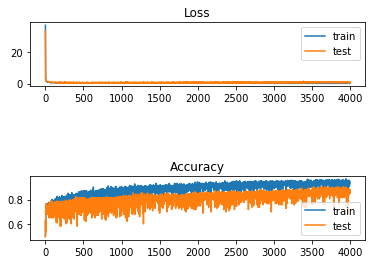

INFO:tensorflow:Assets written to: MuscleNET_Models/DNN/MuscleNET_Injury_Detection_OVERSAMPLED\assets


In [15]:
# TRAINING SAME MODEL WITH SMOTE OVERSAMPLING
# RETRAIN AFTER OVERSAMPLING
x = np.loadtxt(feature_file_name)
y = np.loadtxt(label_file_name)
y = y.astype(int)

counter = Counter(y)
print(counter)

oversample = SMOTE()
x,y = oversample.fit_resample(x,y)
x,y = shuffle(x,y,random_state=0)
counter = Counter(y)
print(counter)

y_one_hot = tf.one_hot(y, np.max(y)+1)
print("one hot encoding labels shape ", y_one_hot.shape)

exampleSize, featureSize = x.shape

numTrain = int(x.shape[0] * 0.7)
x_train = x[:numTrain,:]
y_train = y_one_hot[:numTrain]
x_test = x[numTrain:,:]
y_test = y_one_hot[numTrain:]

print("training set feature shape ", x_train.shape)
print("training set label shape ", y_train.shape)
print("test set feature shape ", x_test.shape)
print("test set label shape ", y_test.shape)

oversampled_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(featureSize,)),
    tf.keras.layers.Dense(48, activation="relu"),
    tf.keras.layers.Dense(48, activation="relu"),
    tf.keras.layers.Dense(48, activation="relu"),
    tf.keras.layers.Dense(12, activation="relu"),
    tf.keras.layers.Dense(2, activation="softmax")
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

oversampled_model.compile(optimizer = optimizer,
             loss = "categorical_crossentropy",
             metrics=["acc",
                     tf.keras.metrics.FalseNegatives(),
                     tf.keras.metrics.FalsePositives(),
                     tf.keras.metrics.TrueNegatives(),
                     tf.keras.metrics.TruePositives()])
oversampled_model.summary()

starting = time.time()
history = oversampled_model.fit(x_train, y_train,validation_data=(x_test,y_test),epochs=4000)
timePassed = time.time() - starting
print("Time passed for training: ", timePassed)

loss = history.history["loss"]
t_loss = history.history["val_loss"]
acc = history.history["acc"]
t_acc = history.history["val_acc"]
false_negatives = history.history["false_negatives_1"]
t_false_negatives = history.history["val_false_negatives_1"]
false_positives = history.history["false_positives_1"]
t_false_positives = history.history["val_false_positives_1"]
true_negatives = history.history["true_negatives_1"]
t_true_negatives = history.history["val_true_negatives_1"]
true_positives = history.history["true_positives_1"]
t_true_positives = history.history["val_true_positives_1"]
print("-----------------------")
print("Loss: ", loss[-1])
print("Test Loss: ", t_loss[-1])
print("-----------------------")
print("Accuracy: ", acc[-1])
print("Test Accuracy: ", t_acc[-1])
print("-----------------------")
print("False Negatives: ", false_negatives[-1])
print("Test False Negatives: ", t_false_negatives[-1])
print("-----------------------")
print("False Positives: ", false_positives[-1])
print("Test False Positives: ", t_false_positives[-1])
print("-----------------------")
print("True Negatives: ", true_negatives[-1])
print("Test True Negatives: ", t_true_negatives[-1])
print("-----------------------")
print("True Positives: ", true_positives[-1])
print("Test True Positives: ", t_true_positives[-1])
print("-----------------------")
print("Precisions:")
tp = true_positives[-1]
fp = false_positives[-1]
fn = false_negatives[-1]
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
print("(Oversampled Model) For Training Set => Precision: ", precision, " , Recall: ", recall, " , and F1-Score: ", f1_score)
tp = t_true_positives[-1]
fp = t_false_positives[-1]
fn = t_false_negatives[-1]
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
print("(Oversampled Model) For Test Set => Precision: ", precision, " , Recall: ", recall, " , and F1-Score: ", f1_score)

plt.subplot(311)
plt.title("Loss")
plt.plot(loss,label="train")
plt.plot(t_loss,label="test")
plt.legend()

plt.subplot(313)
plt.title("Accuracy")
plt.plot(acc,label="train")
plt.plot(t_acc,label="test")
plt.legend()
plt.show()

# saving model in SavedModel format
model.save(model_saving_path +"_OVERSAMPLED")
# converting SavedModel into tflite model
converter = tf.lite.TFLiteConverter.from_saved_model(model_saving_path+"_OVERSAMPLED")
tflite_model = converter.convert()
with open('MuscleNET_Injury_Risk_Detection_OVERSAMPLED.tflite', 'wb') as f:
      f.write(tflite_model)